In [1]:
import geopandas as gpd
import geopy
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import folium
import re
import warnings
warnings.filterwarnings('ignore')

/home/abduallah/.local/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
import mpu
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [13]:
atm_df = pd.read_excel('ATMs_nearst_1st&2nd_except_in_branches.xlsx')
atm_df.head()

ID                               Address     منطقة  قسم / مركز  محافظة  \
0   1                     Fayoum University  قسم ثانى  قسم الفيوم  الفيوم   
1   2                   Fayoum AlHoriea St.   قسم اول  قسم الفيوم  الفيوم   
2   3  10th of Ramadan - Industrial Zone B1  قسم ثانى  قسم الفيوم  الفيوم   
3   4     Faculty of Arts Fayoum University  قسم ثانى  قسم الفيوم  الفيوم   
4   5                  Fayoum train station   قسم اول  قسم الفيوم  الفيوم   

         Lat       Long  ID1                           Address1    منطقة1  \
0  29.319696  30.835641   26                  Fayoum University  قسم ثانى   
1  29.308199  30.842229   24                Fayoum AlHoriea St.   قسم اول   
2  29.321487  30.837896    4  Faculty of Arts Fayoum University  قسم ثانى   
3  29.322145  30.837087   25  Faculty of Arts Fayoum University  قسم ثانى   
4  29.308889  30.847499   23               Fayoum train station   قسم اول   

   ... distance1_in_meter ID2  \
0  ...           0.000000   3   
1  ...           0.000000  29   
2  ...         107.260588  25   
3  ...           0.000000   3   
4  ...           0.000000  11   

                                            Address2    منطقة2  قسم / مركز2  \
0               10th of Ramadan - Industrial Zone B1  قسم ثانى   قسم الفيوم   
1                          Batal Alsalam St.- Fayoum   قسم اول   قسم الفيوم   
2                  Faculty of Arts Fayoum University  قسم ثانى   قسم الفيوم   
3               10th of Ramadan - Industrial Zone B1  قسم ثانى   قسم الفيوم   
4  Jamal Abdel Nasser Street, behind the local po...   قسم اول   قسم الفيوم   

   محافظة2       Lat2      Long2 distance2 distance2_in_meter  
0   الفيوم  29.321487  30.837896  0.295731         295.730570  
1   الفيوم  29.304818  30.843850  0.407484         407.484119  
2   الفيوم  29.322145  30.837087  0.107261         107.260588  
3   الفيوم  29.321487  30.837896  0.107261         107.260588  
4   الفيوم  29.309736  30.847641  0.095188          95.187942  

[5 rows x 25 columns]

In [6]:
list_of_gov = atm_df['محافظة'].unique()
list_of_reg = atm_df['قسم / مركز'].unique()
list_of_sub_reg = atm_df['منطقة'].unique()

In [7]:
atm_df.groupby('محافظة').describe()['distance1_in_meter']

count         mean          std        min         25%         50%          75%  \
محافظة                                                                                           
أسوان           89.0   393.301250  1365.035318   0.000102    0.000377    0.000520    40.252898   
أسيوط           56.0  1389.634086  2039.154913   8.532647  235.857379  385.290909  1348.222343   
الإسماعيلية     95.0   230.485595  1265.178935   0.000000    0.000347    0.000445     0.000560   
الاسكندرية     251.0   203.061936   684.281530   0.000000    0.000000    0.000000    88.809600   
البحر الأحمر   122.0   440.045667  2632.443227   0.000000    0.000000    0.000000     0.000000   
البحيرة        145.0   646.873692  2016.970519   0.000000    0.000000    0.000000    74.246649   
الجيزة         454.0   243.452426   978.247459   0.000000    0.000000    0.000000   103.406030   
الدقهلية       225.0   681.700839  1632.787086   0.000000    0.000000    0.000000   509.929932   
السويس          32.0   511.283699  2681.342091   0.000000    0.000000    0.000000     0.000000   
الشرقية        159.0   561.402946  1737.816360   0.000000    0.000000    0.000000   130.685312   
الغربية        116.0   244.855798   789.271575   0.000095    0.000347    0.000484     0.017525   
الفيوم          30.0  2095.323709  4109.351182   0.000000    0.000000   47.593971  2001.270518   
القاهرة        834.0   156.910038   537.925211   0.000000    0.000000    0.000000   117.559718   
القليوبية      133.0   276.045636   722.894349   0.000000    0.000000    0.000000     0.042466   
المنوفية       116.0   675.388650  1308.745379   0.000000    0.000363    0.000467   633.861433   
المنيا          79.0  1061.732206  2505.248581   0.000098    0.000419  121.653499   629.700893   
الوادى الجديد   16.0    58.082268   158.710971   0.000000    0.000000    0.000000     0.000000   
بنى سويف        61.0   753.532450  1609.774669   0.000000    0.000000    0.000000   553.609696   
بورسعيد         70.0   120.243693   230.268840   0.000000    0.000000    0.000000   207.347408   
جنوب سيناء      91.0   717.234455  4281.384891   0.000000    0.000000    0.056708   308.707680   
دمياط           35.0  1498.439894  1652.624182  11.564914  406.941918  813.482572  1704.604707   
سوهاج          120.0  1049.442572  1721.437378   0.000000    6.561255  233.046236   847.462200   
شمال سيناء       5.0   453.447405  1013.900966   0.000000    0.000000    0.034216     0.034216   
قنا             93.0  1052.506996  1722.882109   0.000000    0.000500  307.412307  1089.485876   
كفر الشيخ       51.0  1180.284964  2829.010818   0.000441  126.258349  281.446954   651.550798   
مدينة الأقصر    67.0   198.722827   926.167181   0.000150    0.000374    0.000537     0.000600   
مطروح           21.0  2800.669559  8691.752242   0.000000    0.000000    0.000000  1005.693554   

                        max  
محافظة                       
أسوان           9042.894170  
أسيوط           7713.137044  
الإسماعيلية    11761.823386  
الاسكندرية      7071.678262  
البحر الأحمر   25054.594099  
البحيرة        12580.857193  
الجيزة         15793.824091  
الدقهلية       15360.027851  
السويس         15159.083722  
الشرقية        12979.343319  
الغربية         5137.587517  
الفيوم         13490.452716  
القاهرة        11887.147431  
القليوبية       4649.871073  
المنوفية        6172.017379  
المنيا         13682.384016  
الوادى الجديد    464.658146  
بنى سويف        6393.604421  
بورسعيد          993.448468  
جنوب سيناء     40834.760933  
دمياط           5347.892394  
سوهاج           6459.568891  
شمال سيناء      2267.168591  
قنا             7068.751028  
كفر الشيخ      15219.157402  
مدينة الأقصر    7223.277399  
مطروح          40006.488884

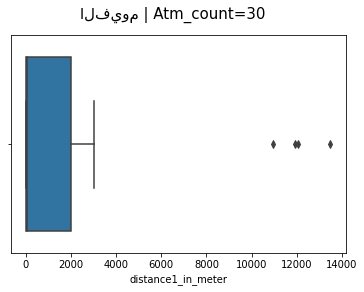

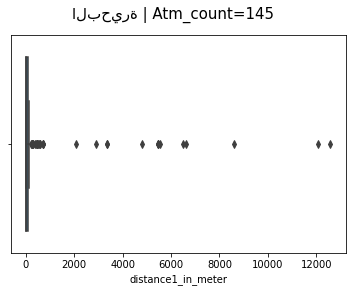

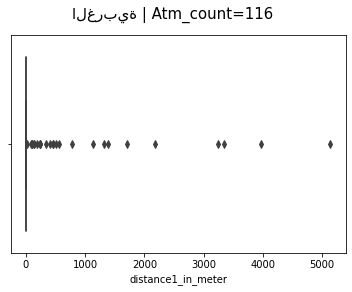

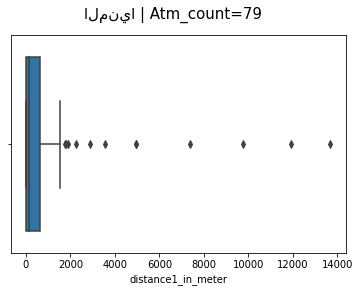

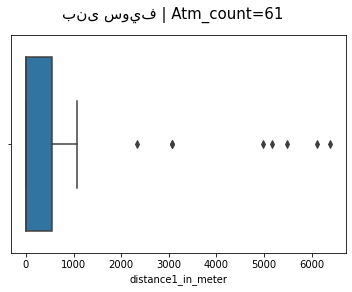

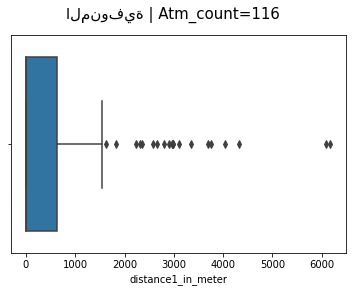

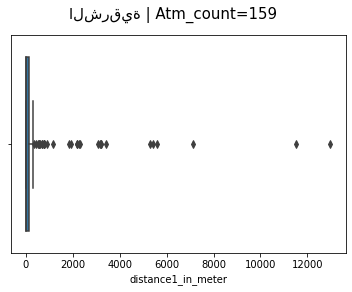

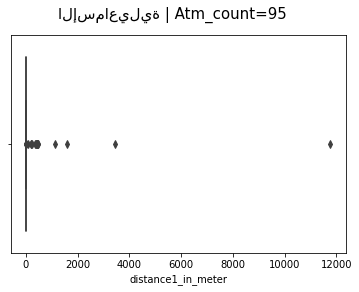

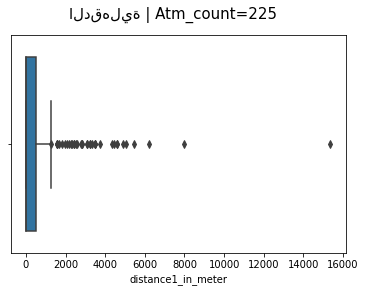

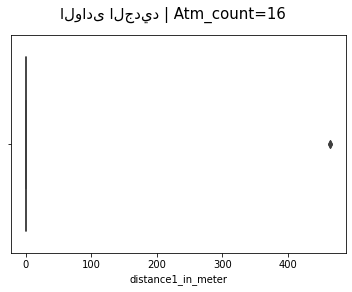

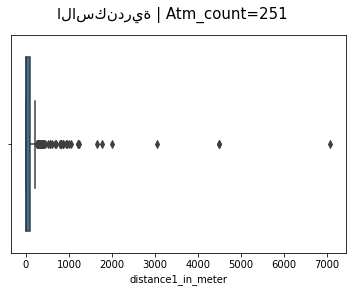

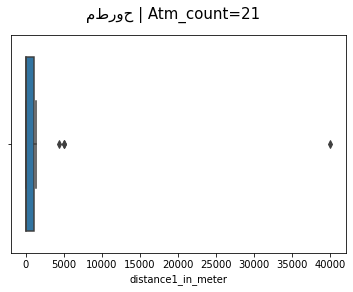

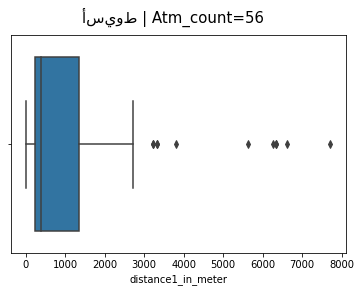

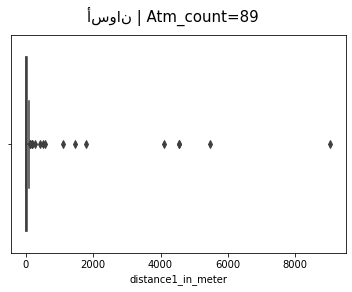

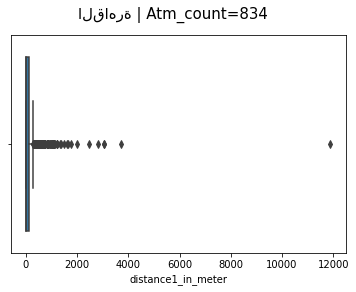

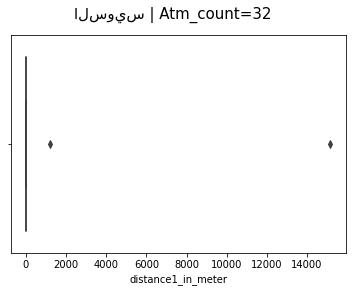

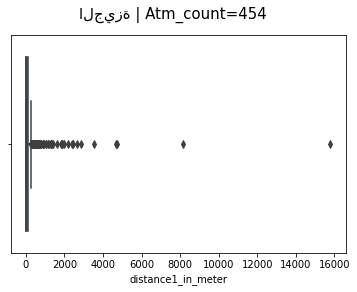

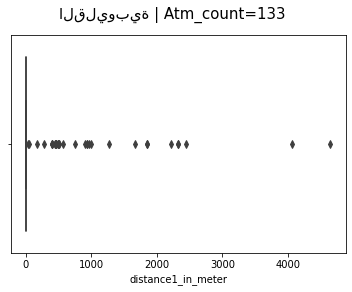

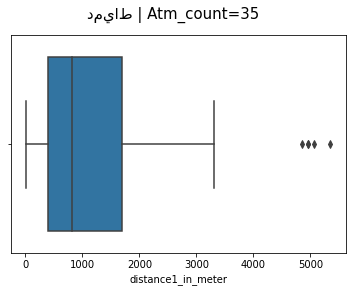

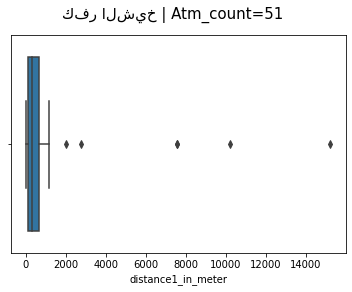

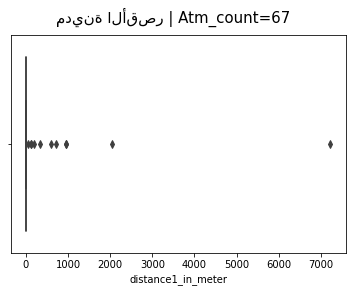

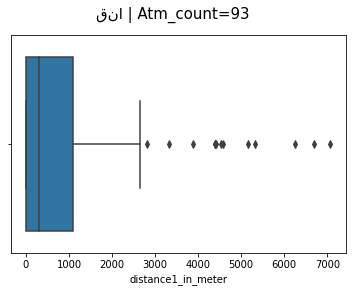

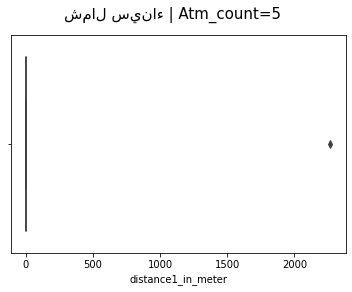

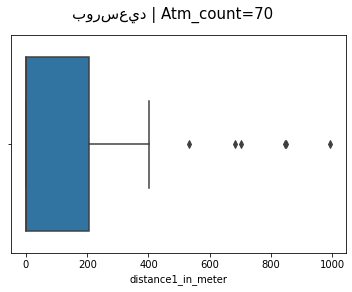

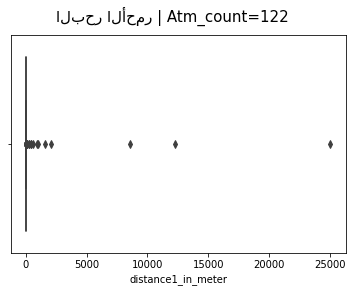

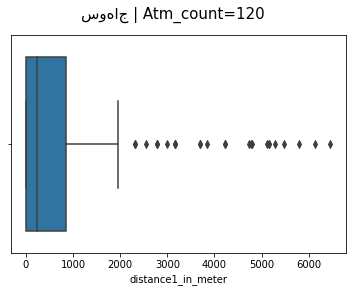

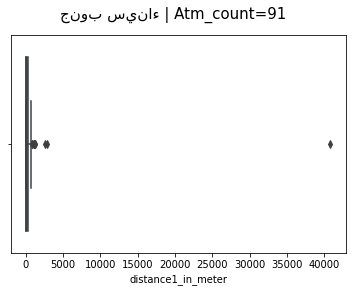

In [8]:
for i in list_of_gov:
    current_select = atm_df[atm_df['محافظة'] == i]
    plt.figure()
    plt.suptitle(i +' | Atm_count=' + str(current_select.count()['ID']),fontsize=15)
    sns.boxplot(current_select['distance1_in_meter'])
plt.show()

In [ ]:
for i in list_of_reg:
    current_select = atm_df[atm_df['قسم / مركز'] == i]
    plt.figure()
    plt.suptitle(i +' | Atm_count=' + str(current_select.count()['ID']),fontsize=15)
    sns.boxplot(current_select['distance1_in_meter'])

In [10]:
atm_df.groupby('منطقة').describe()['distance1_in_meter']

count          mean         std           min           25%           50%  \
منطقة                                                                                       
23يوليو           1.0    902.036829         NaN    902.036829    902.036829    902.036829   
آسعد              7.0     16.870515   36.068375      0.000000      0.000000      0.000000   
أبو الجهور        2.0      0.000583    0.000000      0.000583      0.000583      0.000583   
أبو الحسن         2.0      0.000000    0.000000      0.000000      0.000000      0.000000   
أبو الريش قبلي    3.0    364.500735  631.332991      0.000463      0.000463      0.000463   
...               ...           ...         ...           ...           ...           ...   
هو                2.0      0.000500    0.000000      0.000500      0.000500      0.000500   
هوارة عدلان       1.0  13490.452716         NaN  13490.452716  13490.452716  13490.452716   
واقد              1.0   5476.989160         NaN   5476.989160   5476.989160   5476.989160   
وردان             1.0  15793.824091         NaN  15793.824091  15793.824091  15793.824091   
يوسف              1.0    320.915315         NaN    320.915315    320.915315    320.915315   

                         75%           max  
منطقة                                       
23يوليو           902.036829    902.036829  
آسعد               10.069581     97.954445  
أبو الجهور          0.000583      0.000583  
أبو الحسن           0.000000      0.000000  
أبو الريش قبلي    546.750871   1093.501279  
...                      ...           ...  
هو                  0.000500      0.000500  
هوارة عدلان     13490.452716  13490.452716  
واقد             5476.989160   5476.989160  
وردان           15793.824091  15793.824091  
يوسف              320.915315    320.915315  

[910 rows x 8 columns]

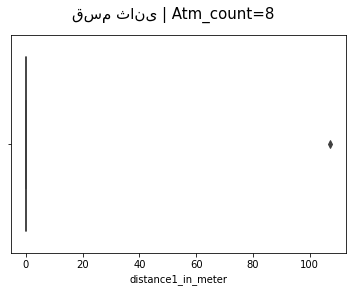

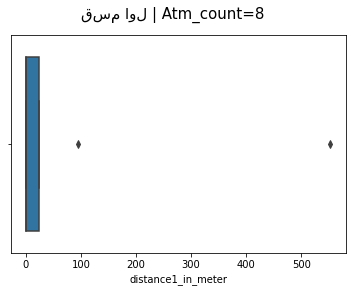

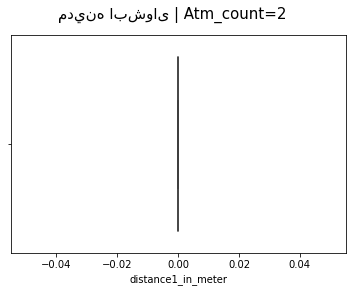

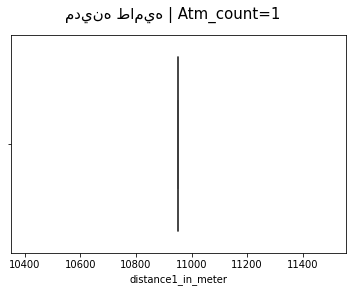

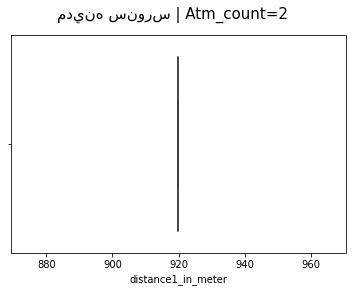

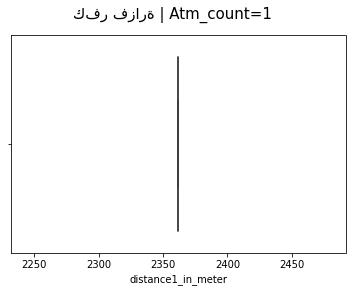

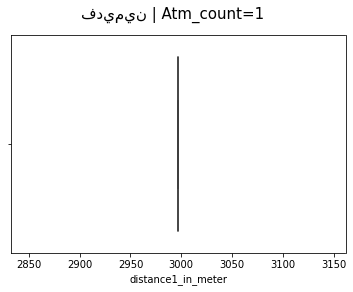

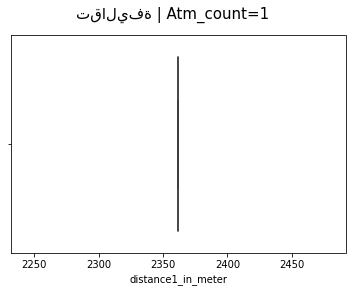

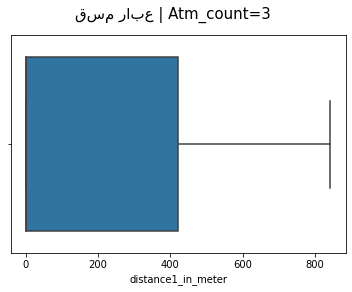

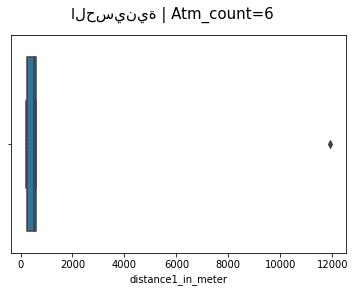

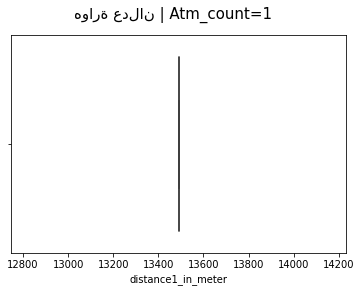

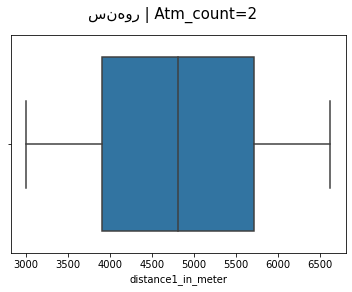

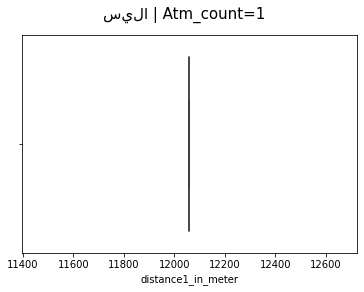

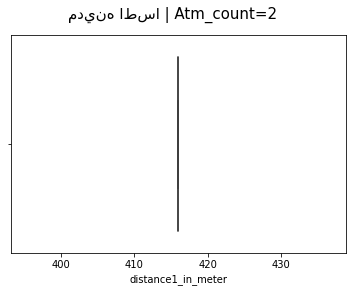

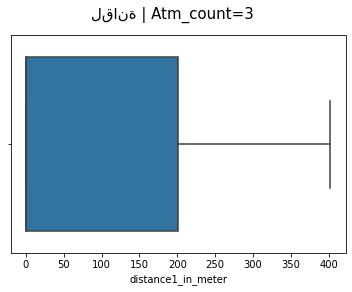

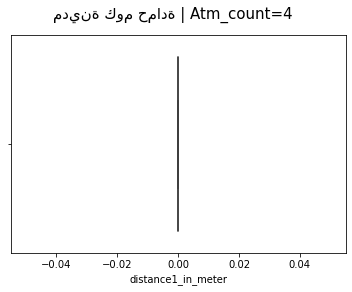

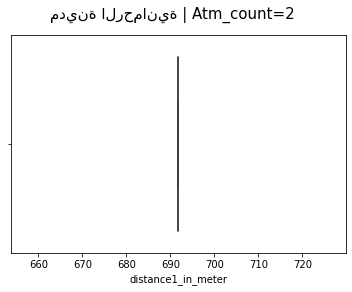

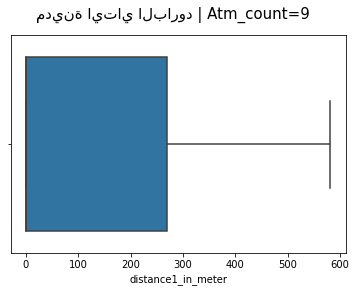

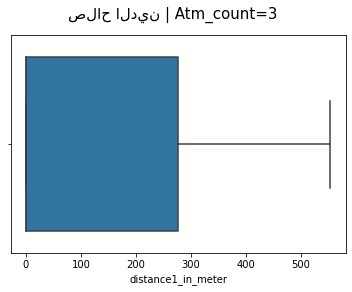

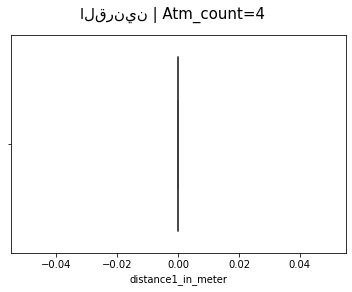

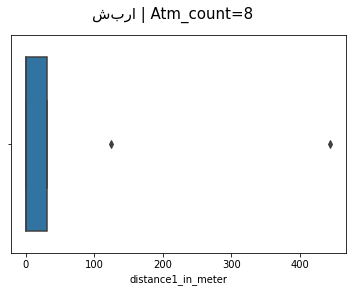

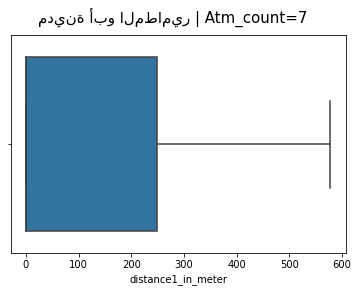

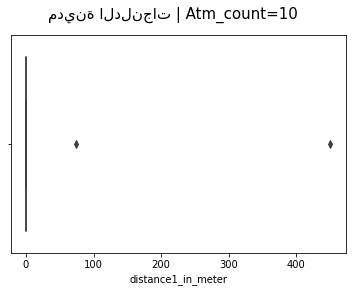

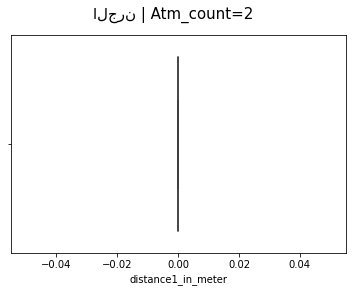

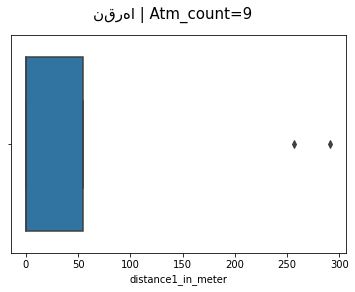

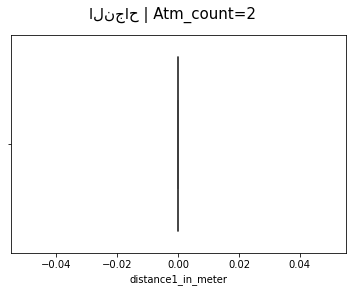

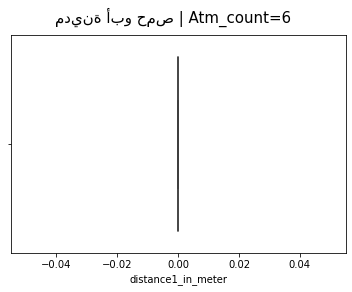

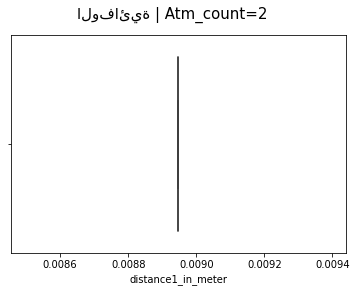

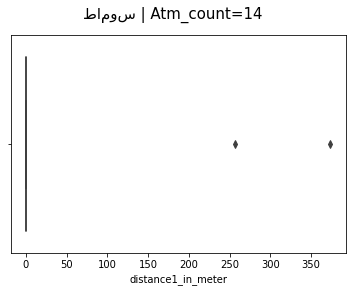

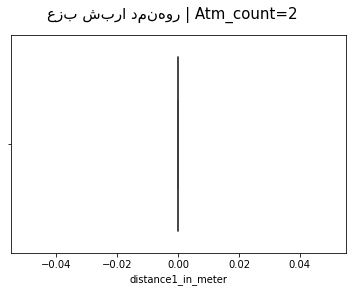

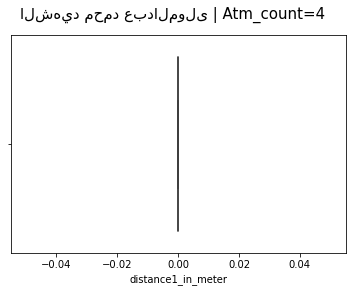

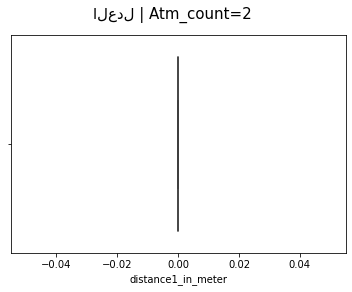

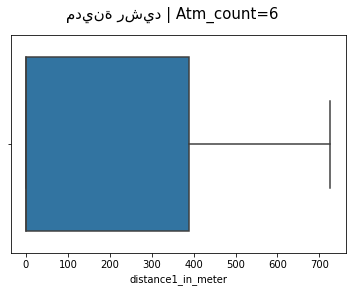

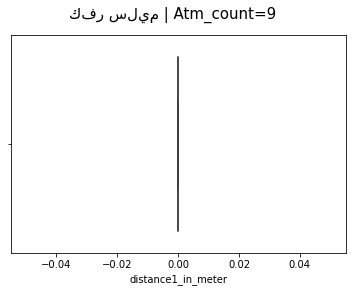

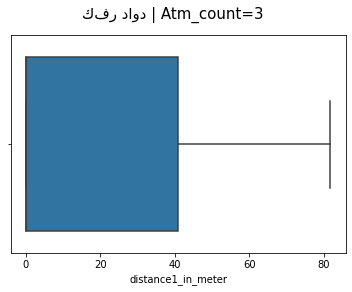

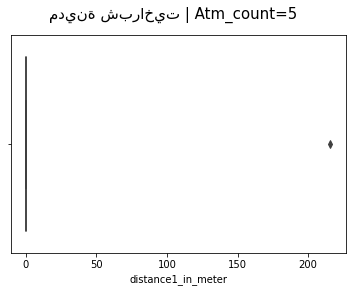

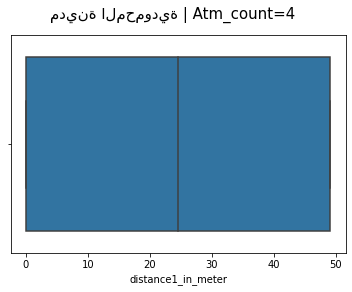

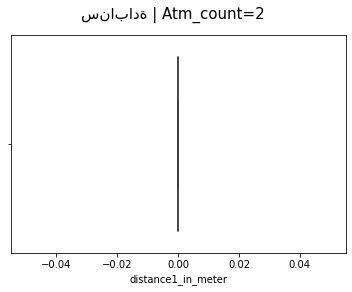

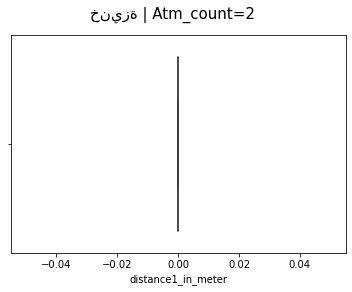

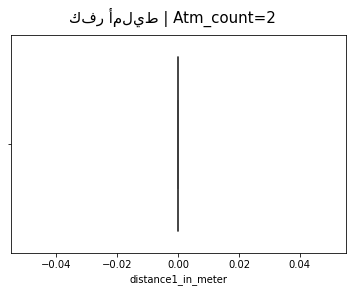

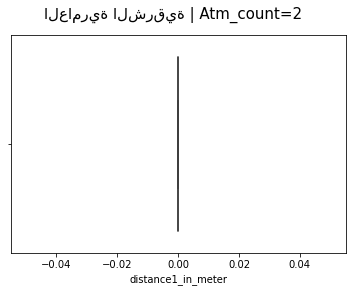

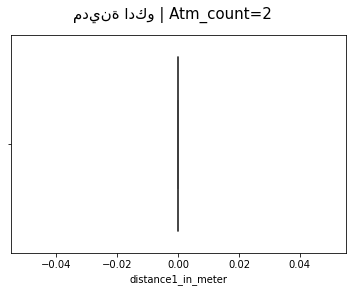

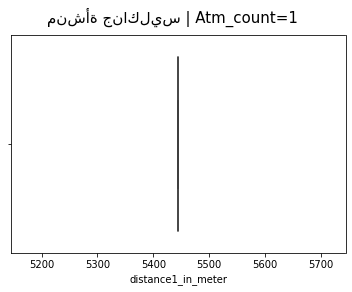

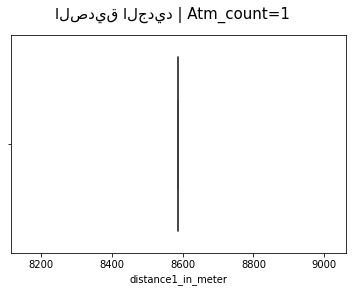

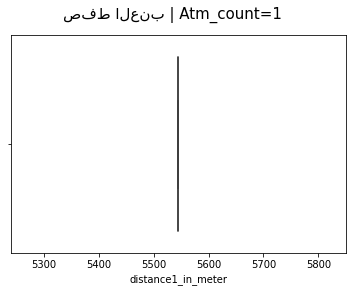

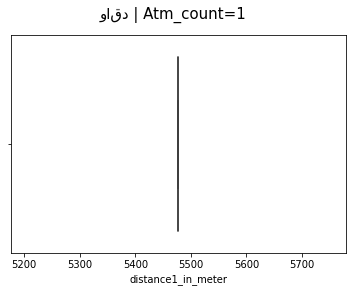

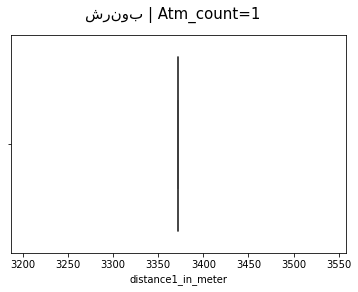

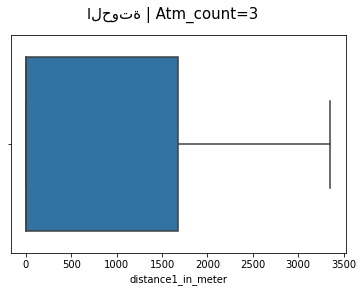

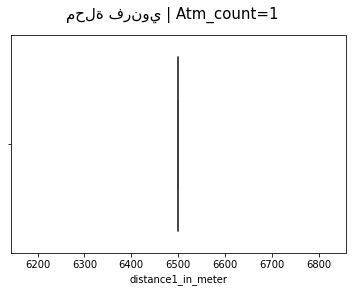

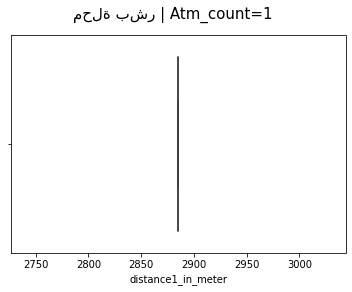

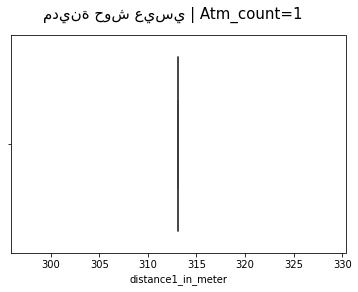

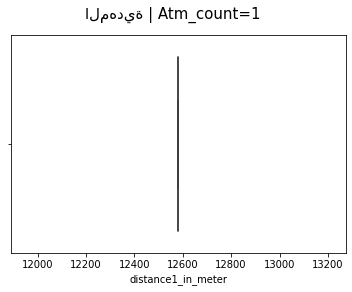

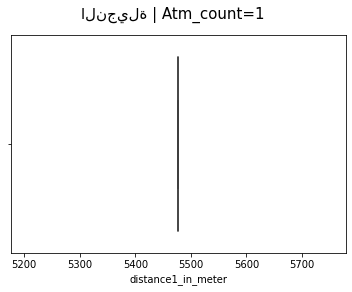

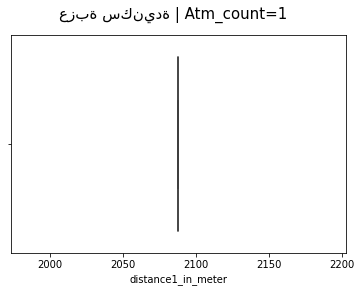

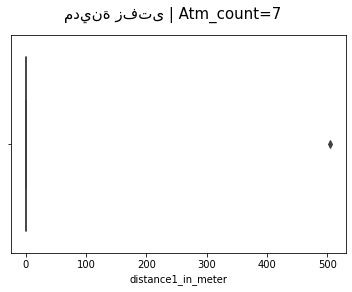

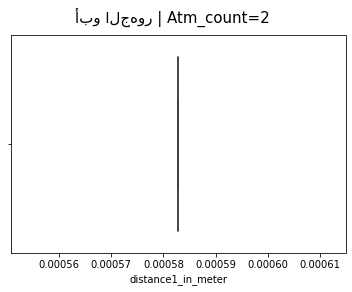

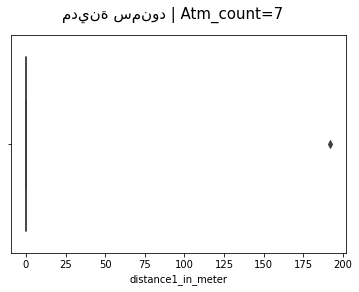

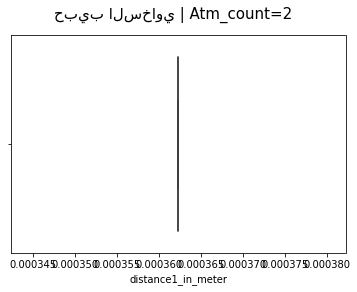

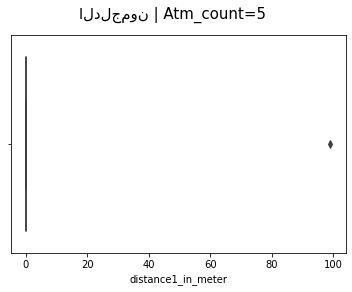

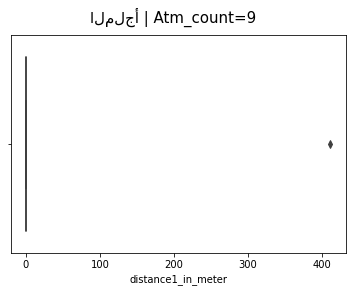

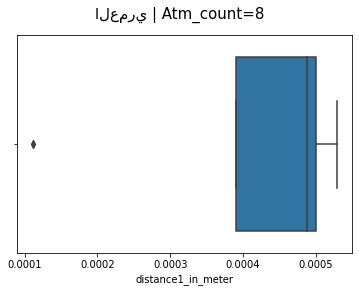

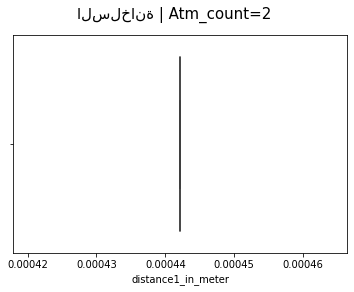

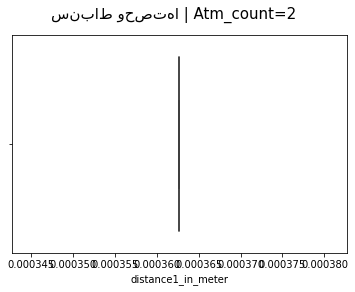

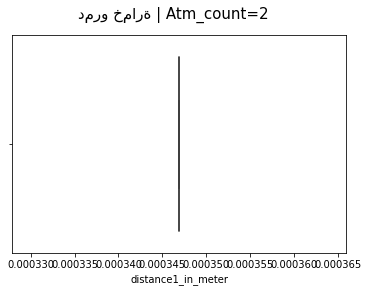

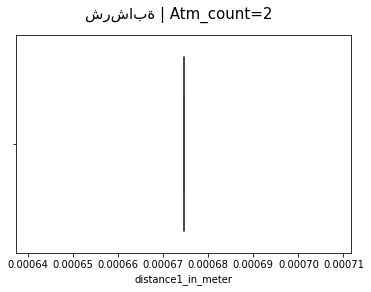

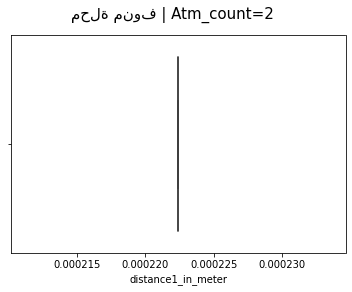

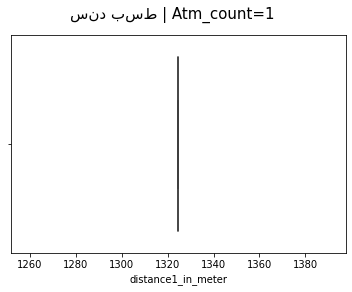

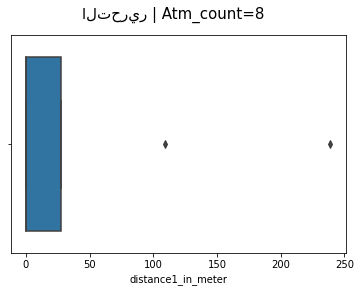

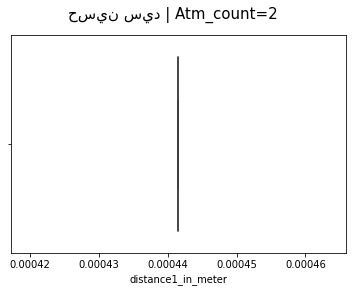

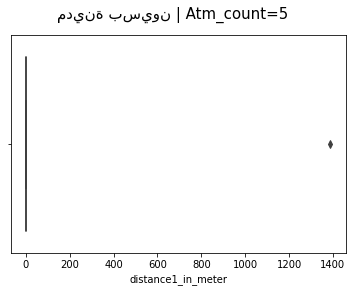

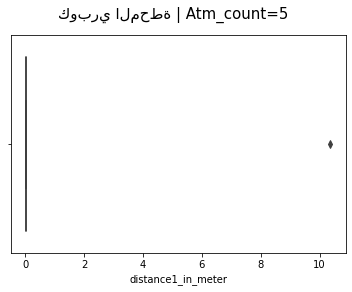

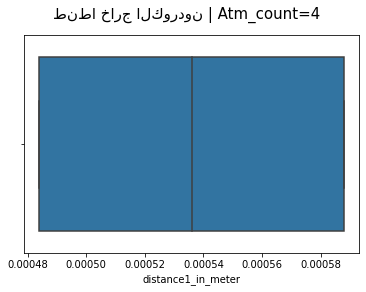

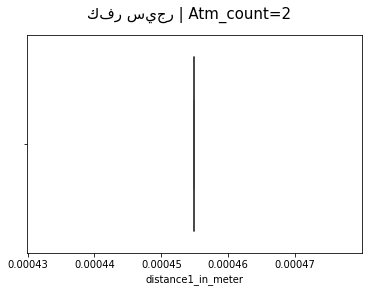

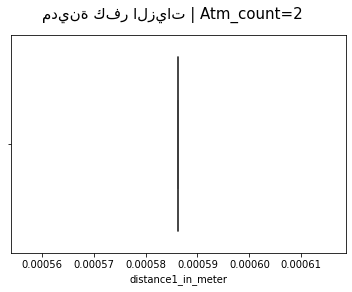

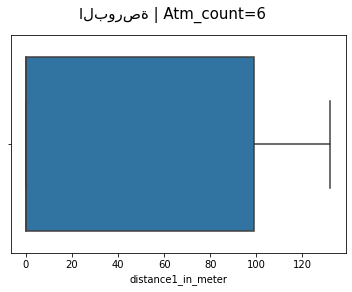

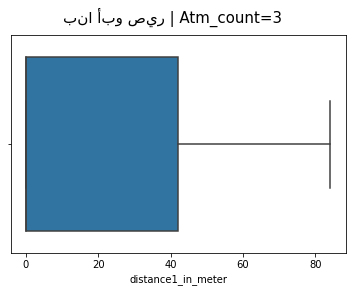

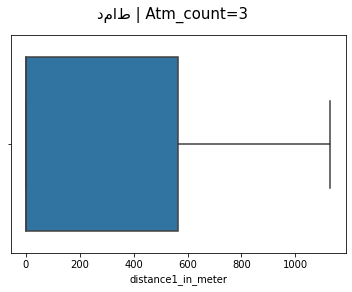

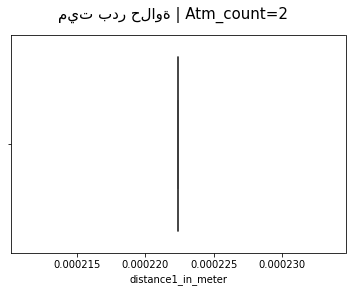

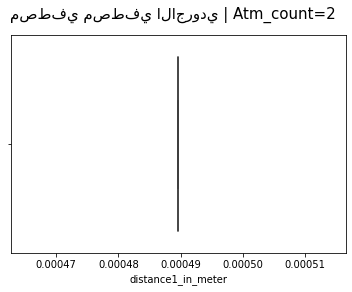

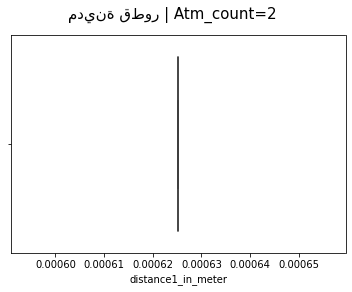

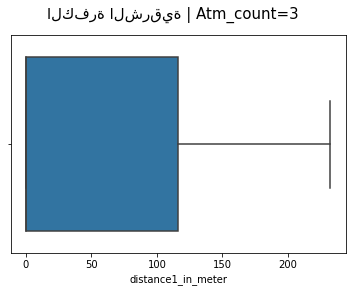

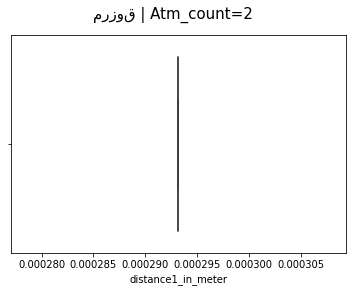

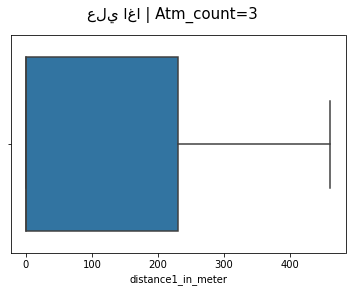

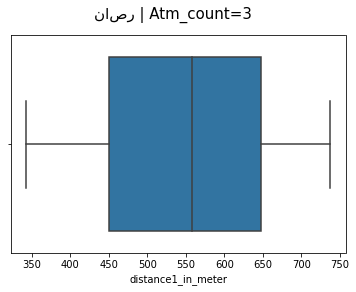

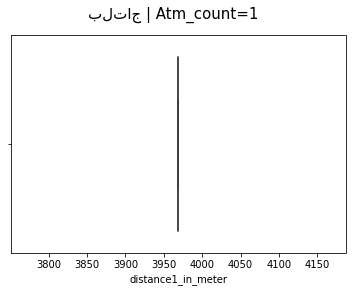

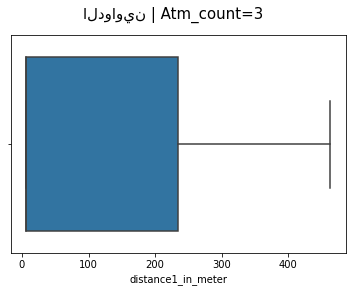

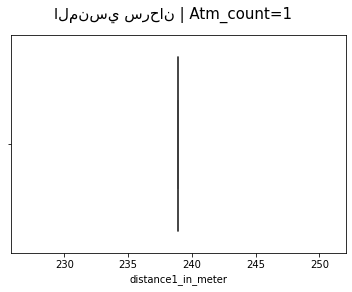

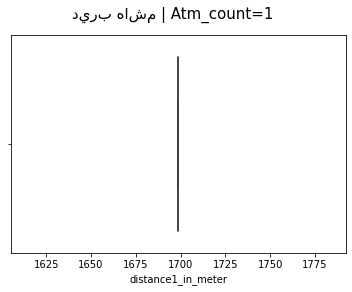

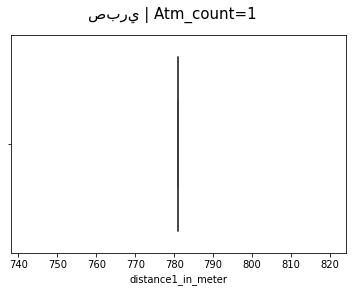

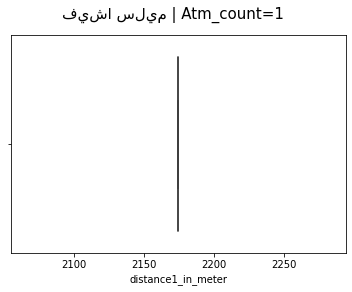

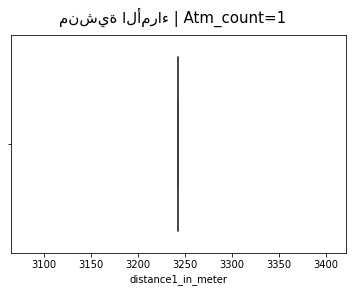

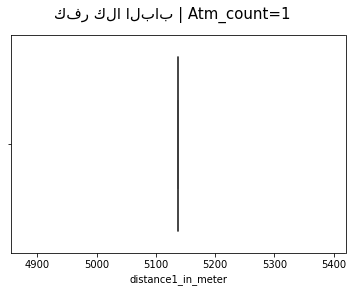

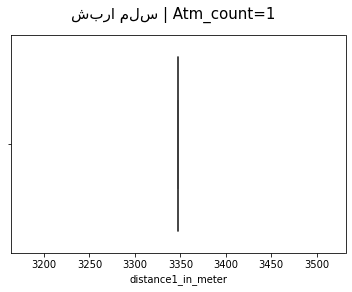

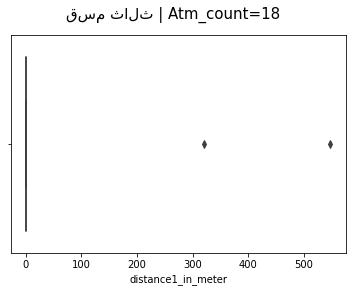

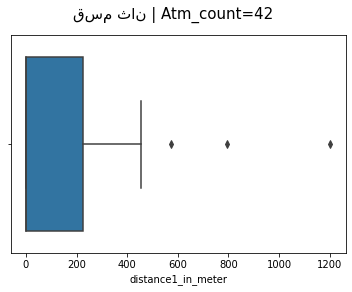

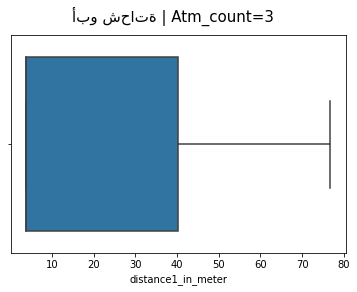

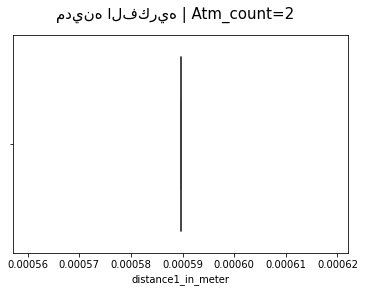

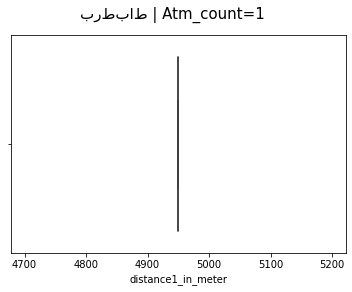

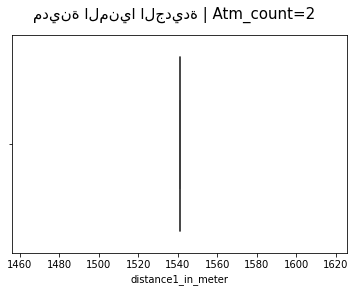

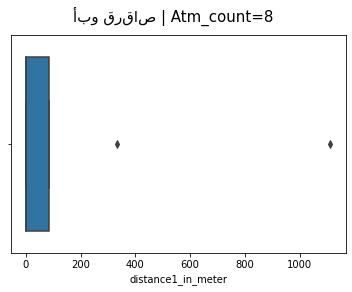

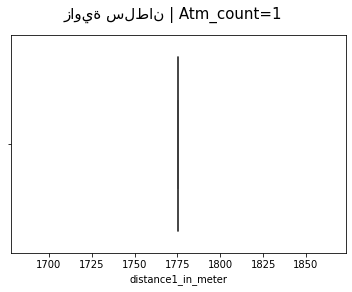

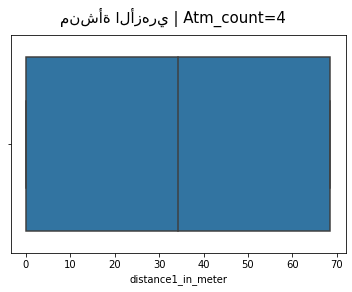

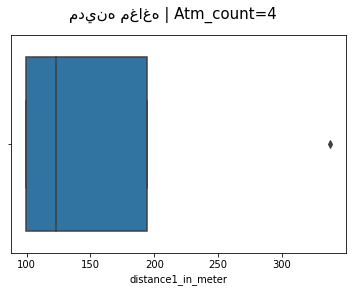

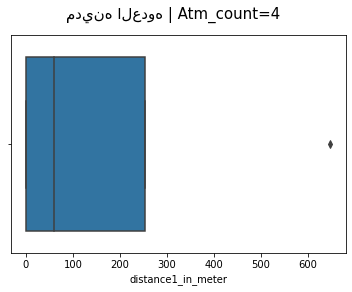

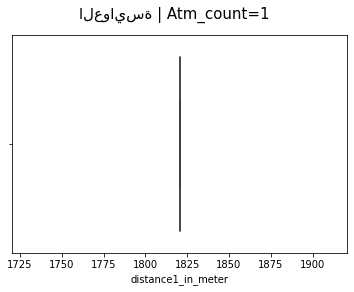

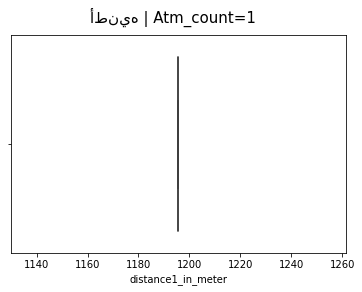

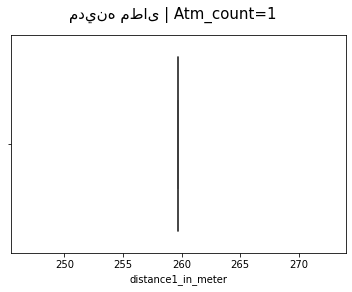

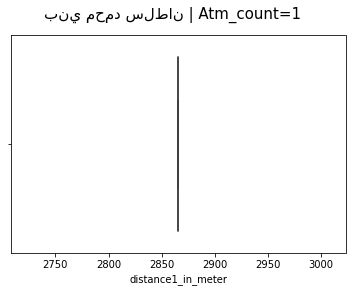

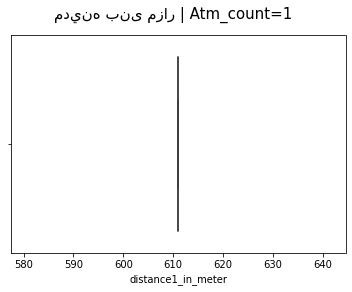

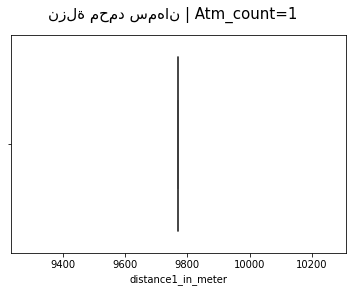

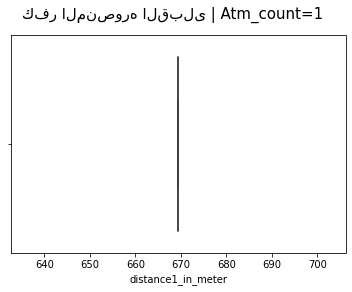

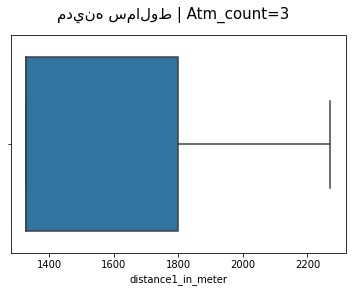

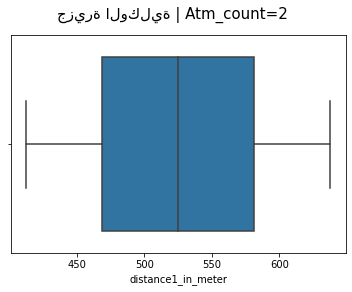

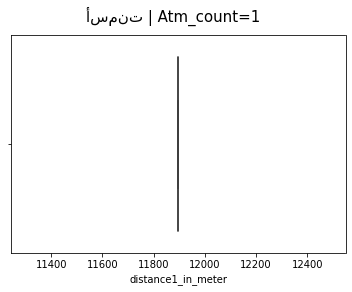

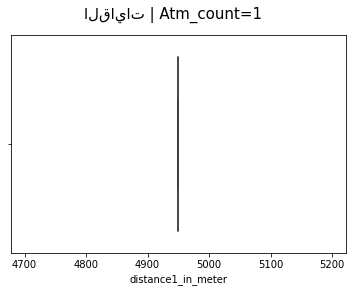

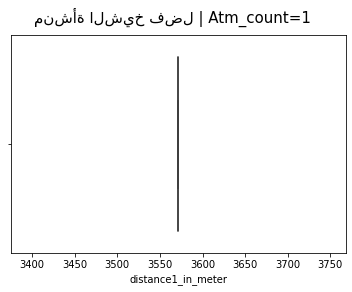

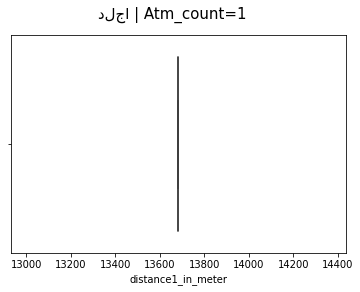

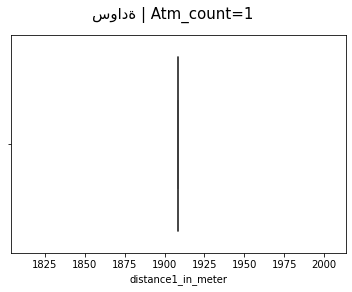

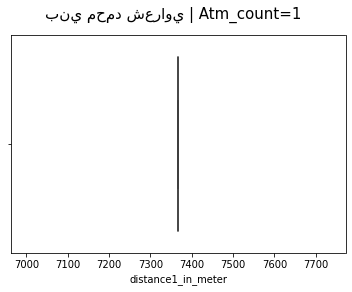

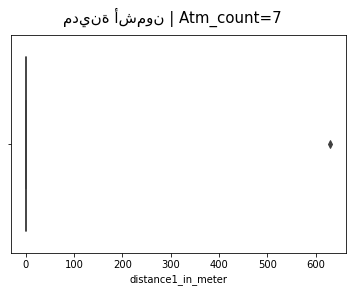

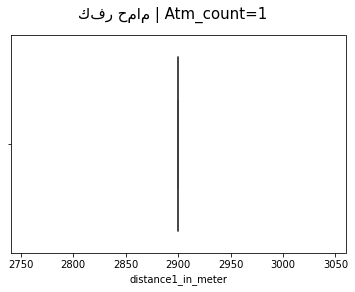

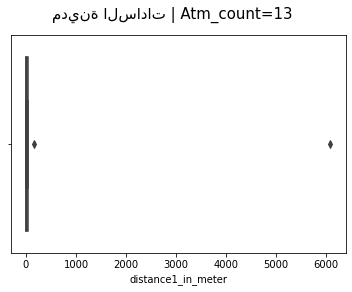

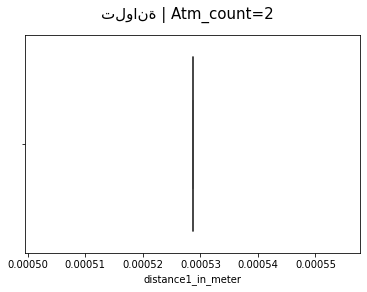

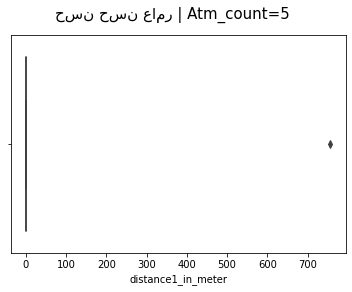

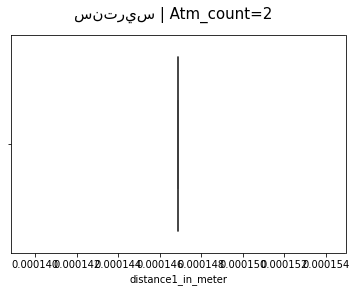

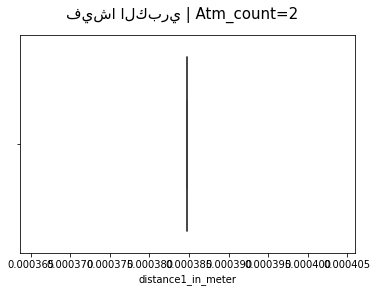

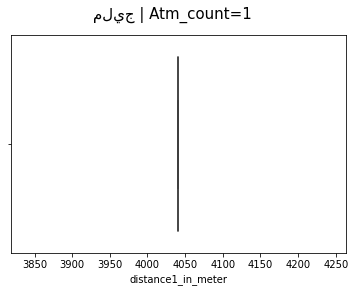

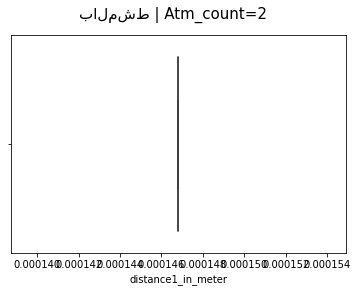

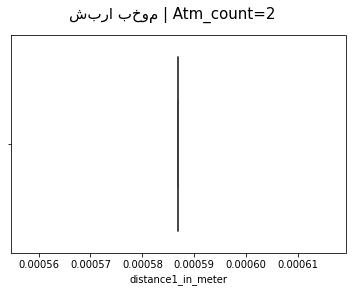

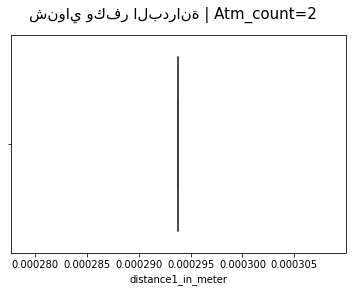

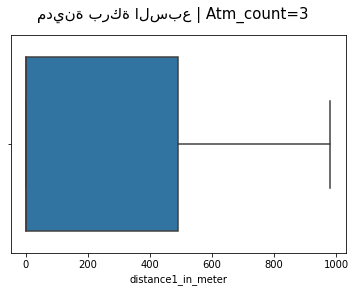

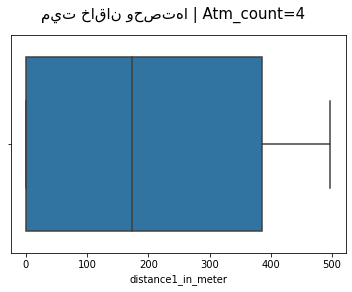

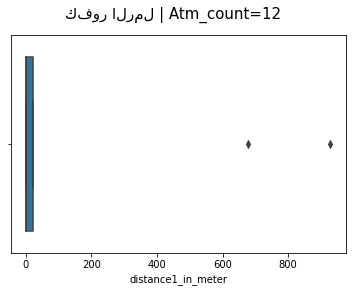

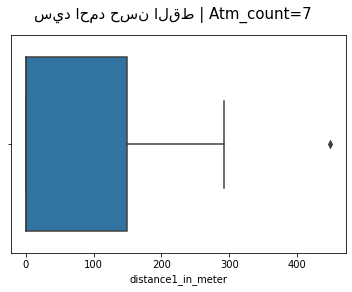

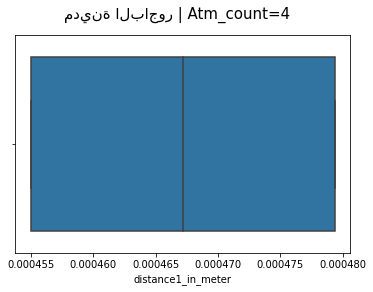

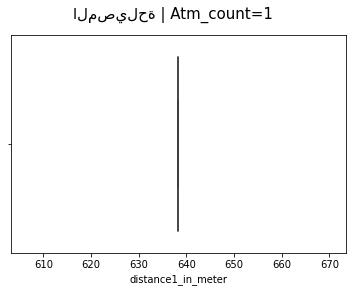

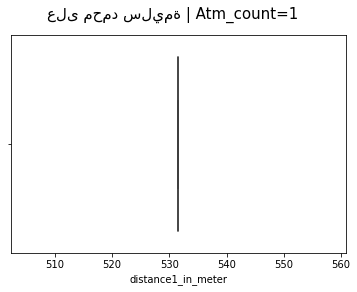

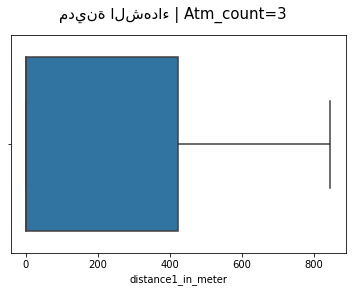

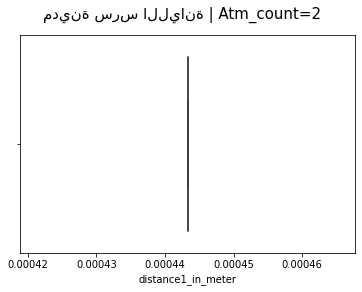

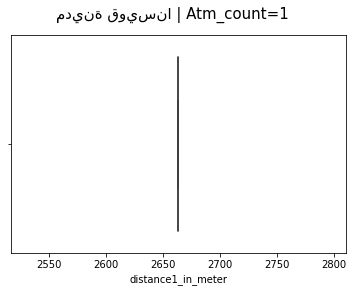

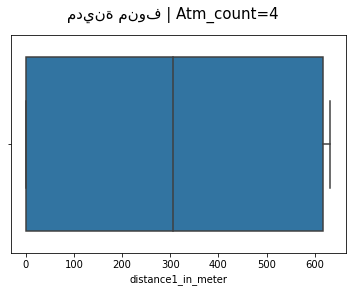

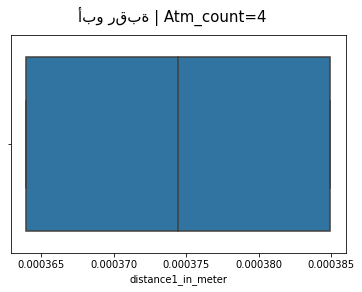

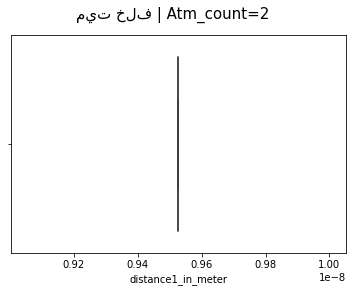

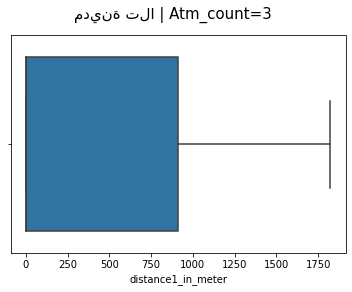

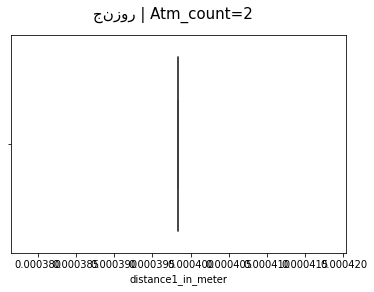

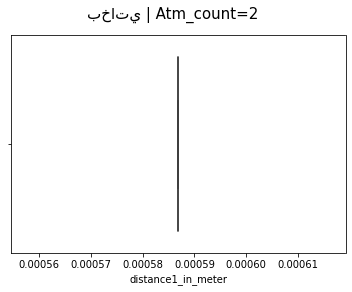

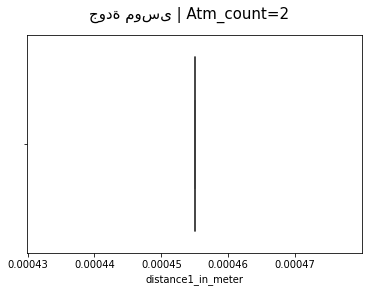

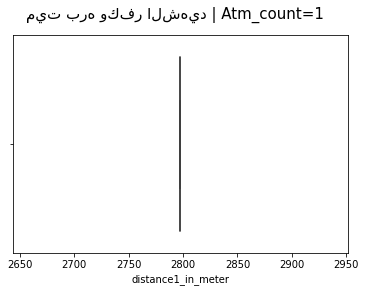

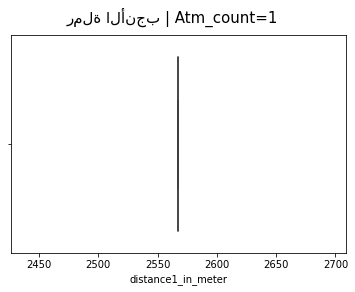

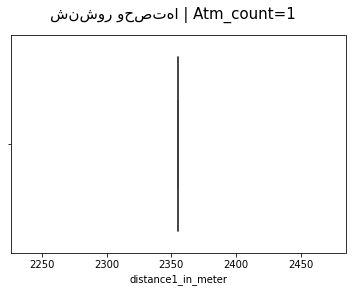

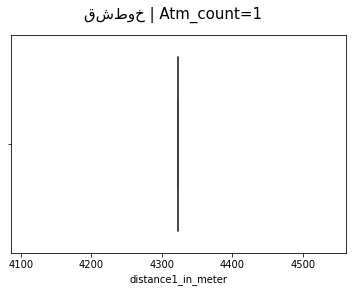

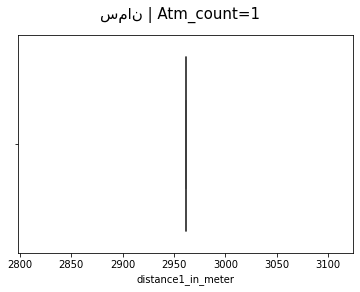

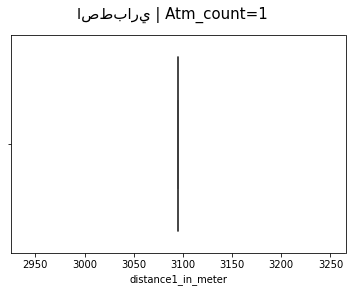

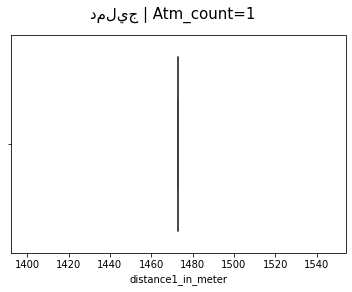

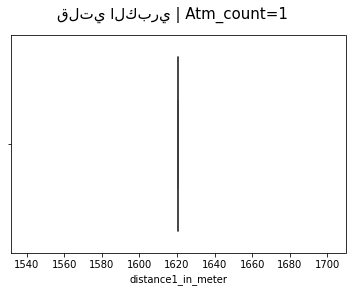

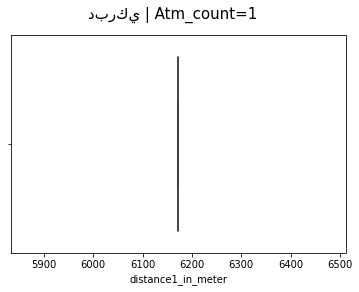

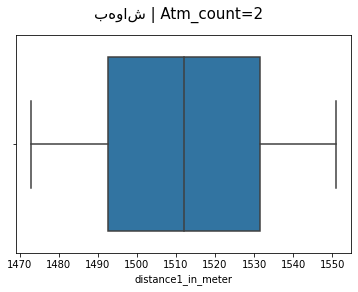

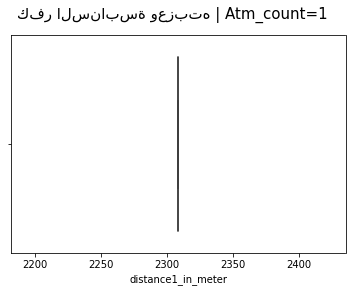

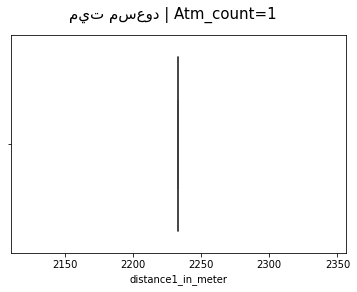

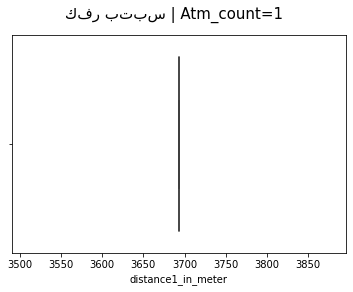

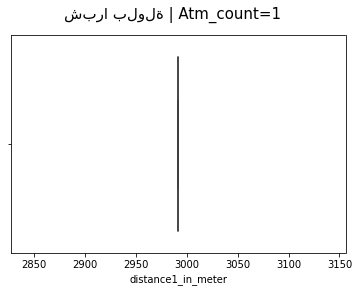

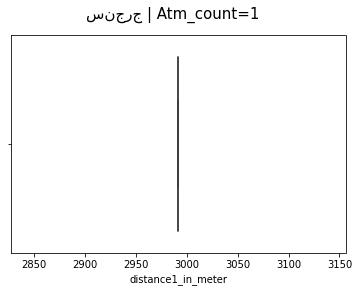

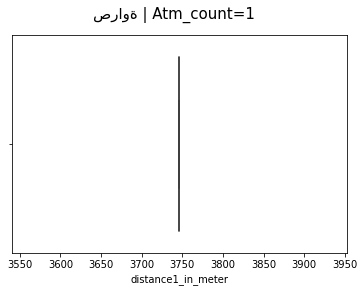

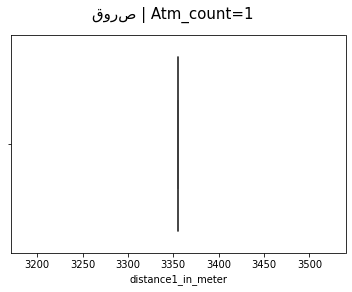

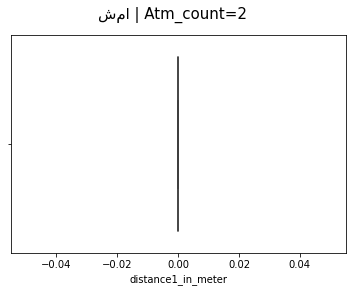

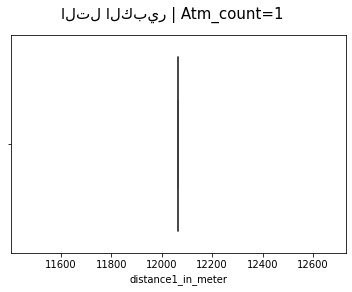

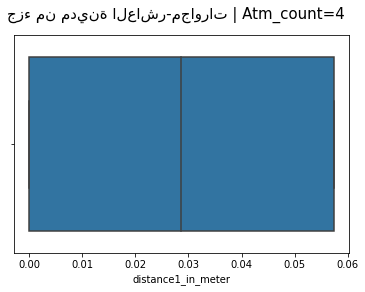

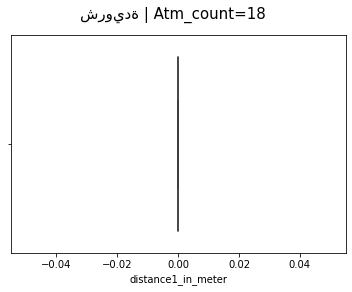

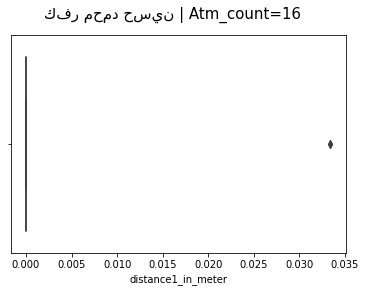

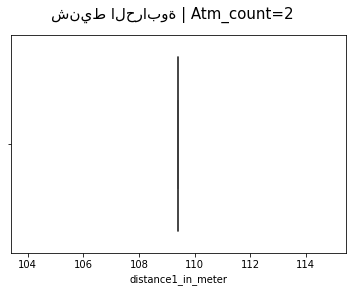

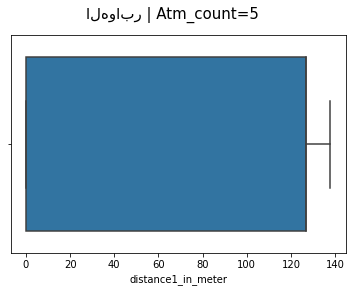

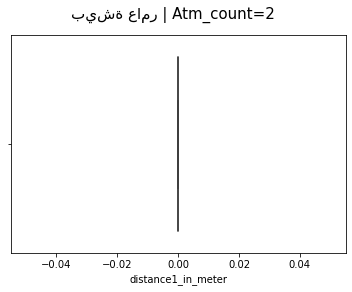

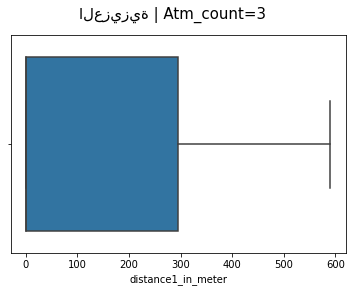

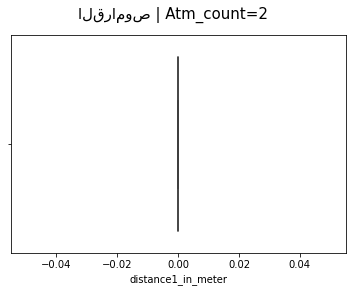

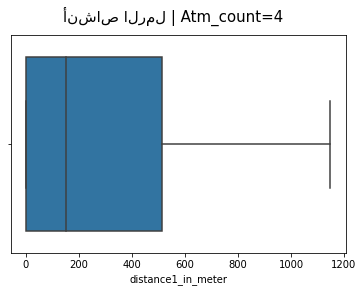

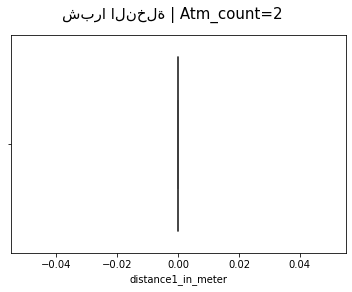

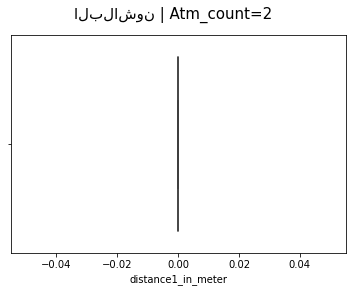

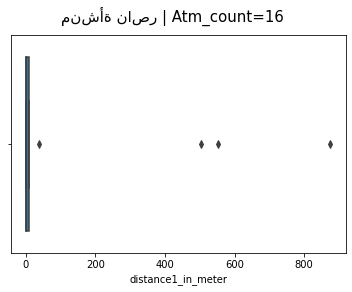

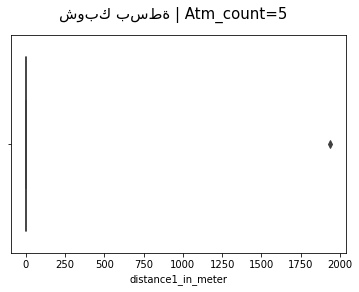

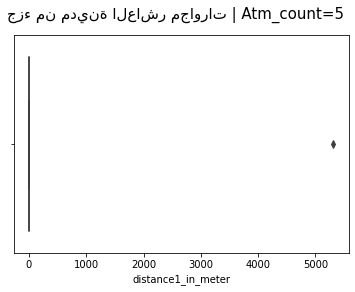

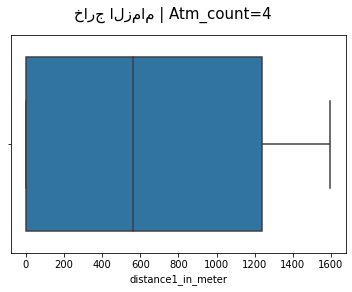

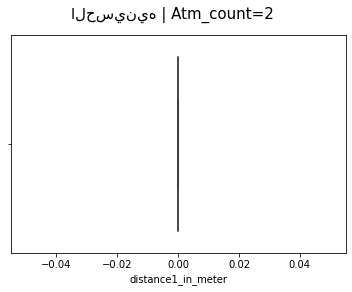

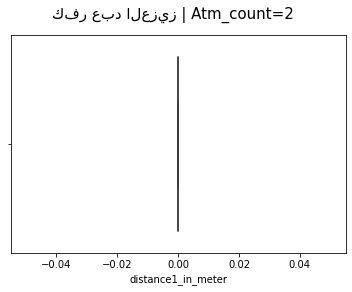

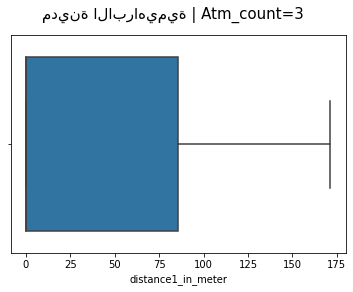

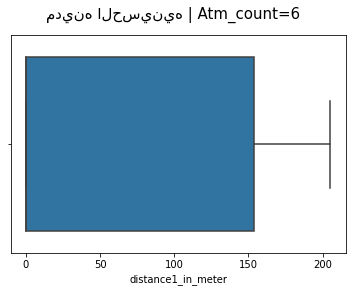

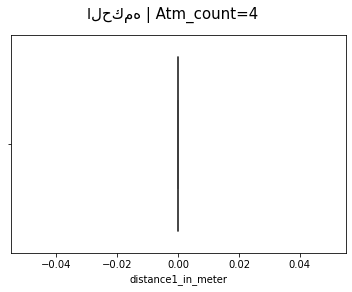

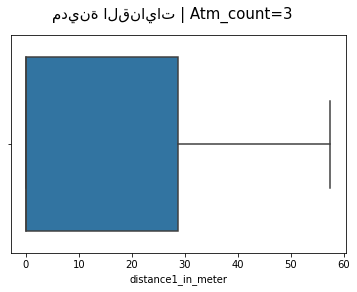

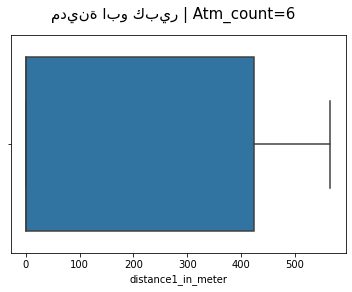

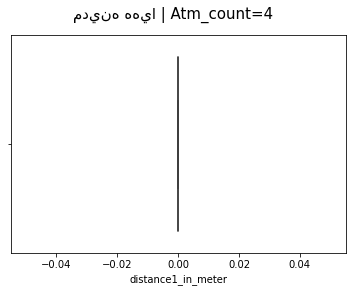

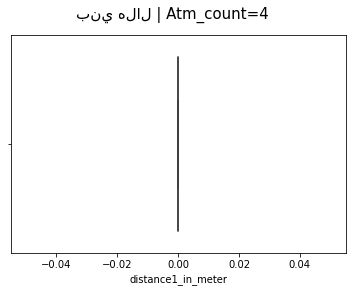

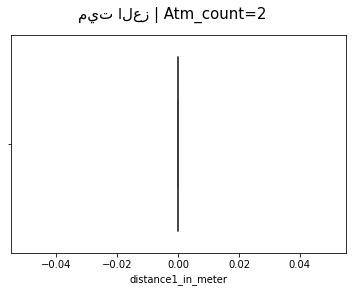

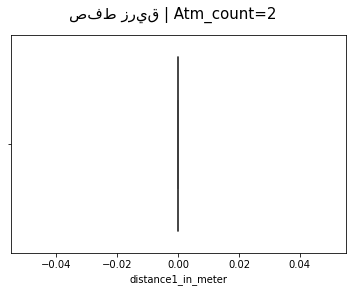

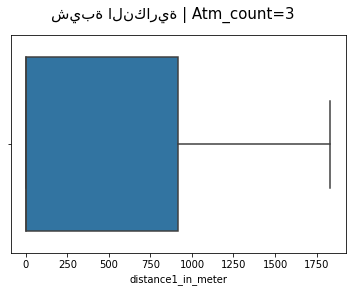

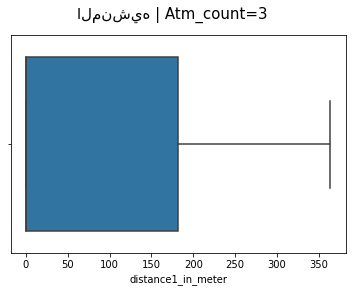

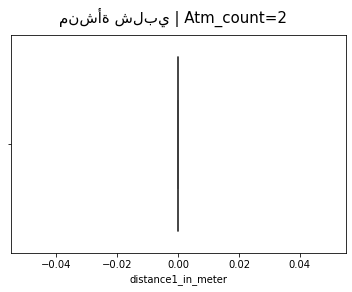

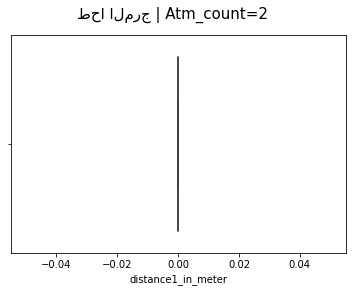

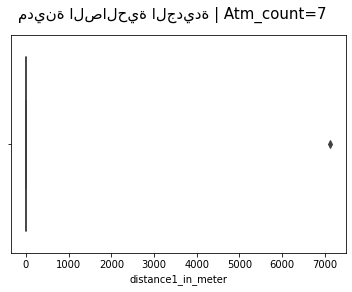

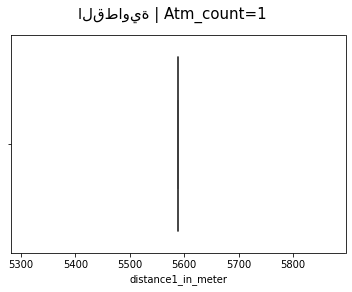

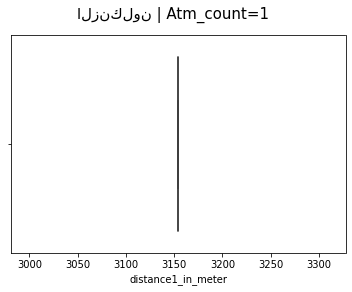

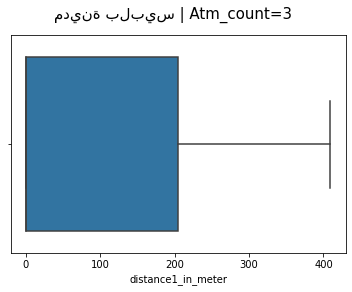

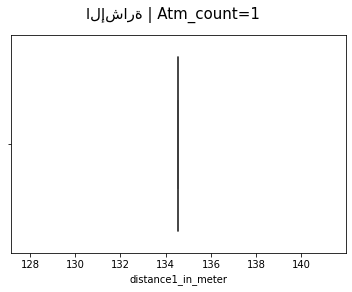

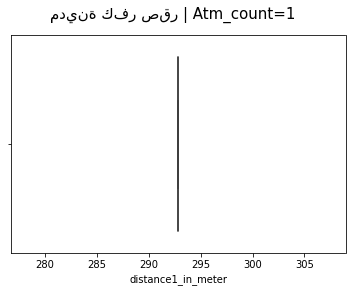

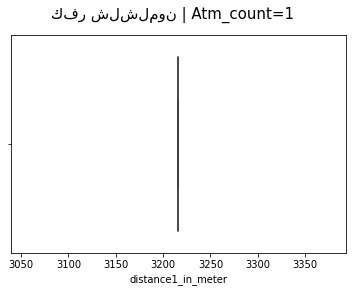

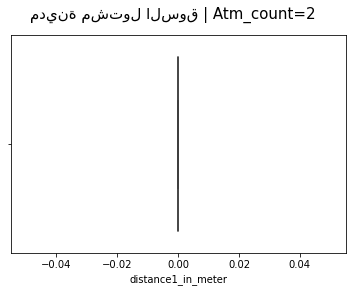

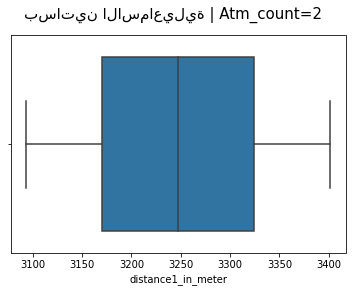

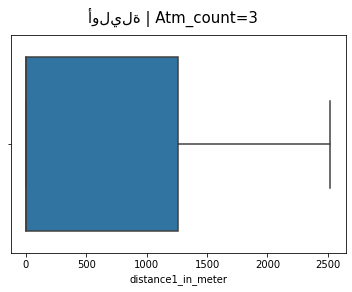

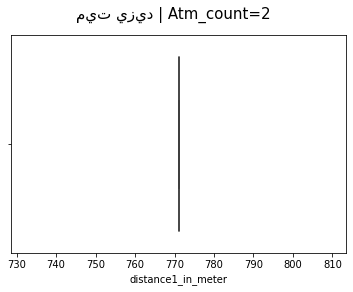

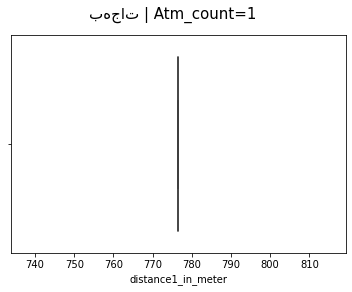

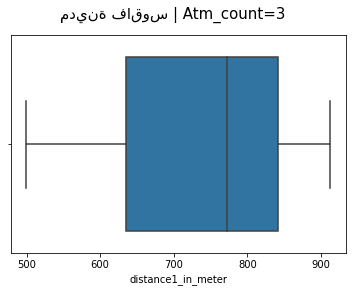

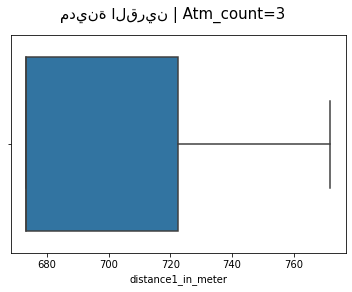

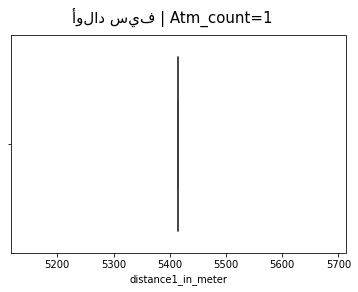

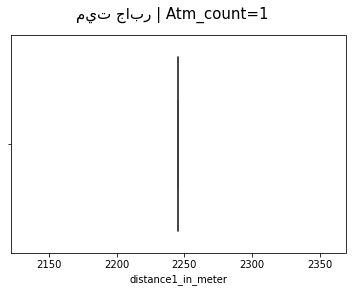

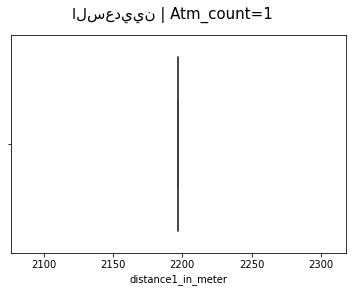

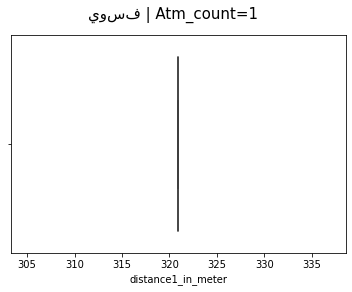

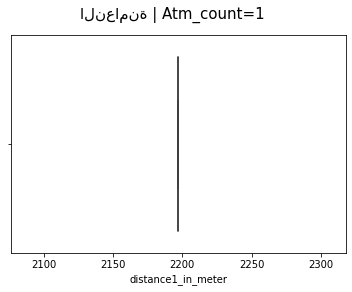

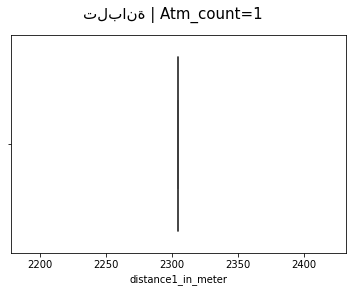

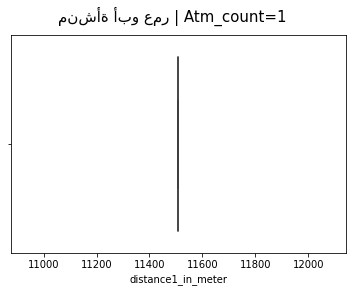

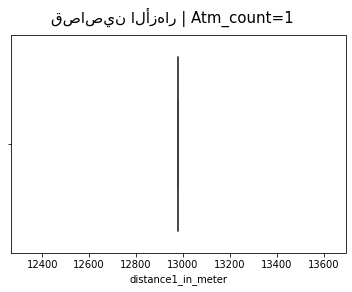

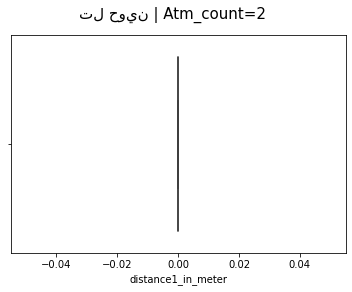

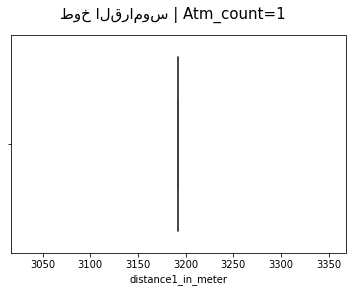

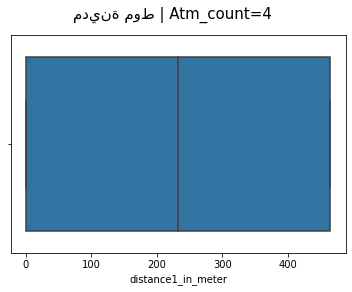

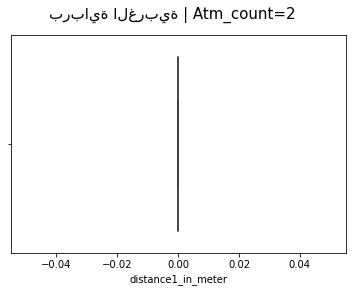

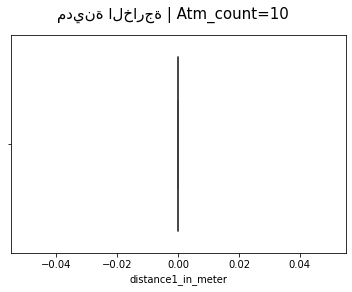

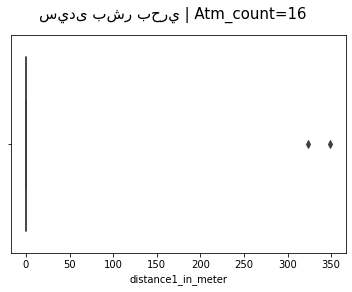

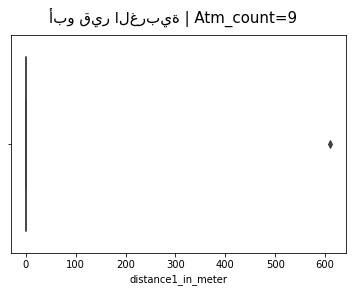

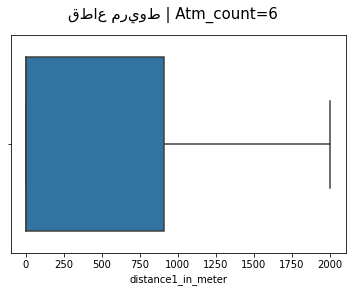

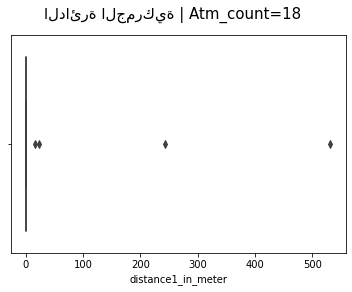

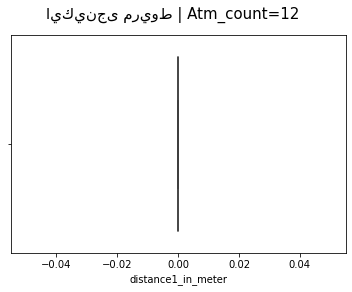

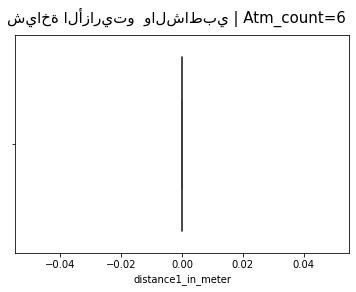

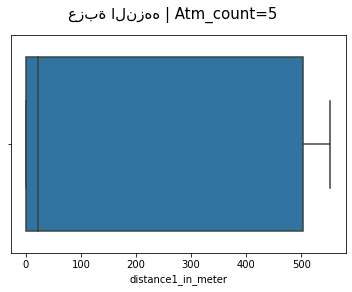

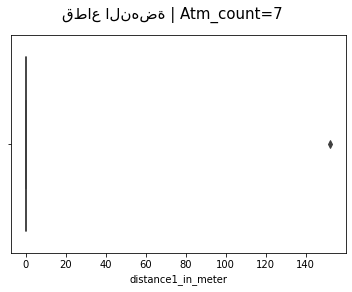

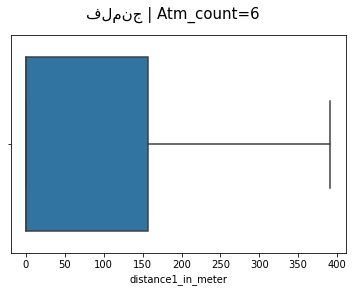

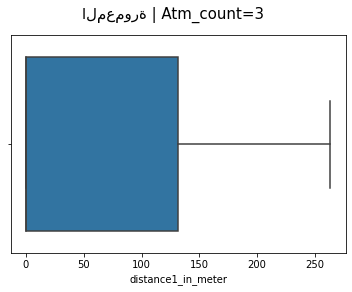

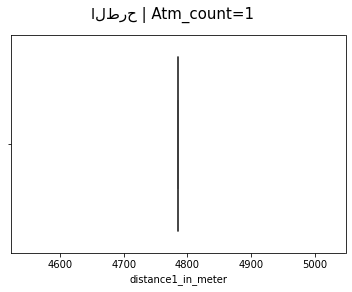

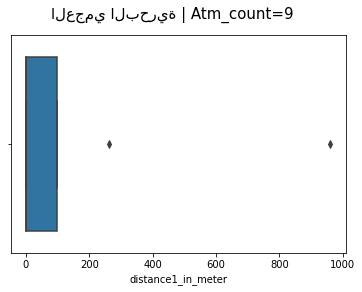

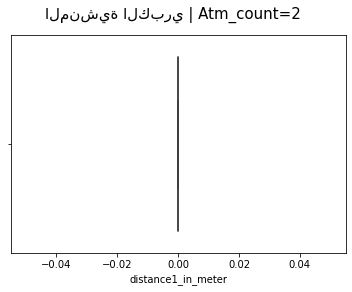

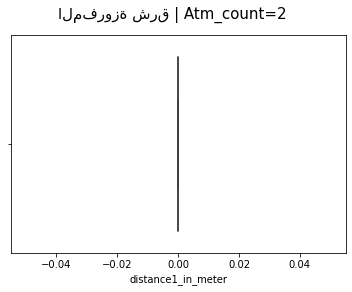

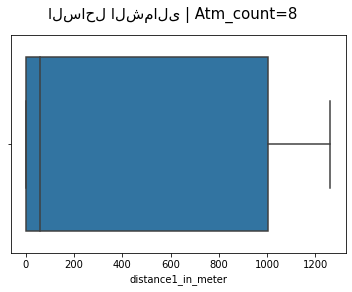

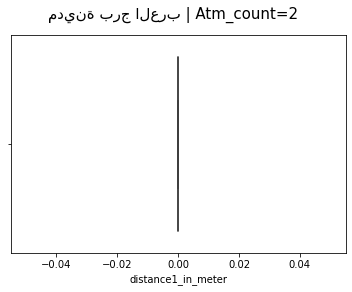

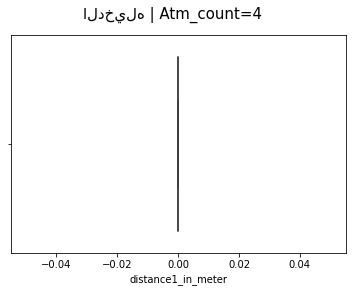

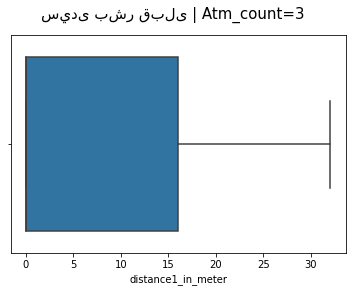

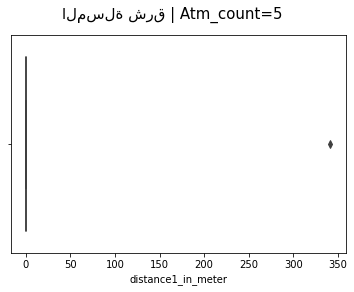

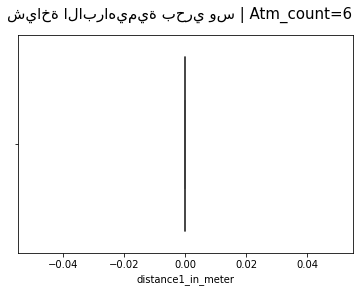

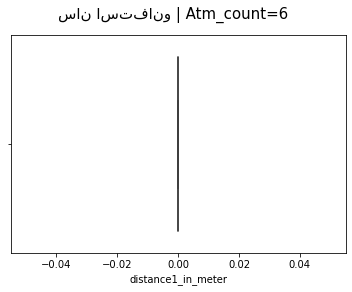

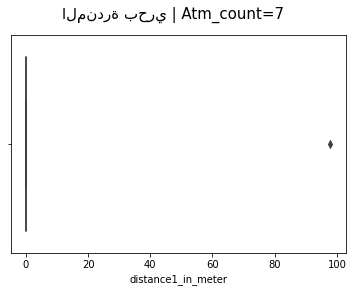

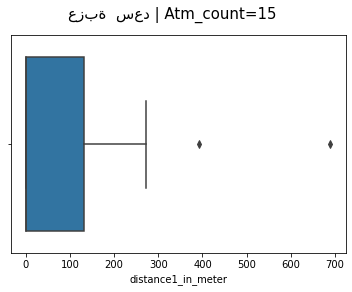

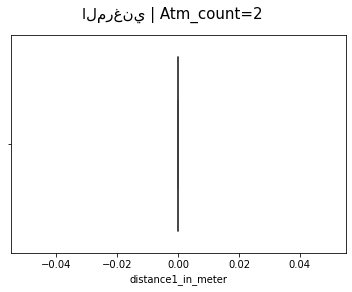

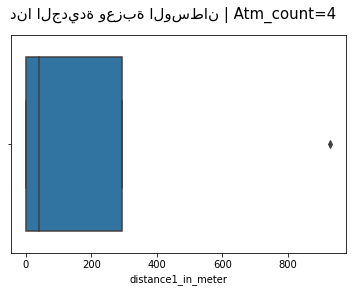

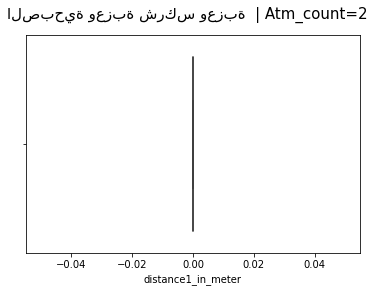

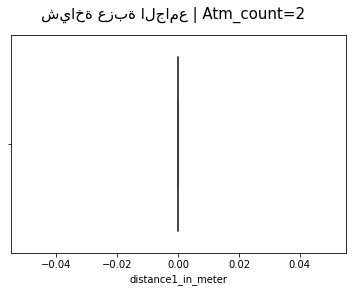

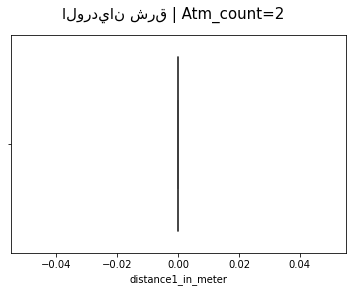

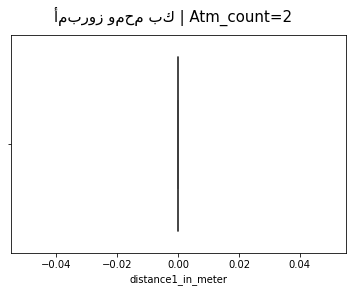

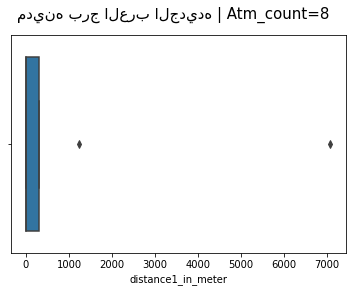

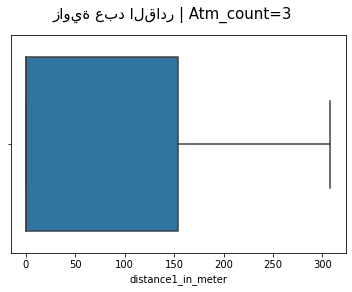

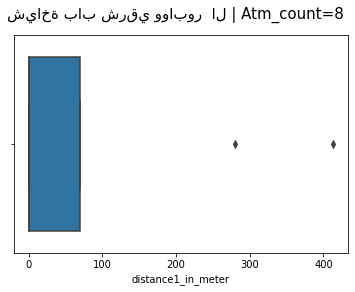

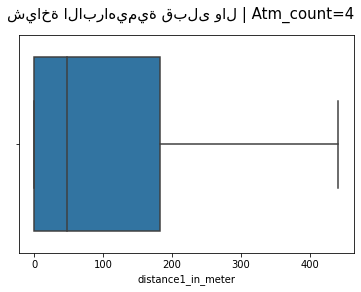

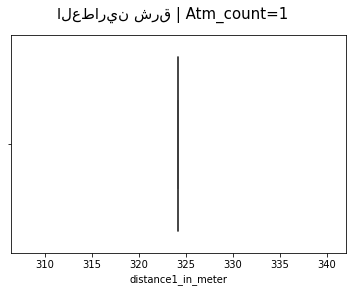

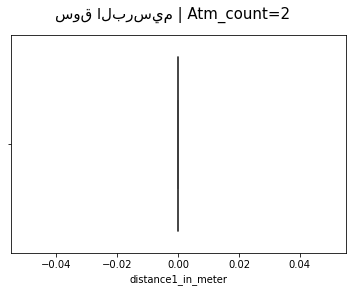

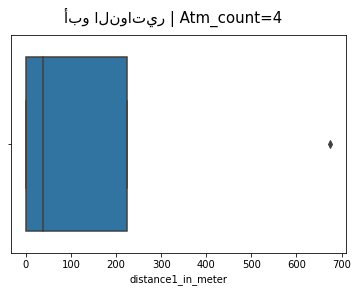

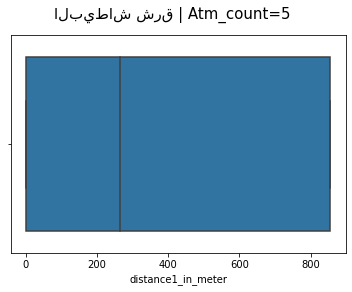

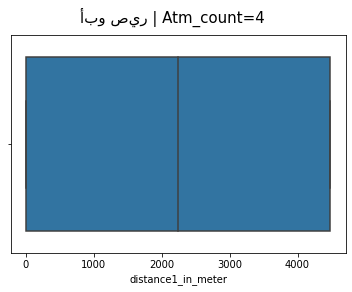

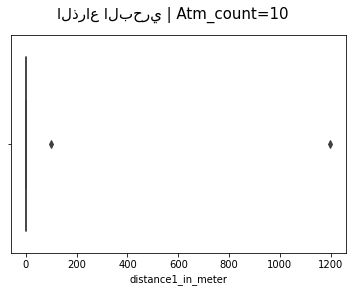

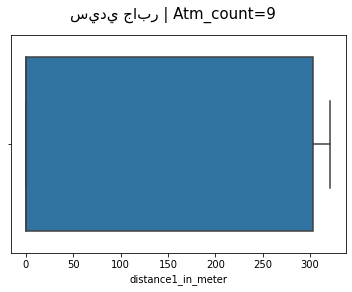

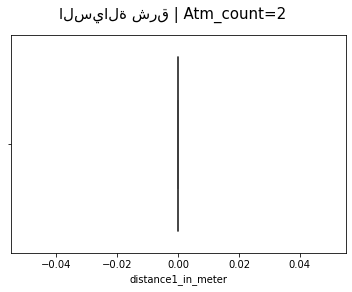

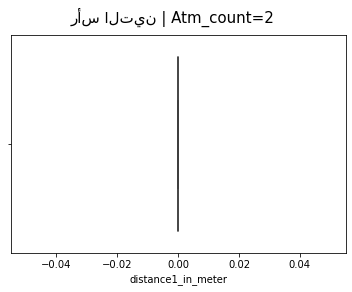

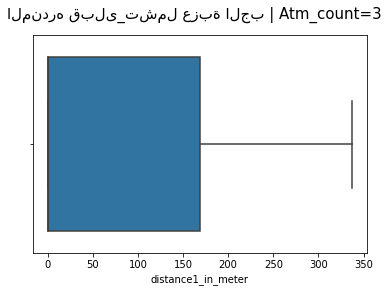

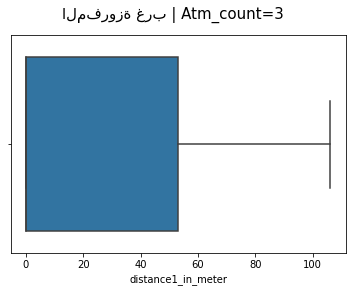

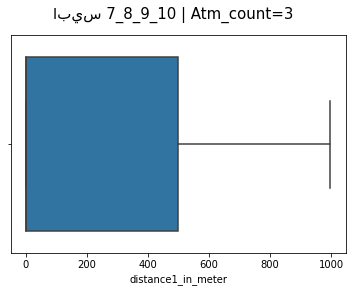

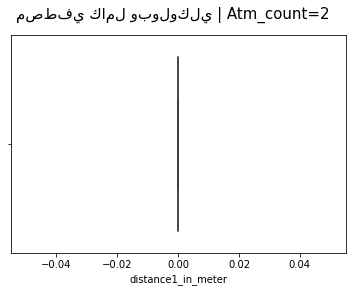

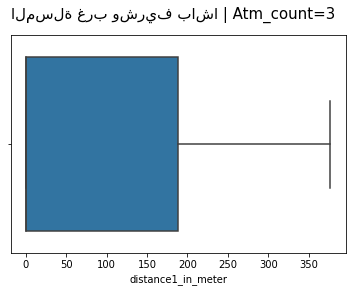

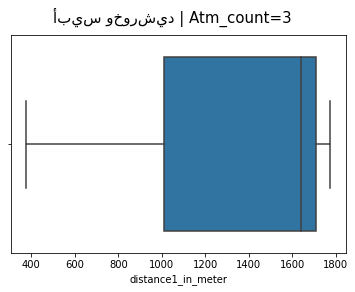

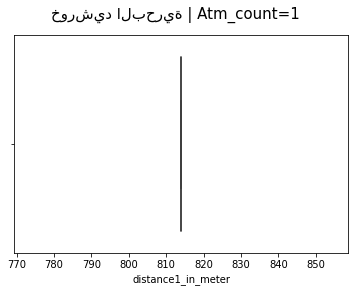

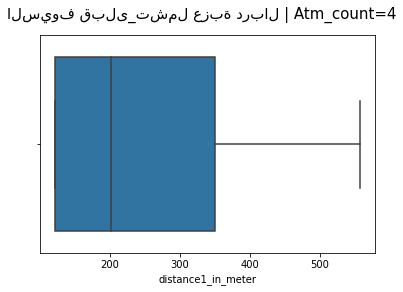

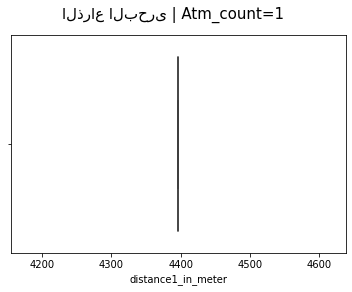

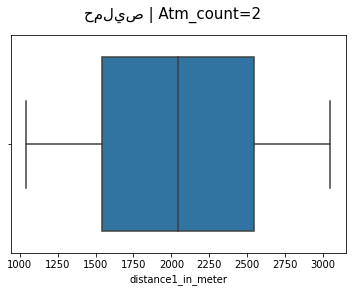

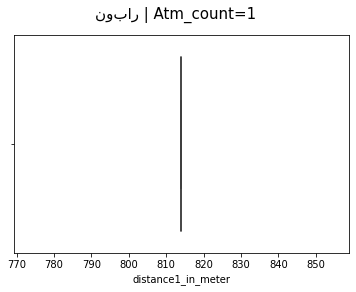

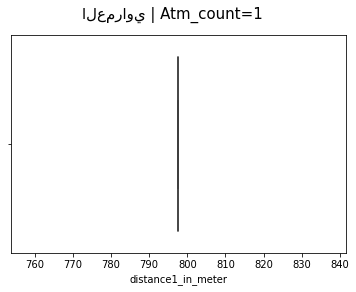

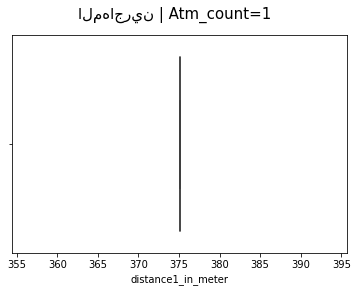

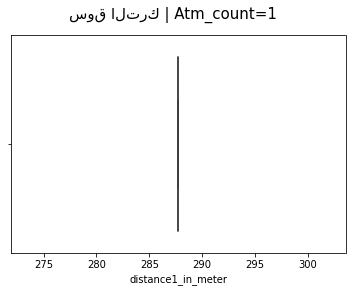

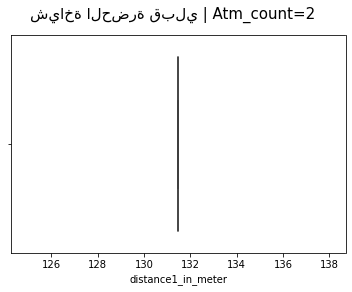

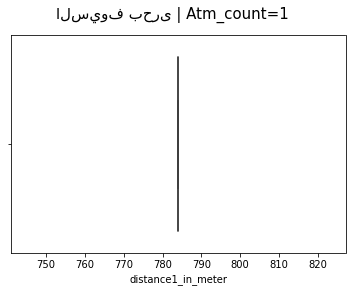

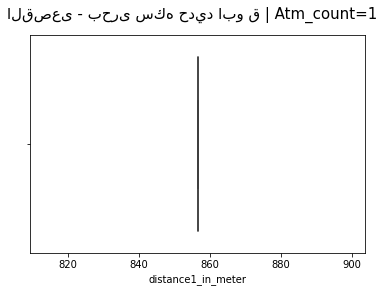

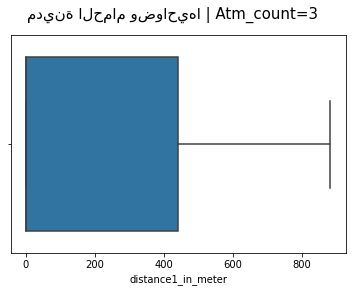

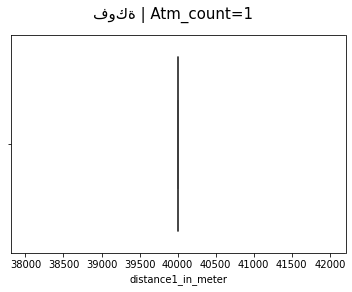

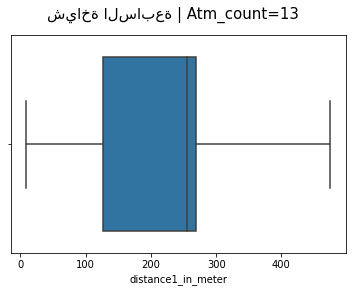

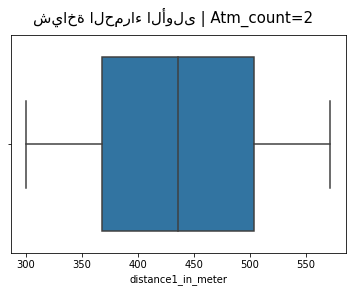

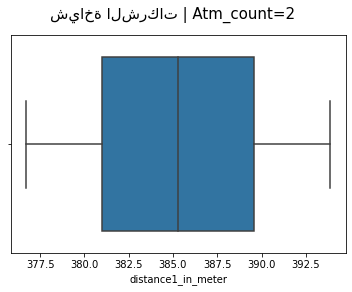

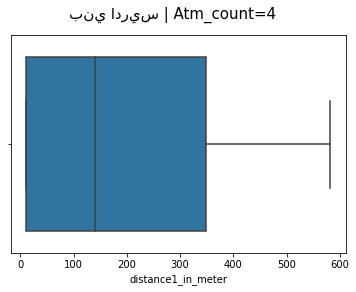

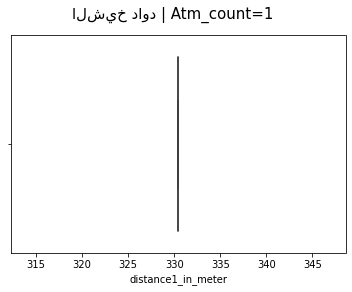

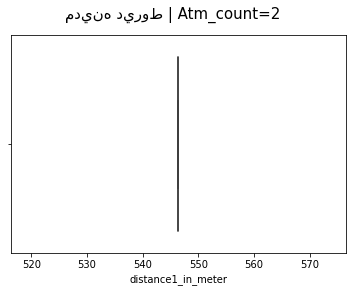

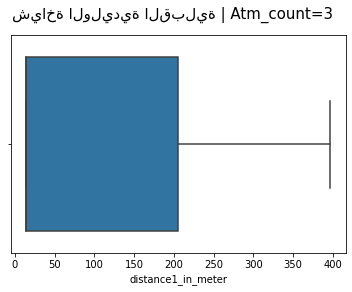

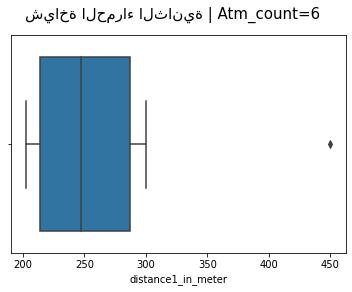

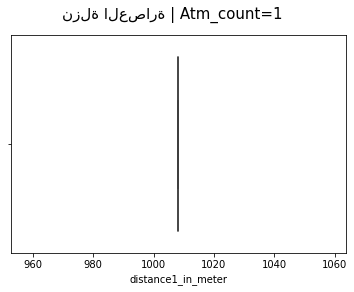

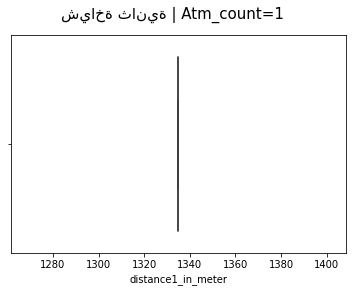

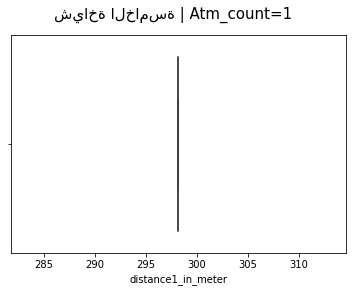

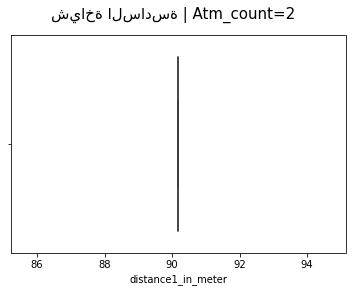

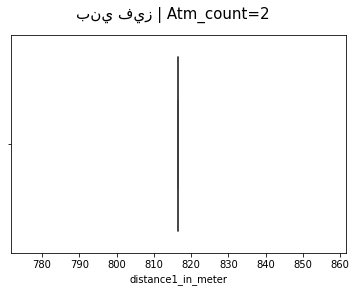

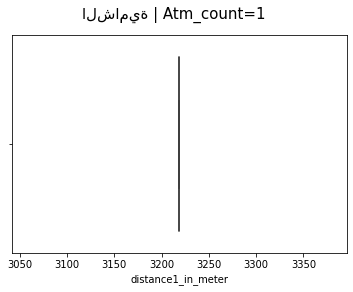

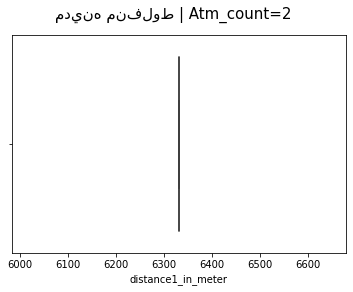

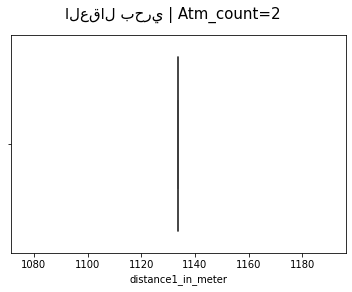

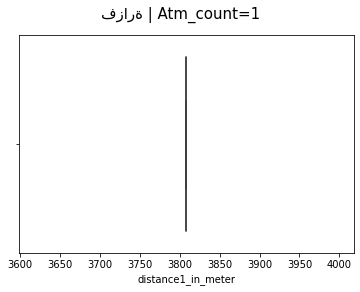

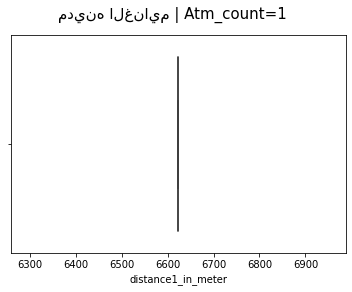

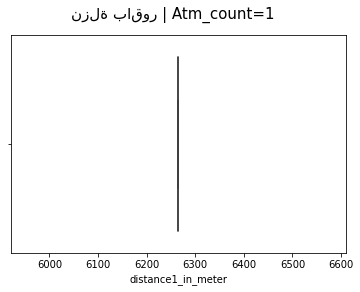

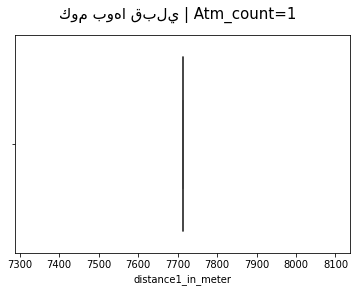

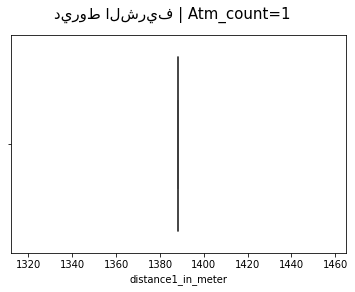

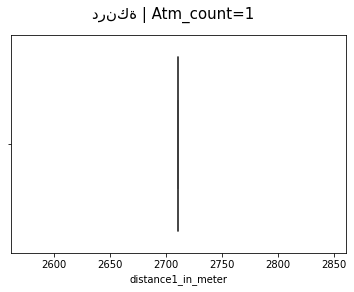

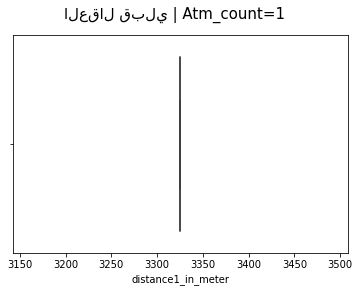

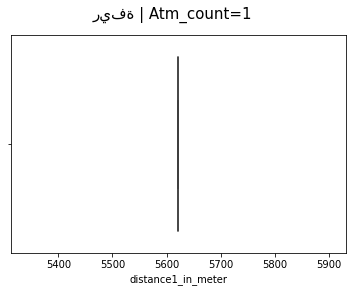

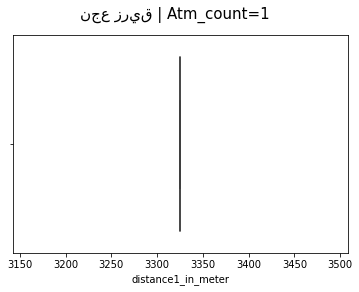

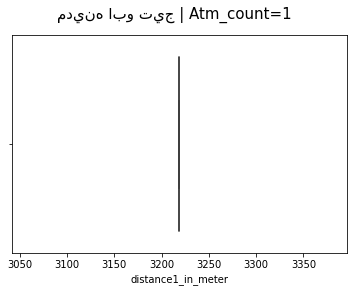

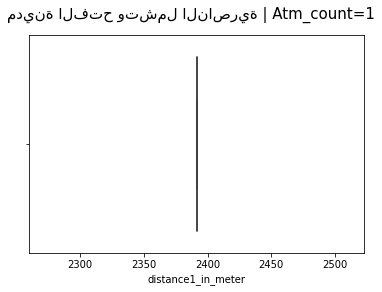

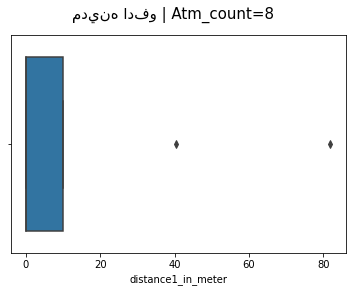

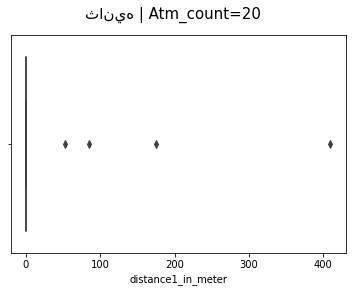

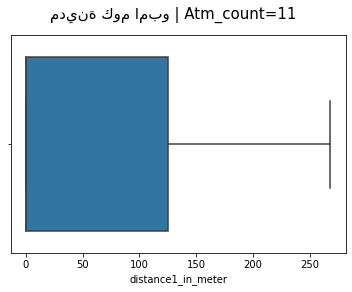

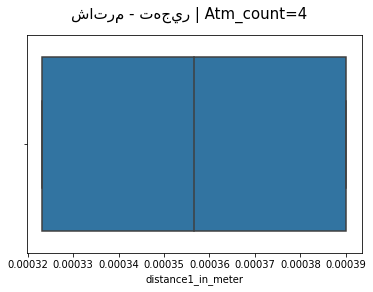

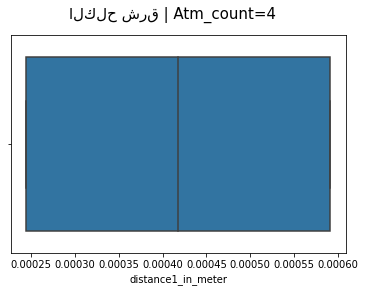

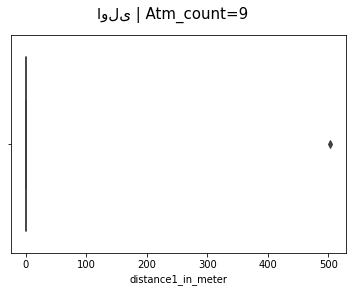

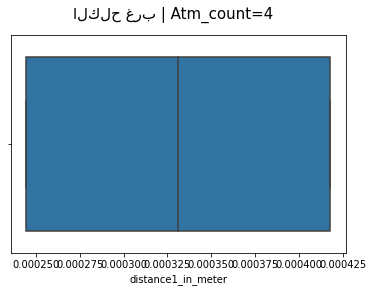

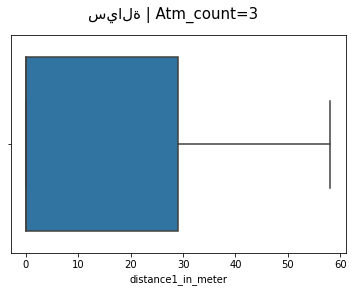

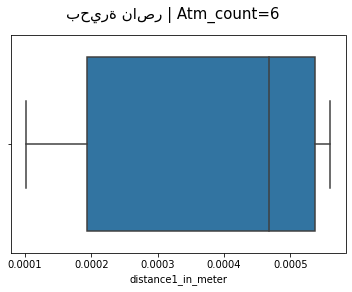

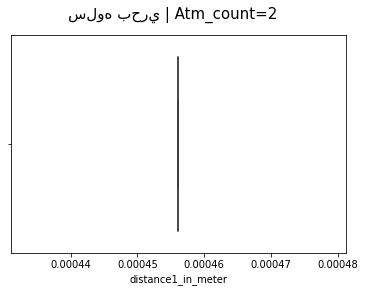

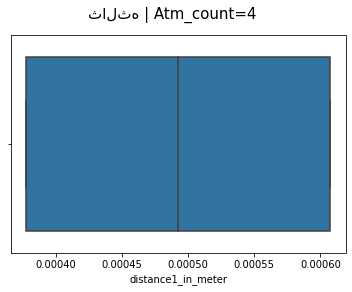

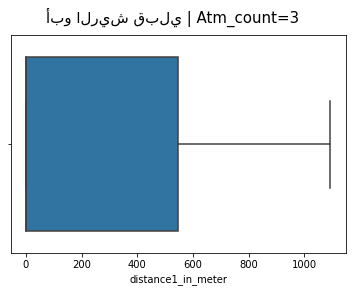

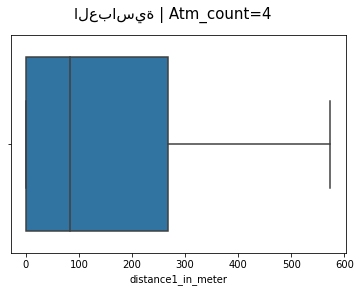

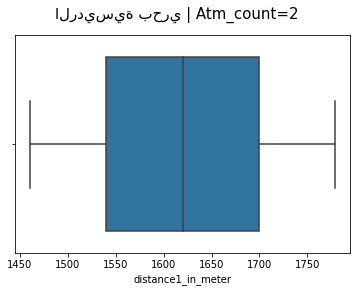

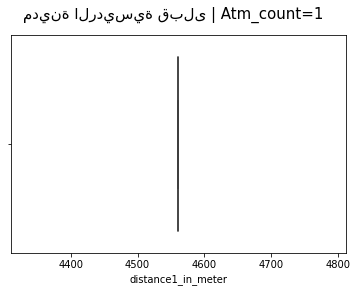

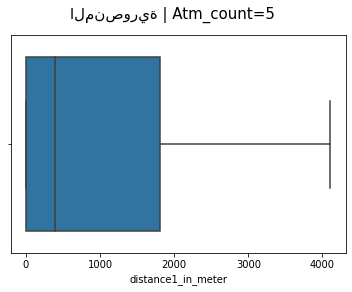

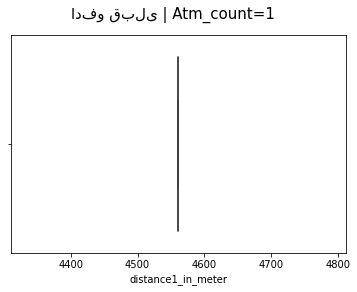

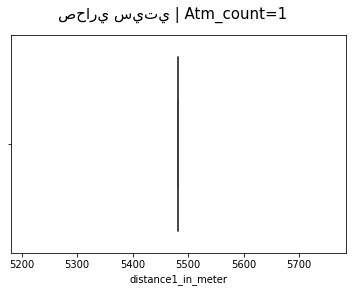

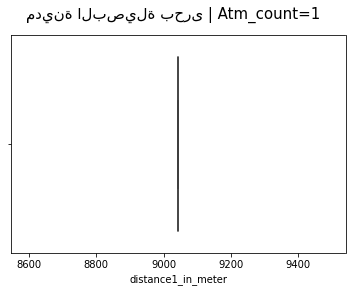

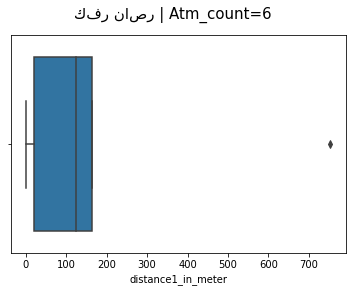

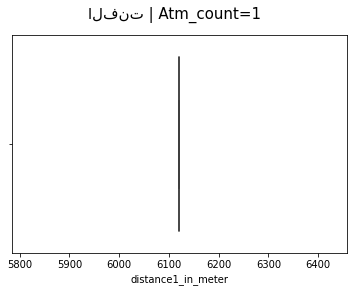

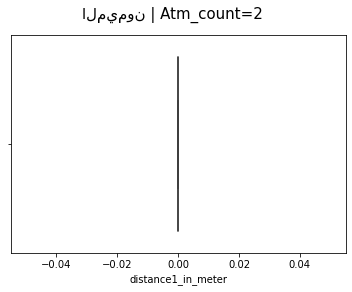

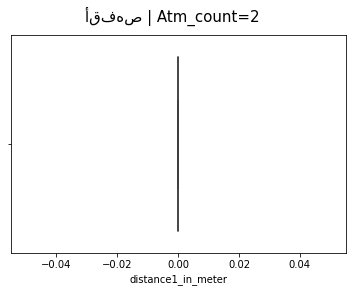

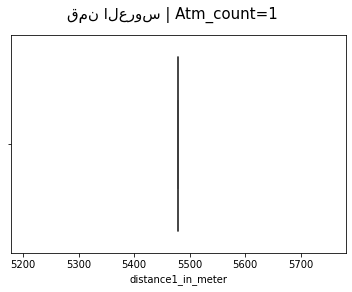

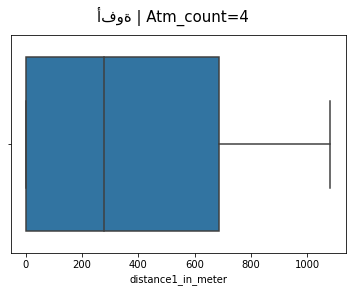

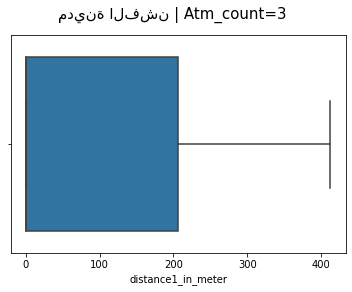

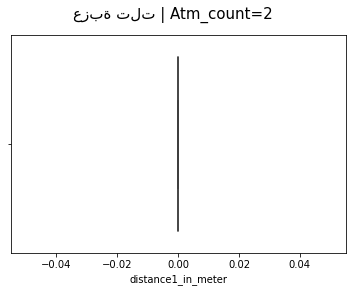

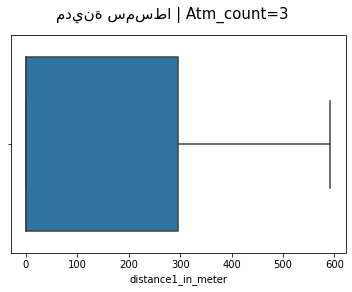

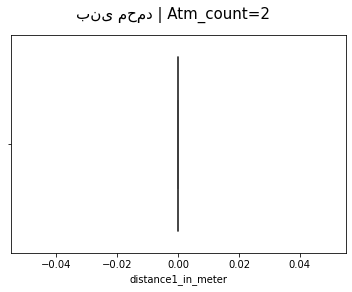

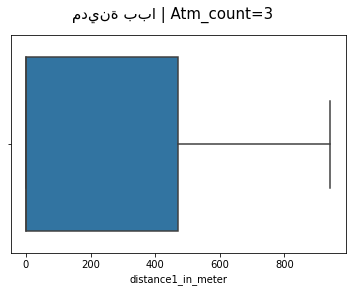

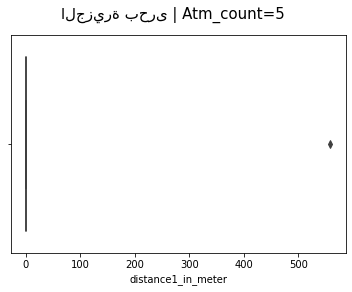

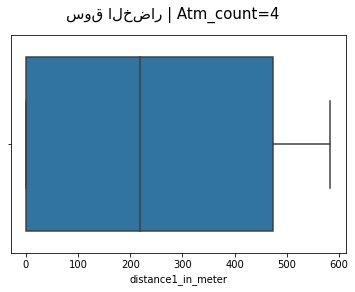

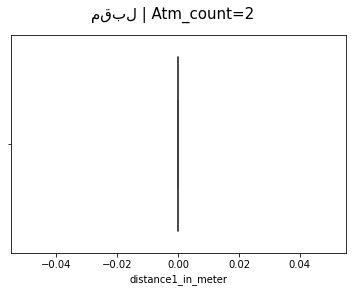

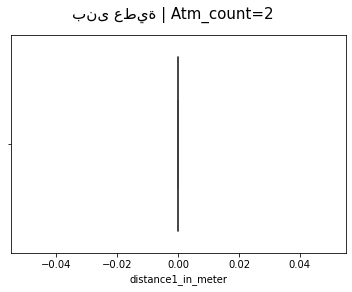

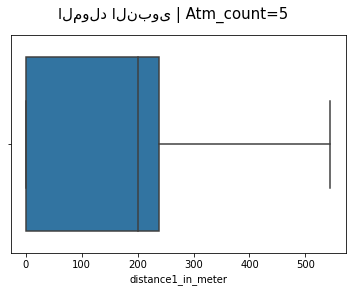

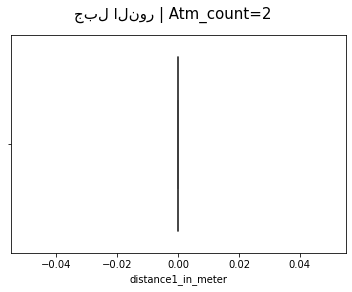

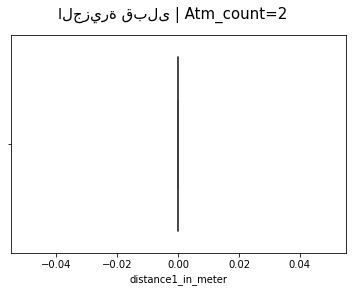

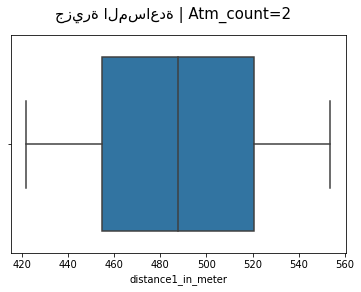

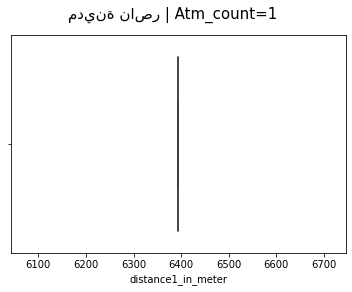

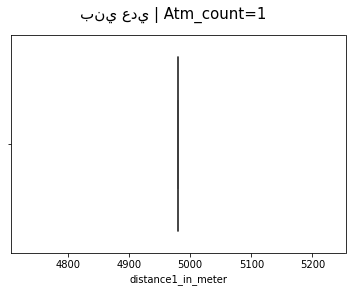

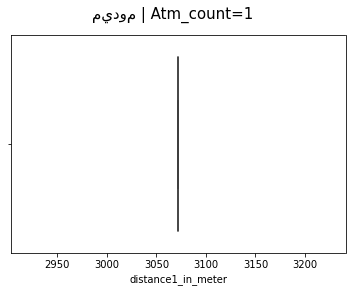

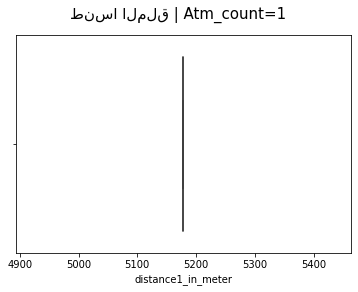

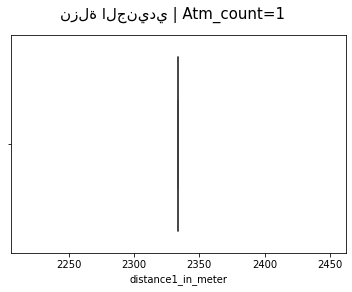

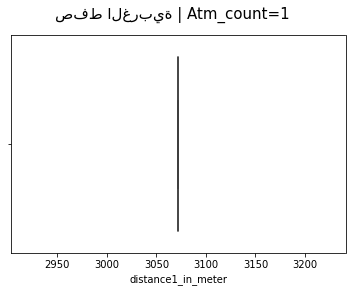

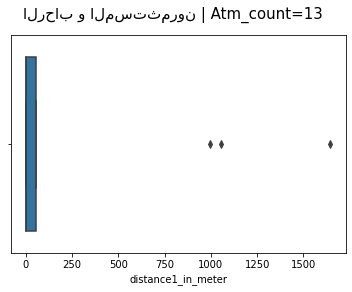

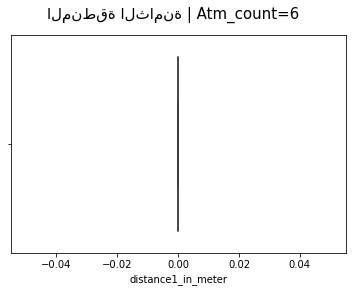

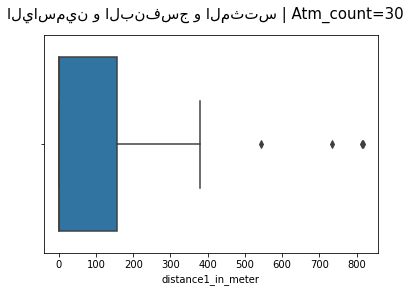

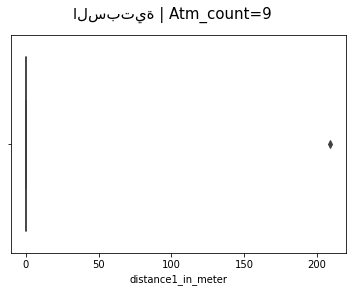

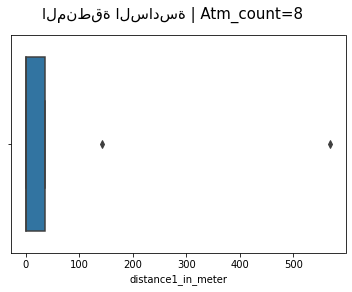

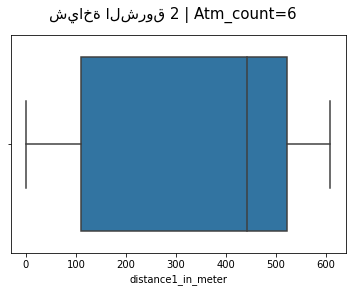

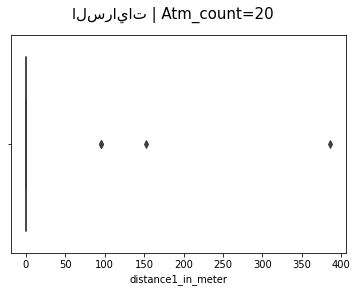

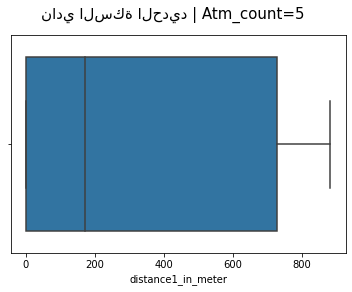

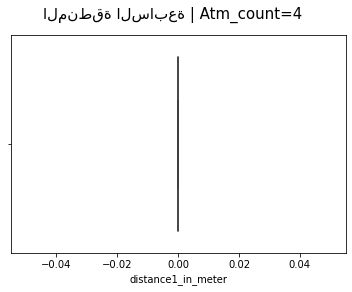

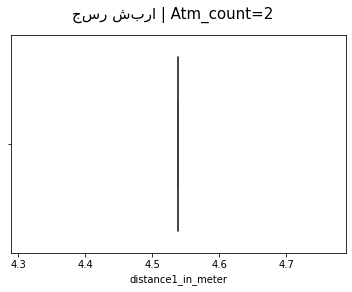

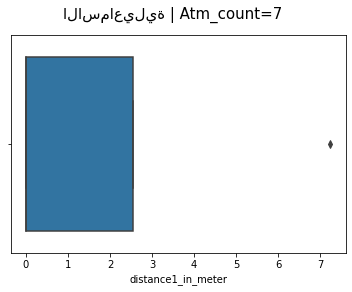

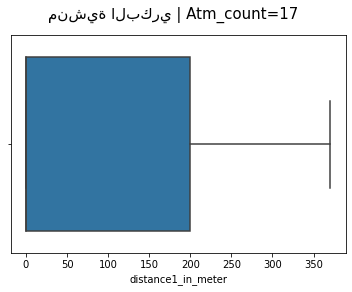

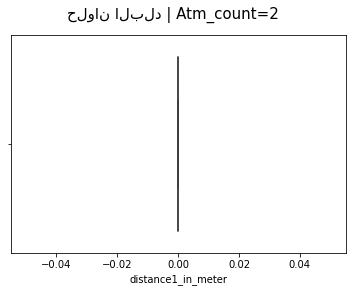

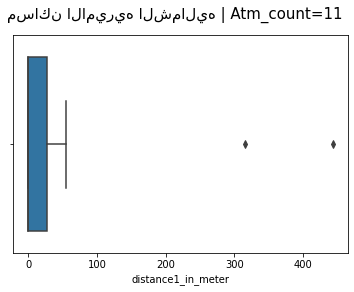

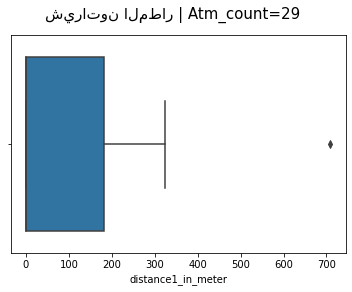

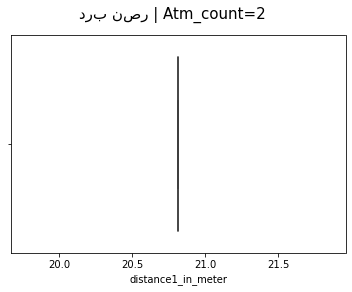

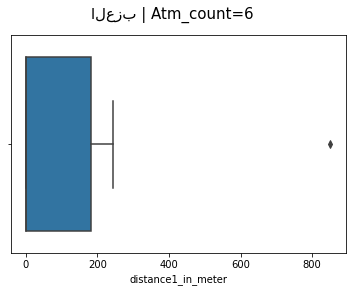

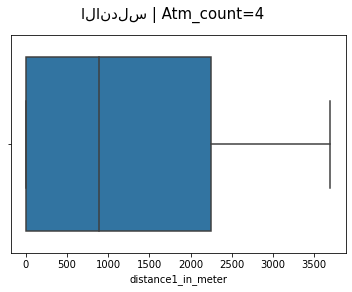

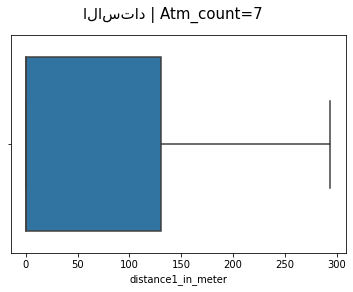

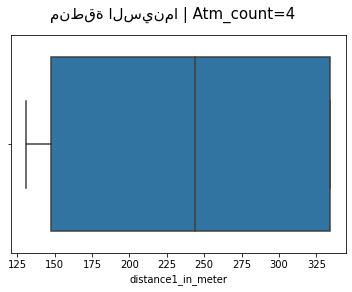

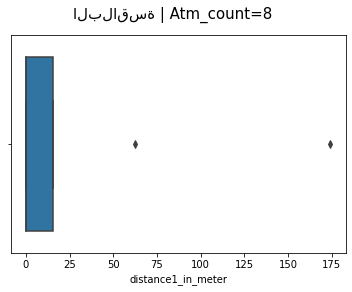

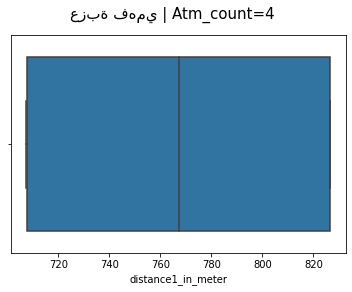

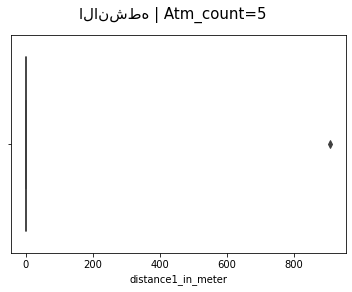

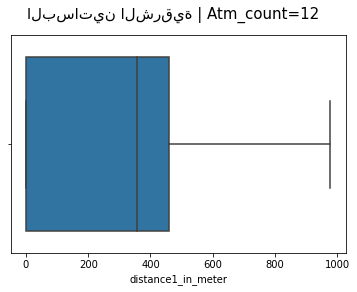

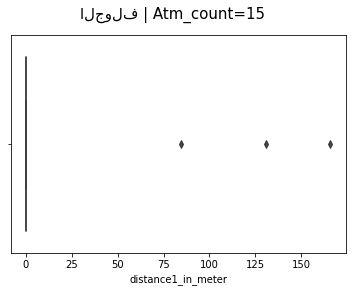

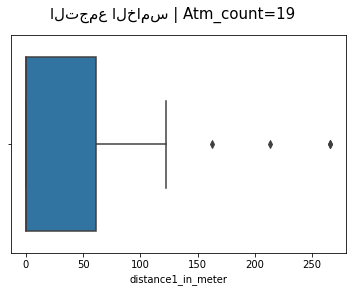

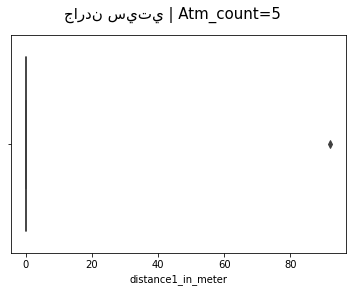

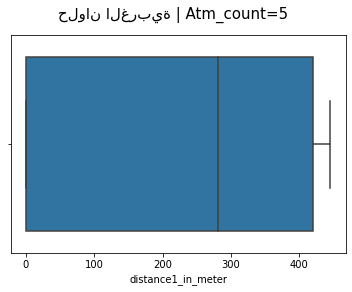

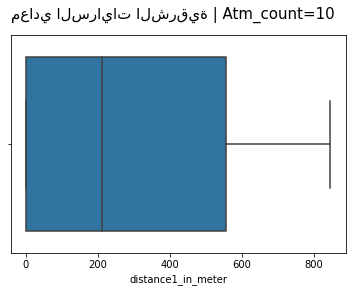

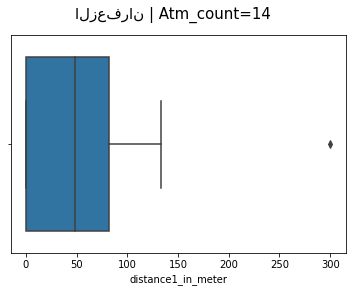

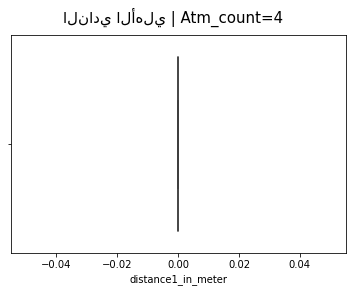

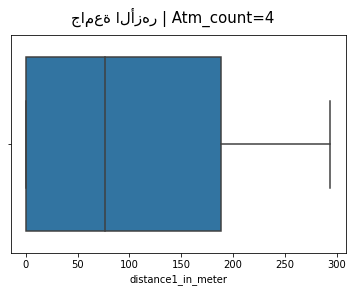

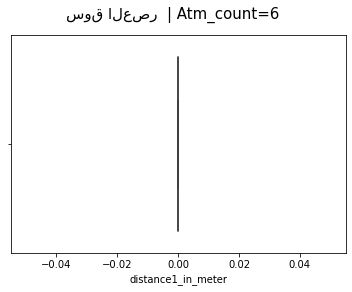

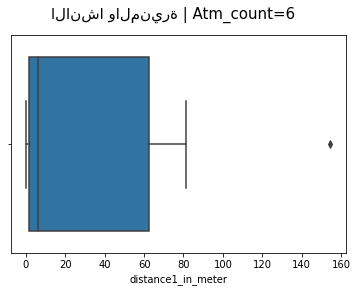

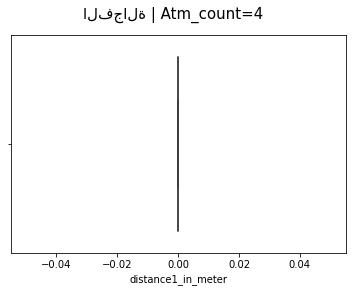

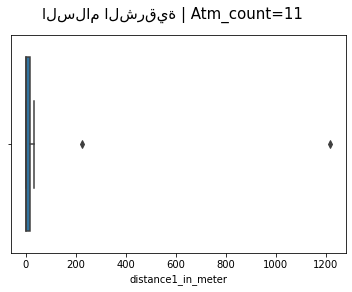

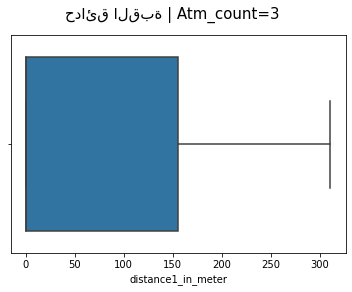

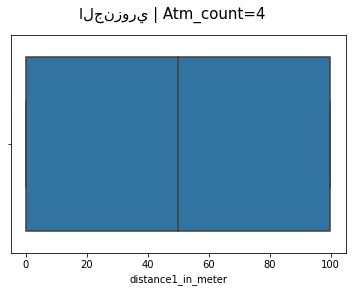

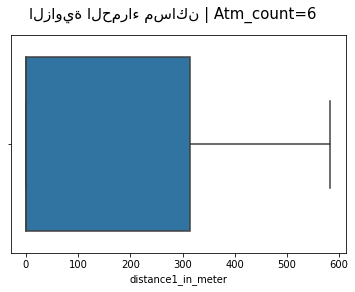

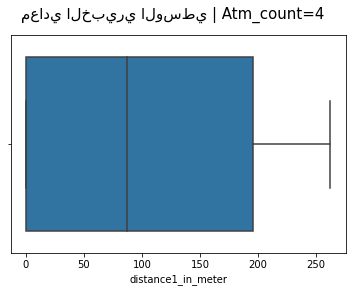

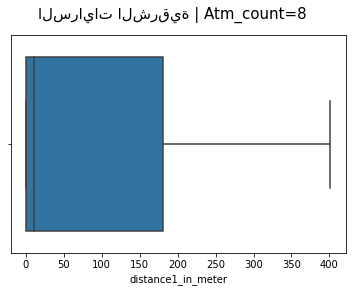

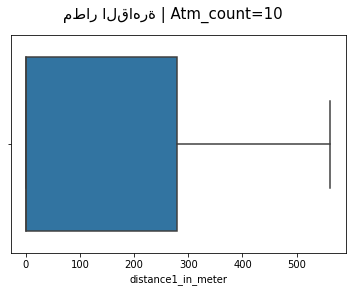

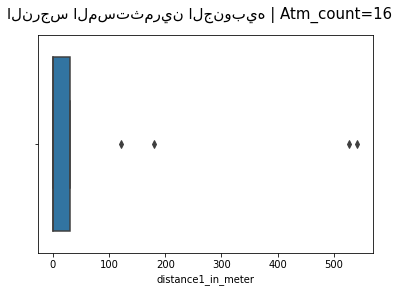

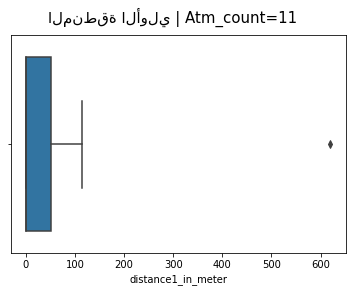

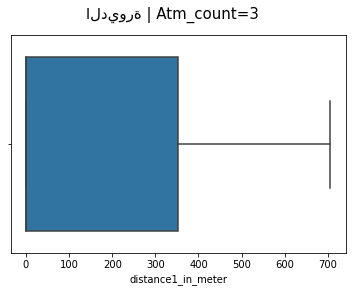

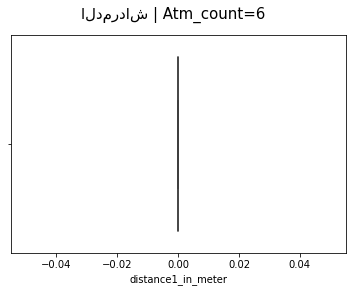

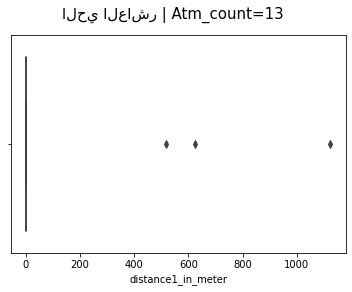

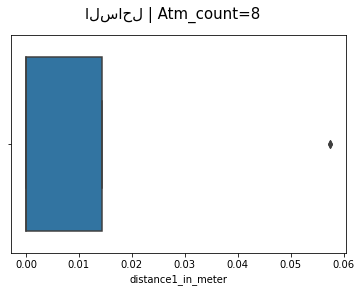

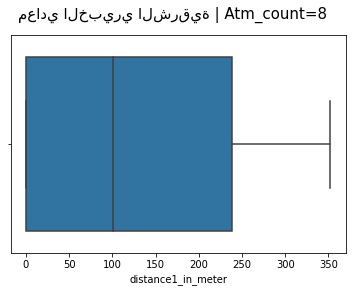

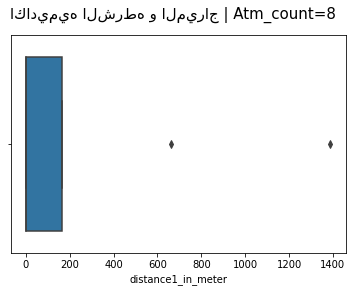

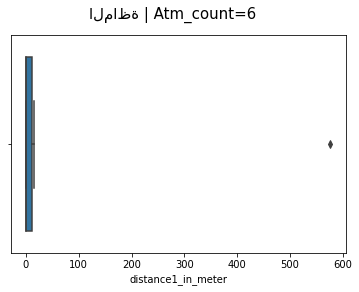

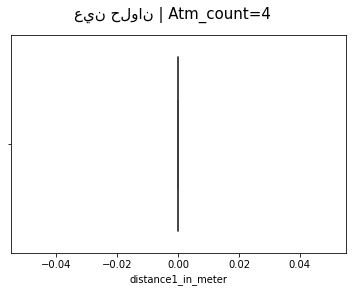

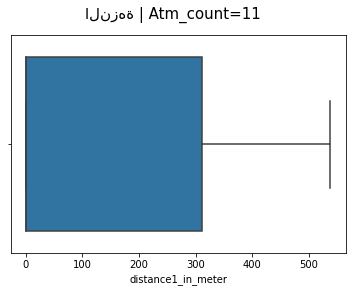

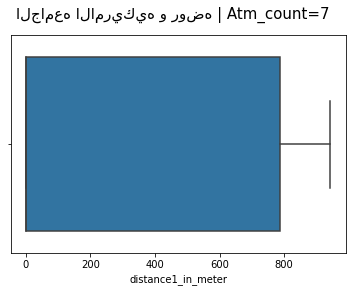

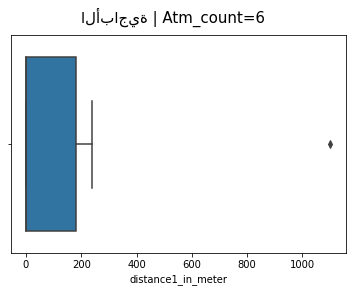

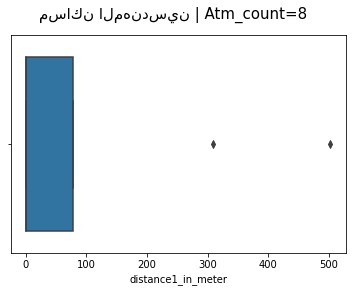

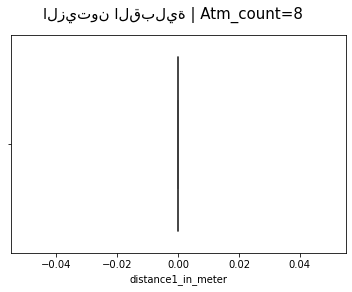

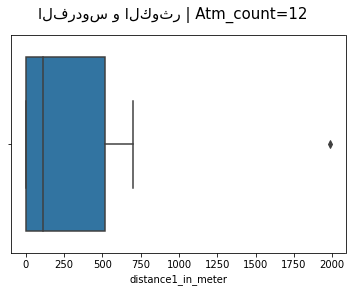

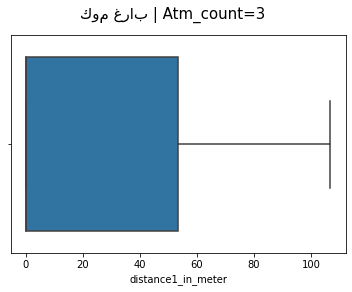

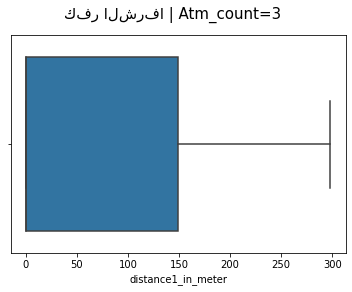

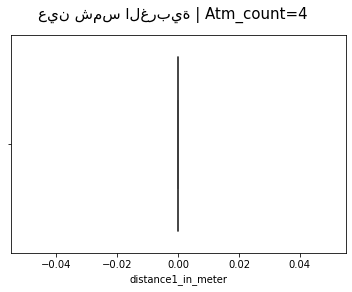

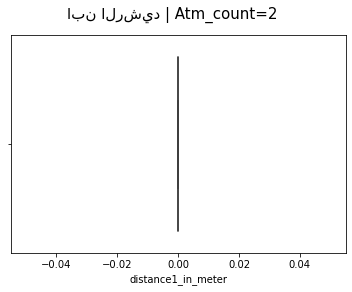

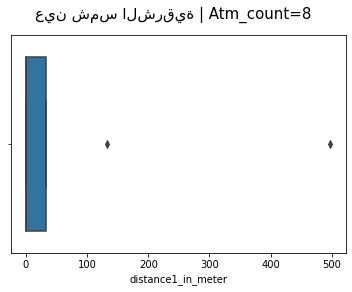

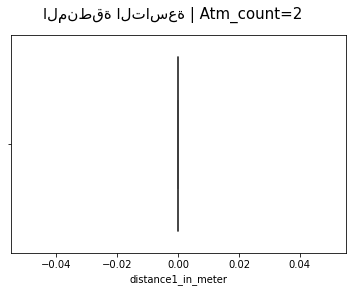

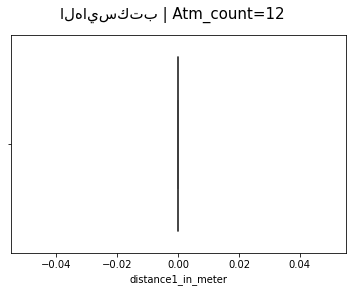

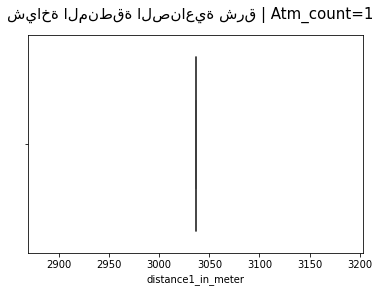

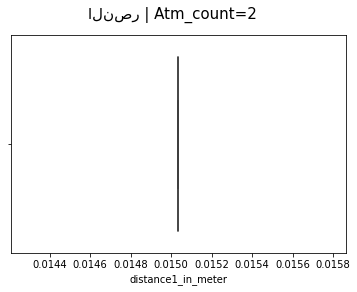

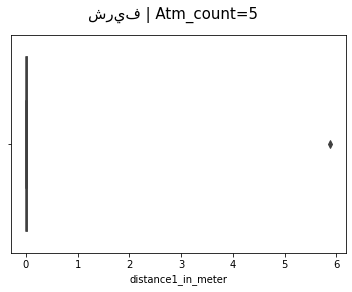

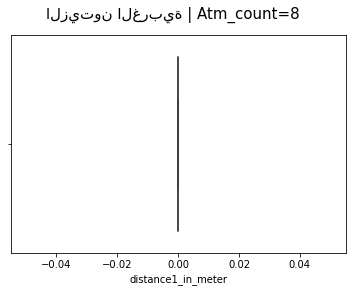

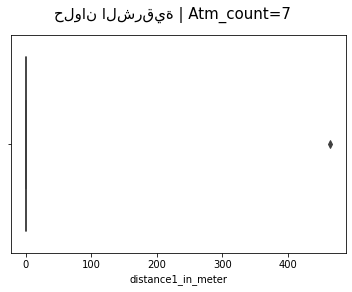

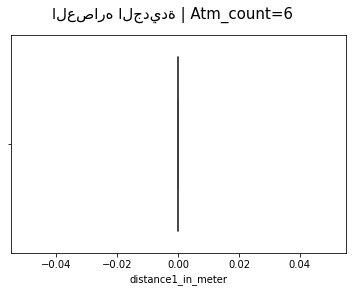

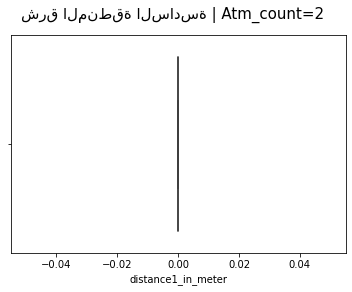

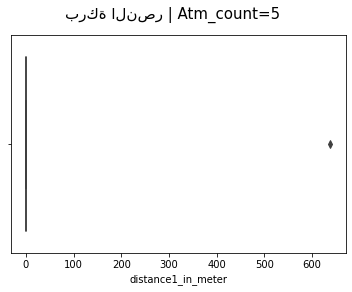

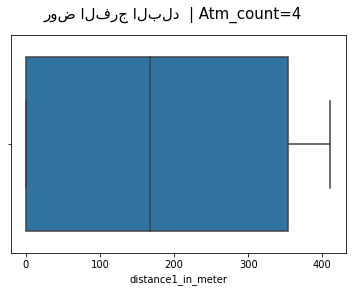

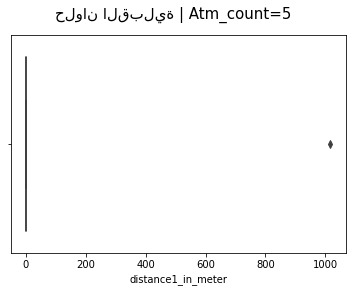

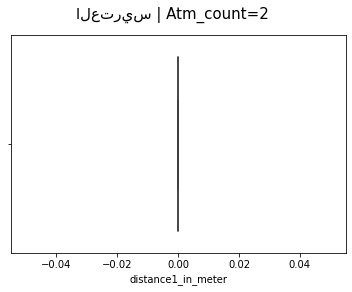

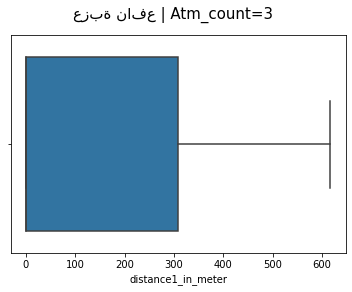

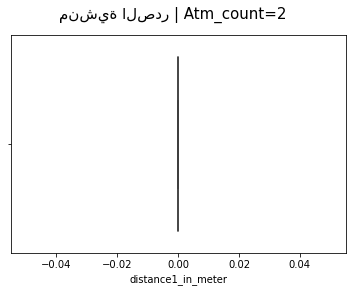

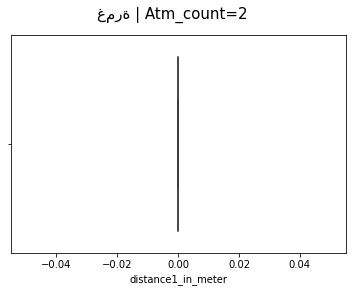

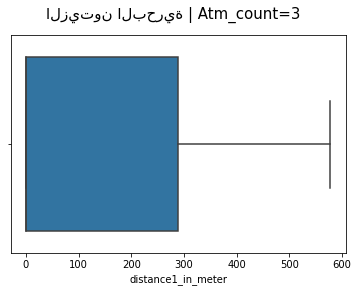

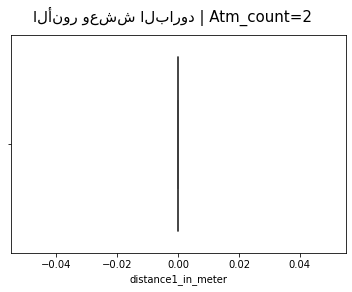

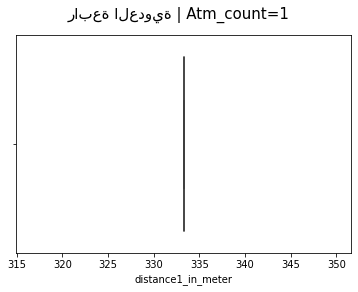

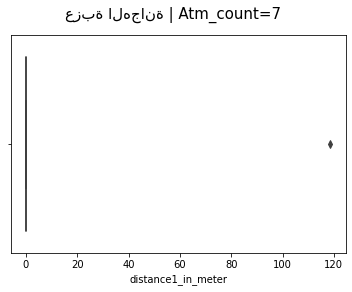

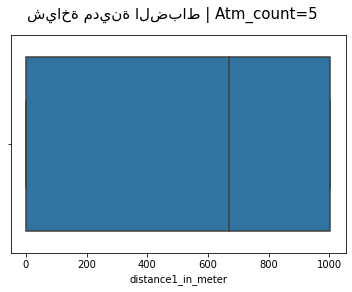

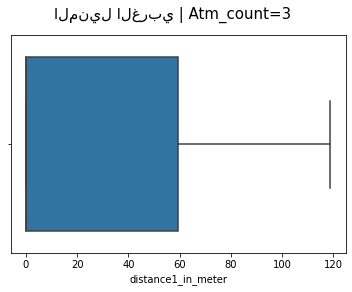

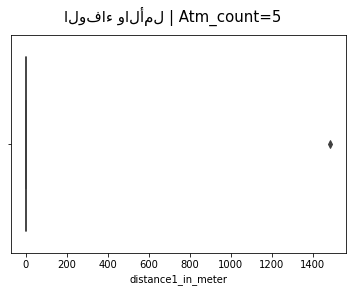

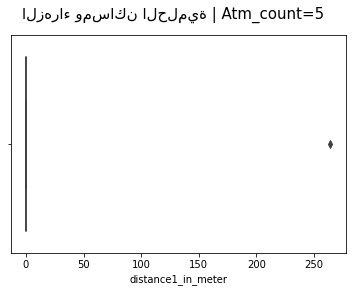

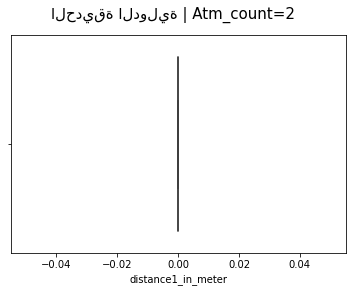

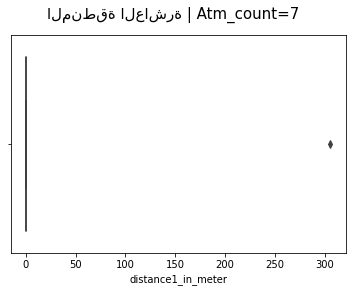

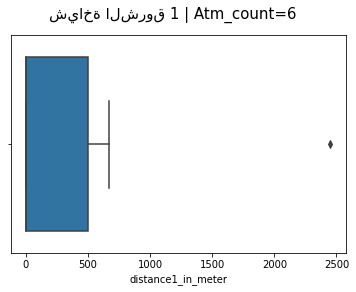

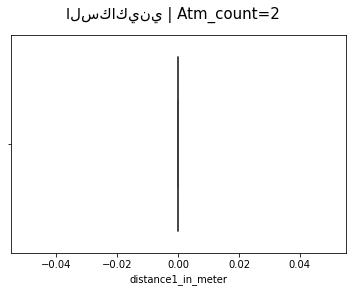

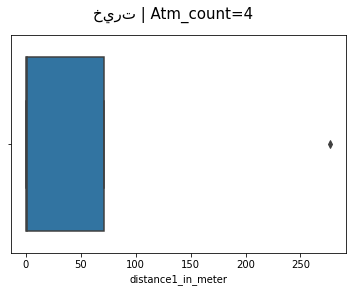

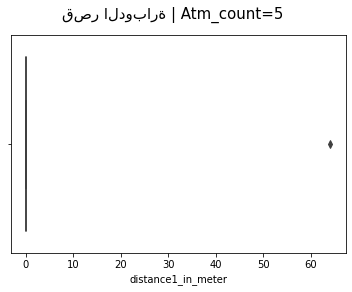

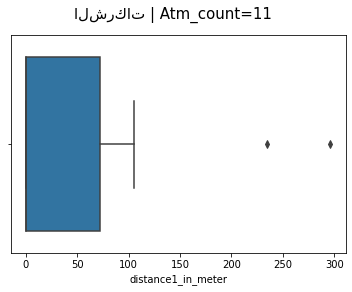

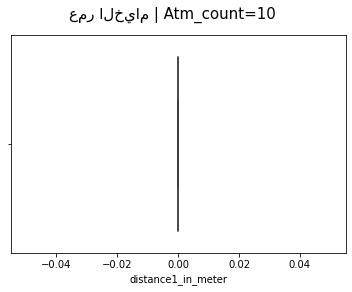

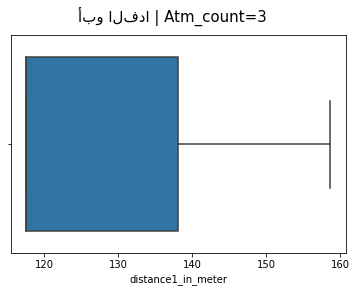

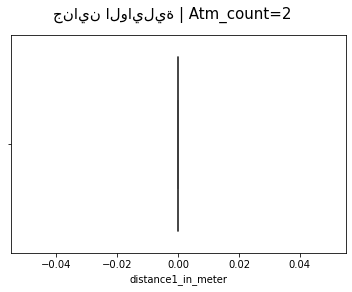

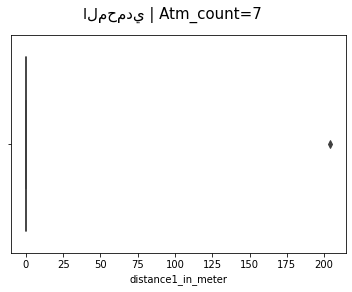

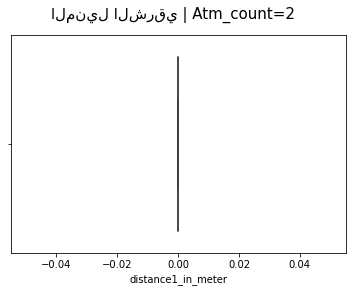

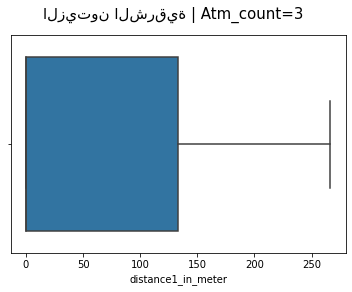

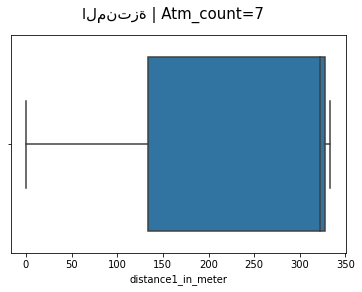

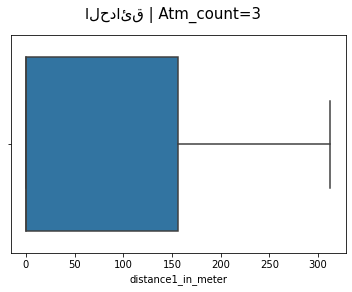

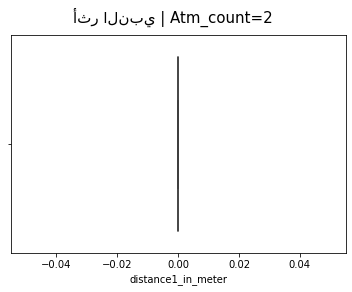

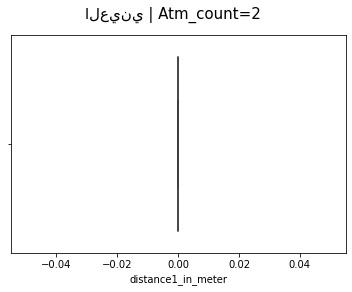

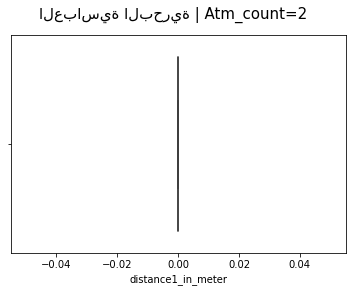

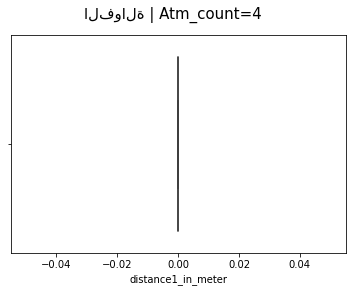

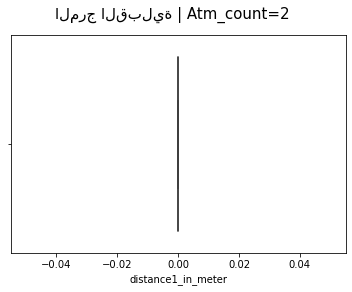

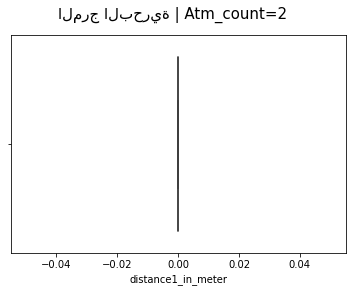

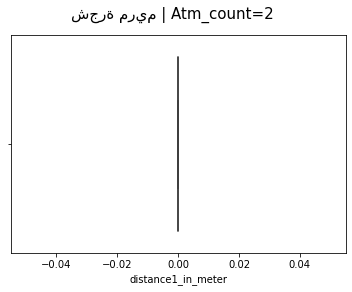

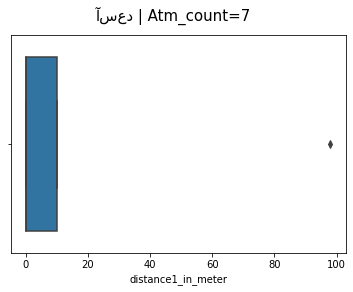

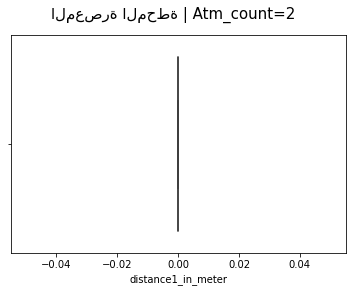

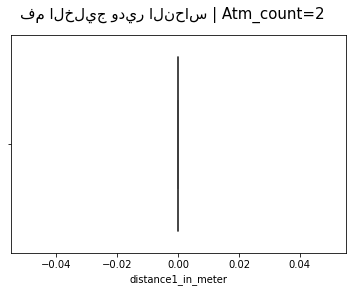

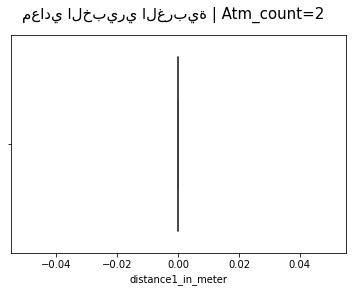

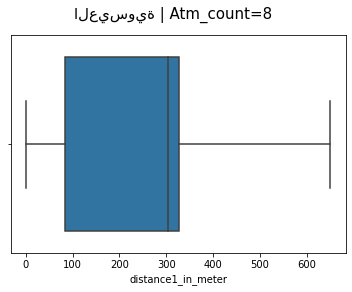

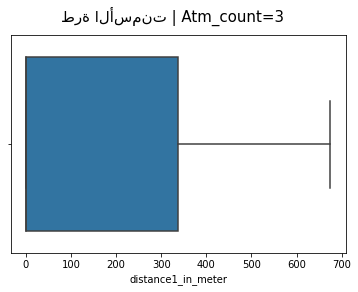

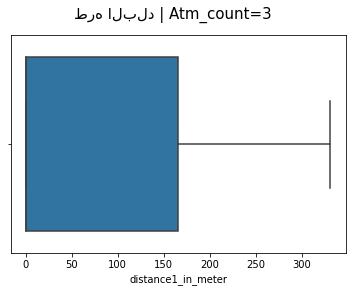

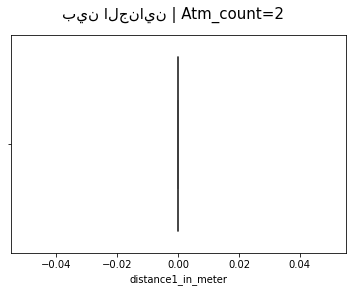

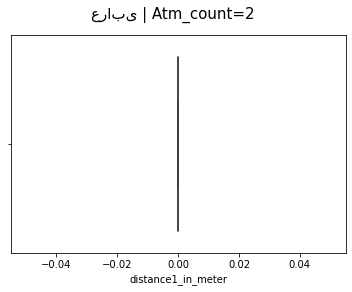

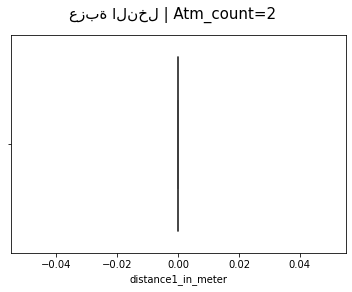

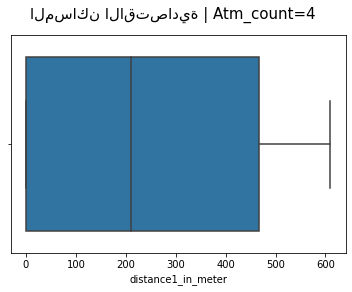

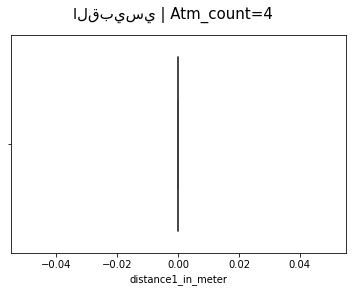

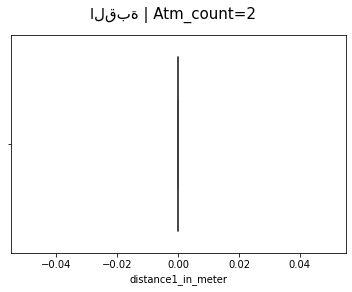

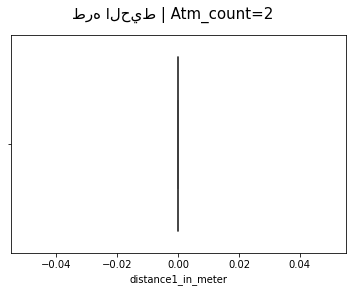

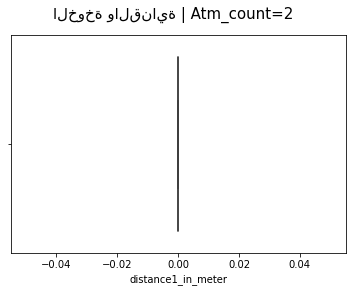

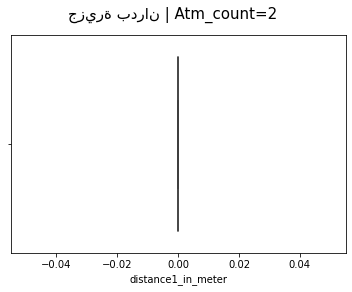

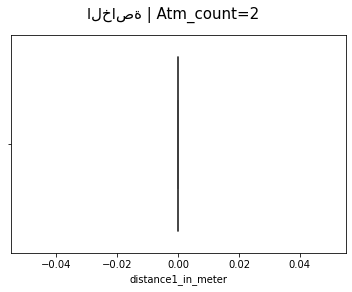

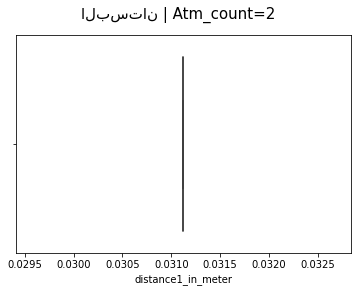

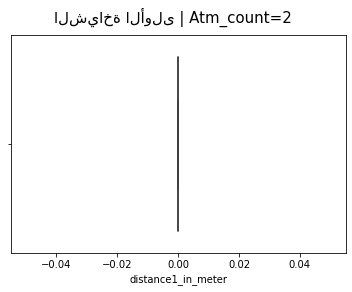

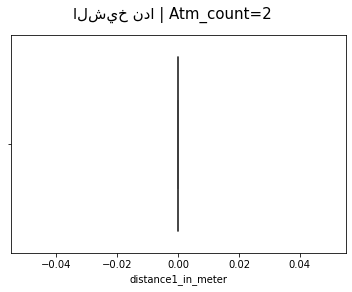

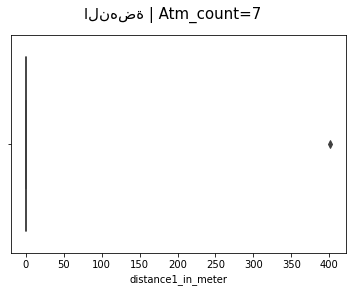

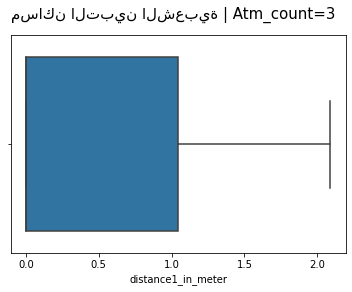

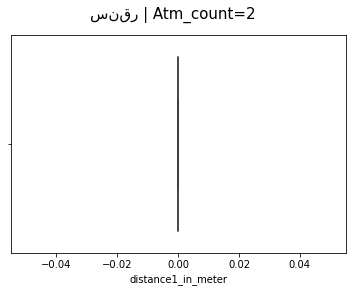

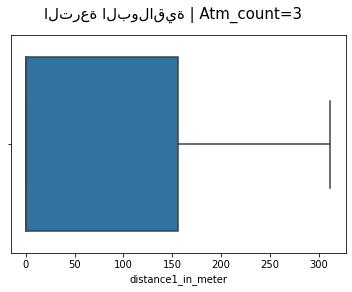

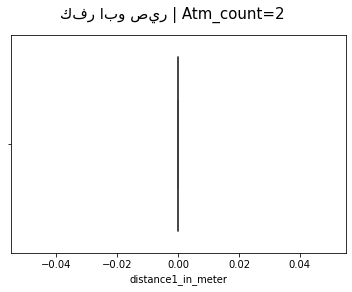

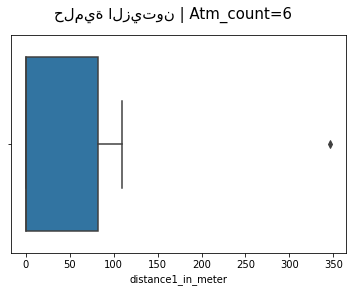

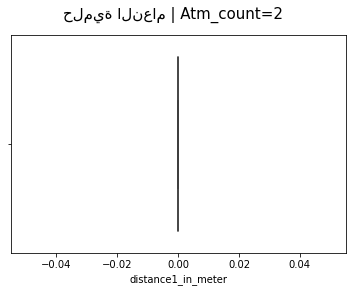

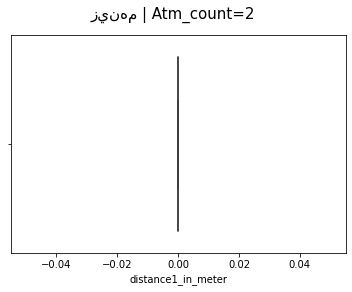

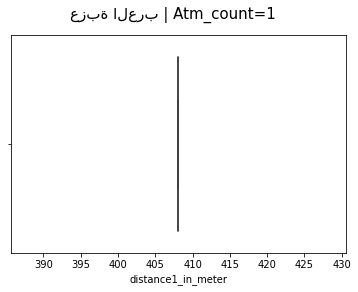

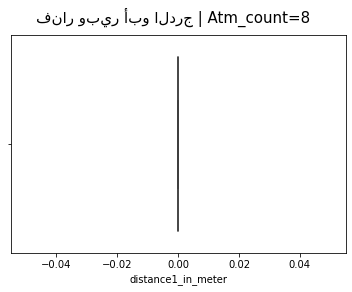

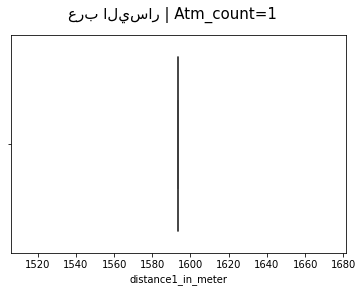

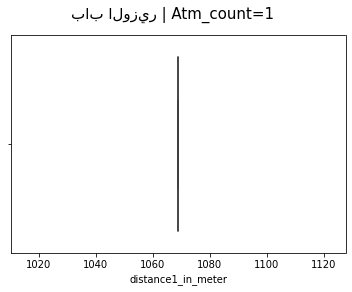

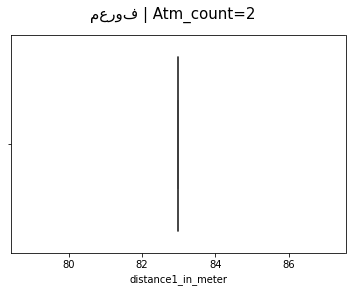

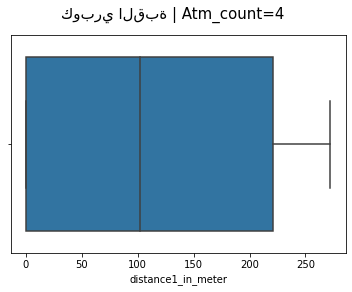

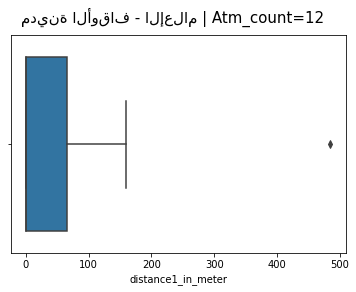

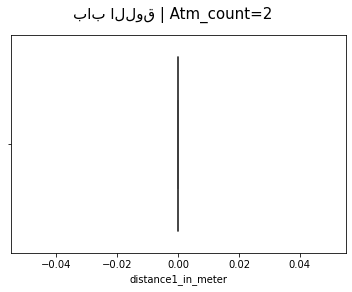

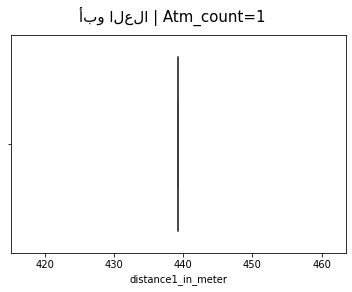

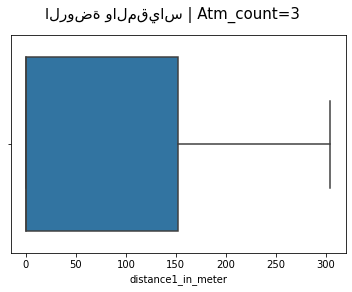

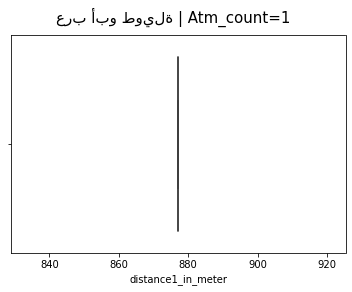

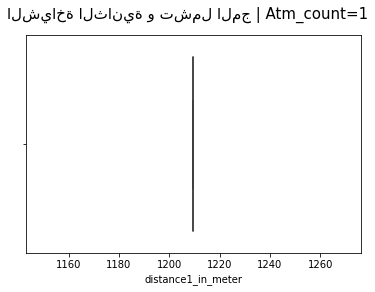

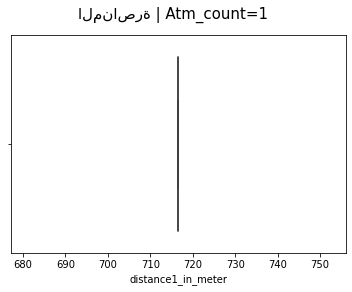

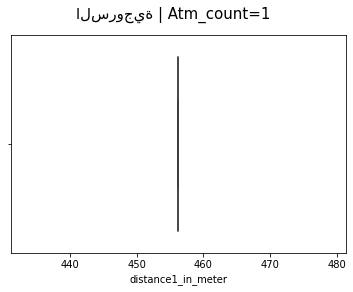

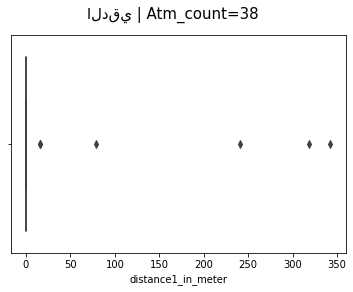

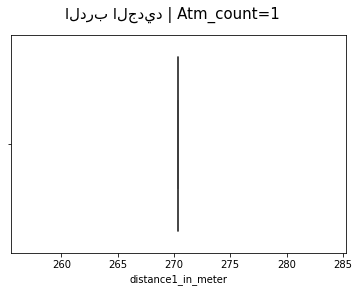

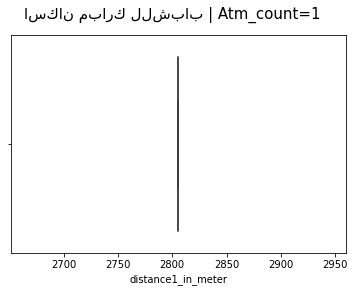

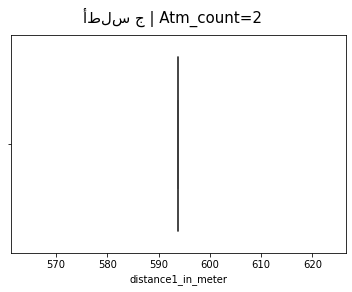

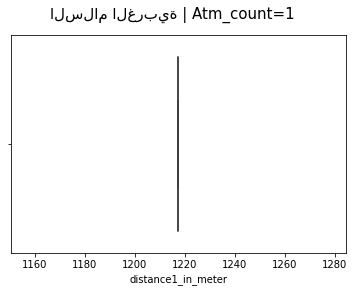

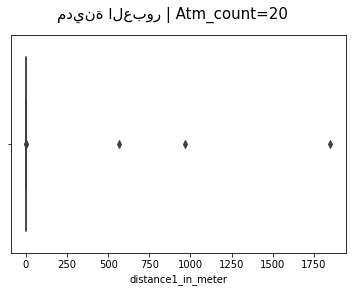

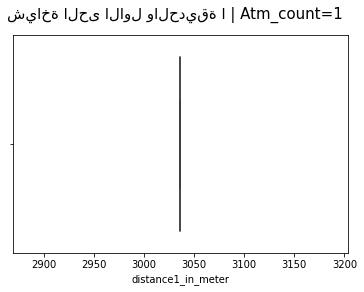

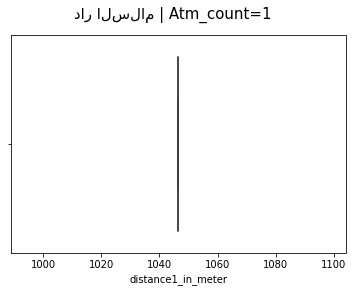

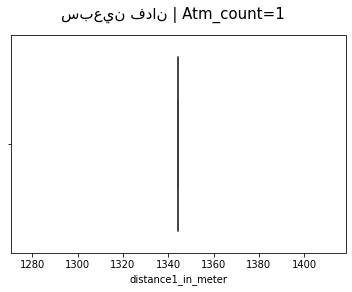

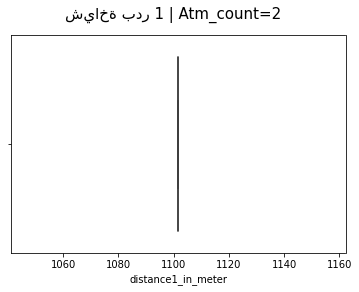

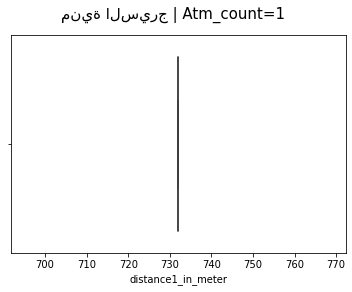

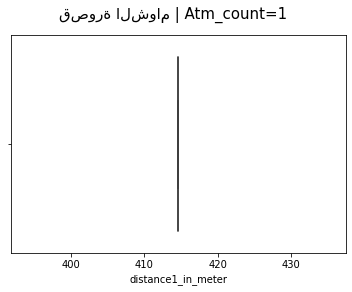

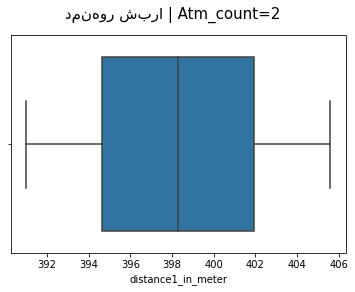

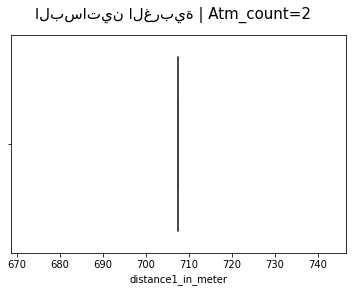

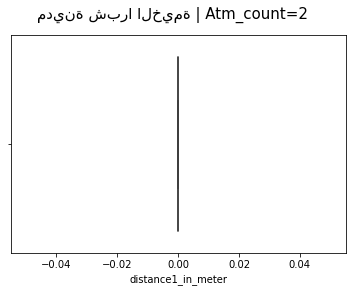

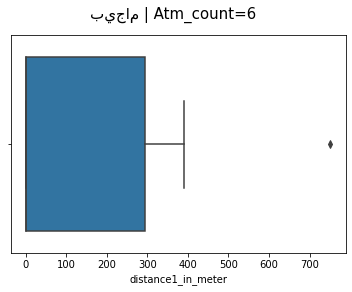

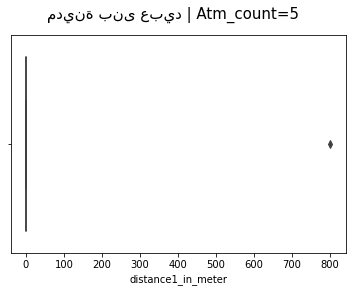

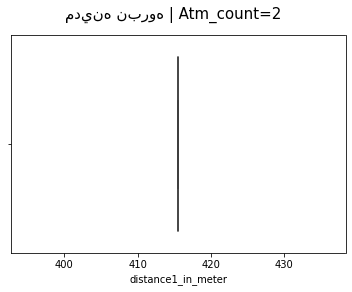

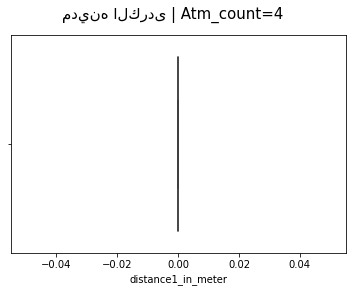

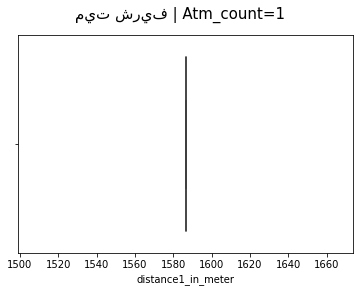

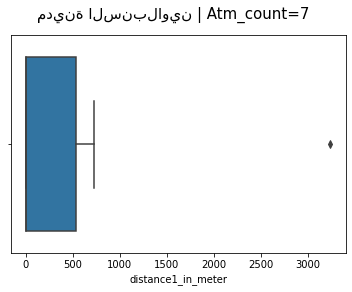

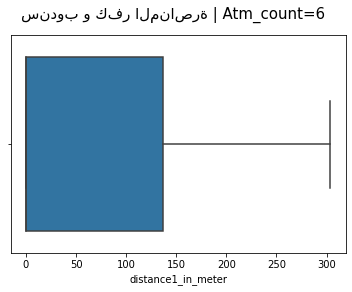

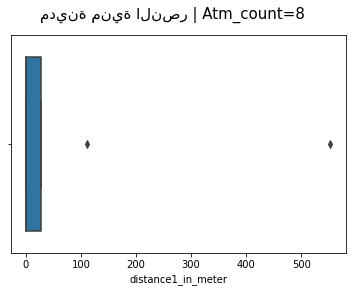

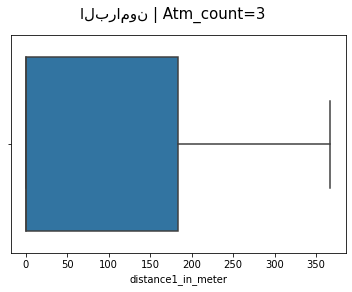

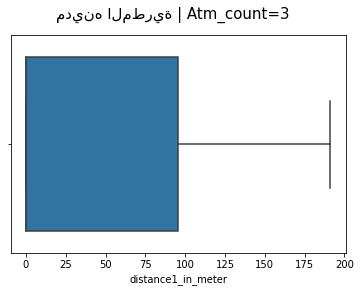

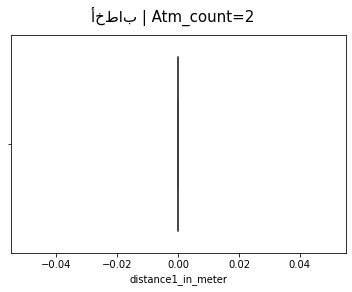

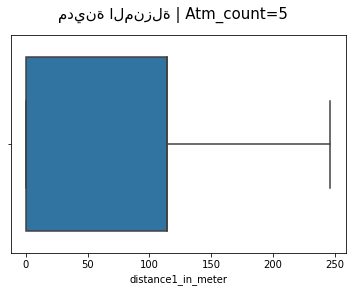

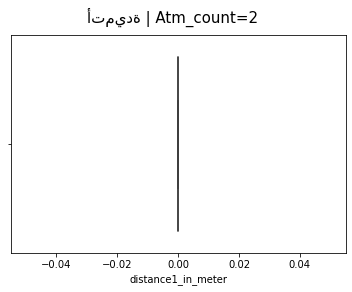

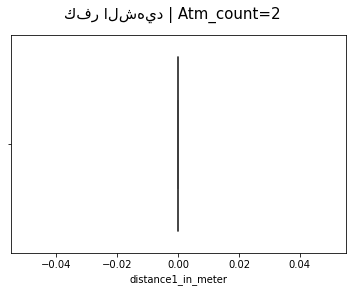

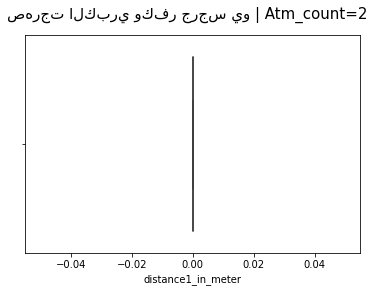

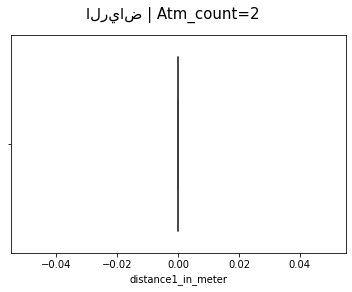

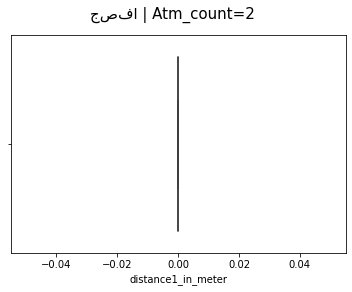

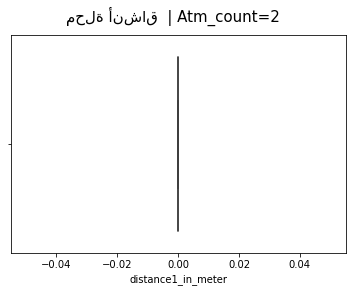

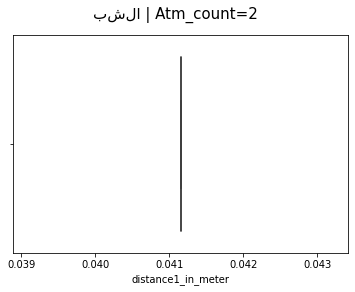

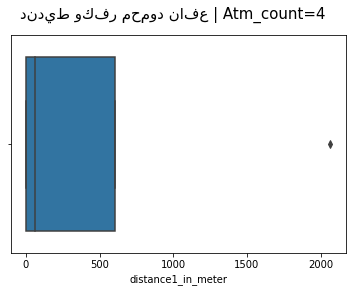

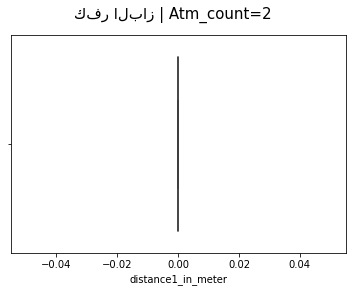

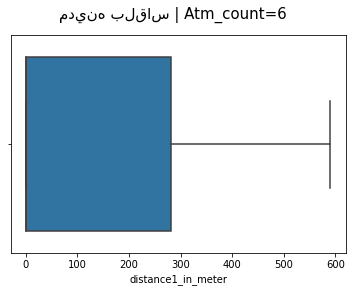

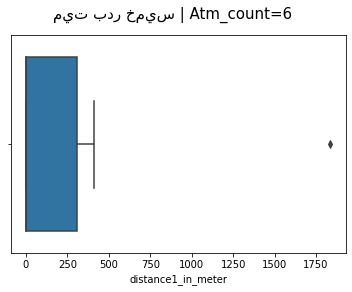

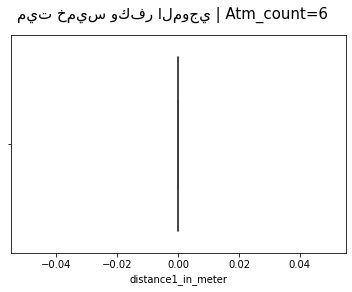

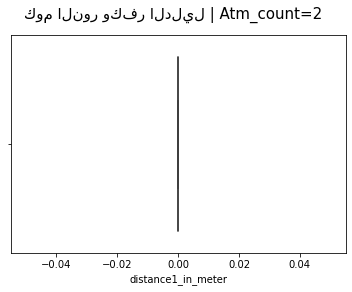

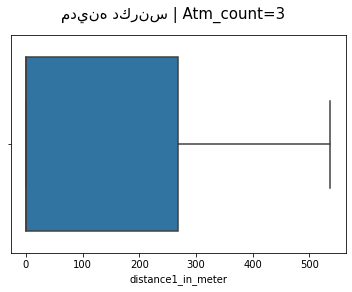

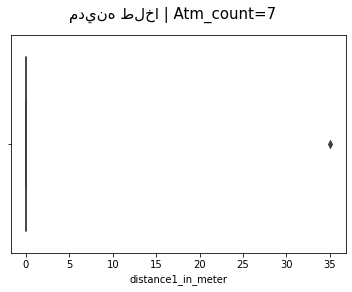

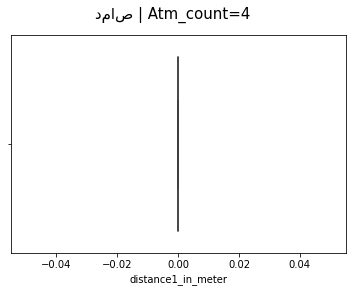

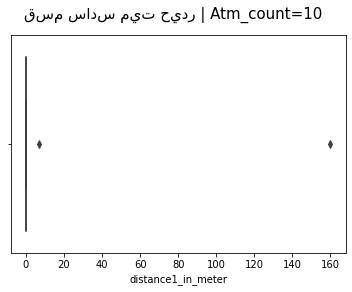

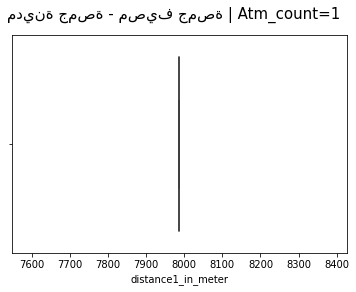

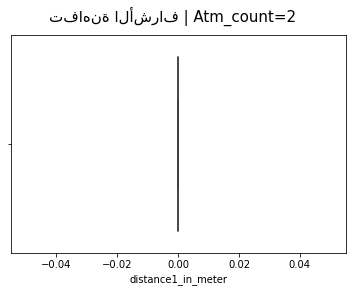

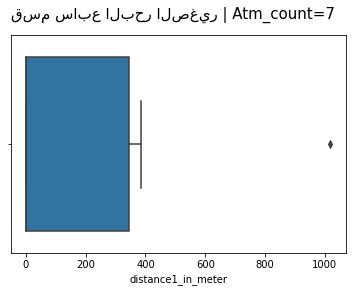

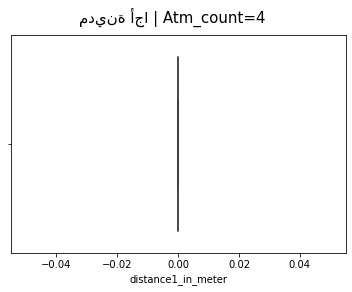

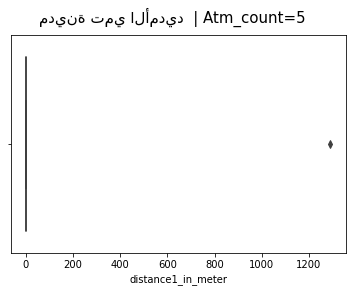

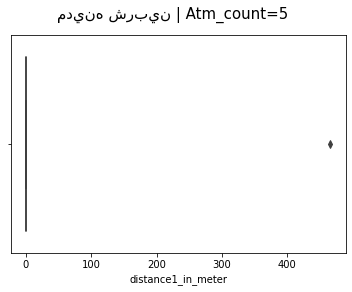

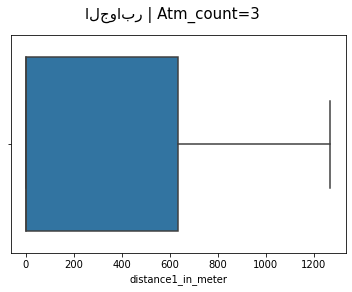

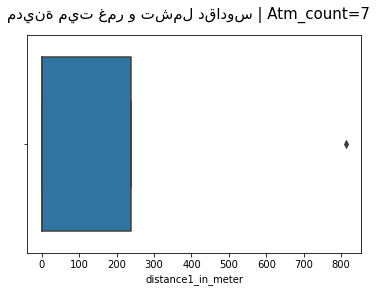

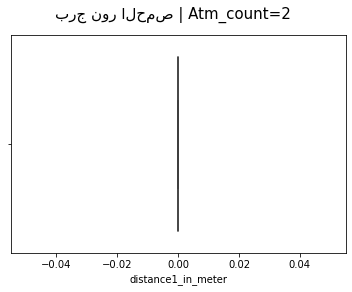

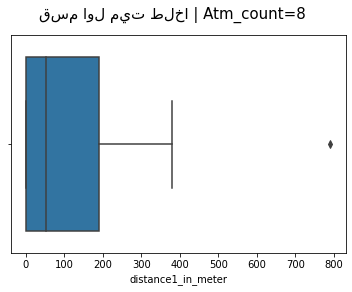

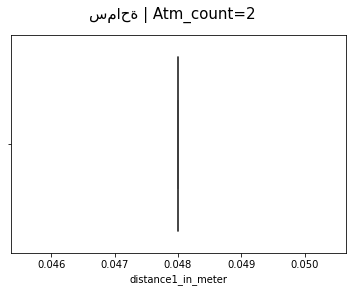

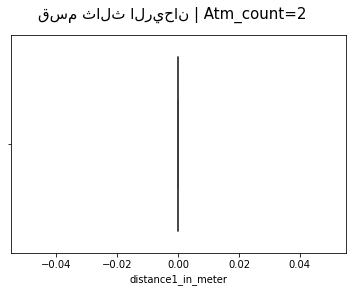

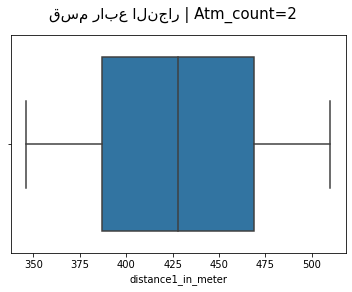

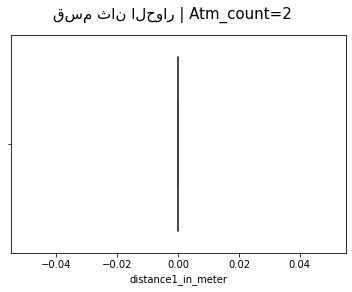

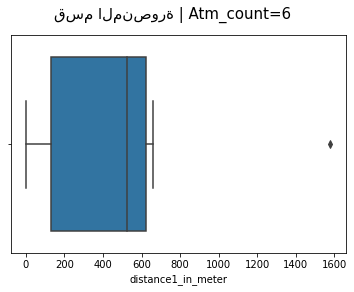

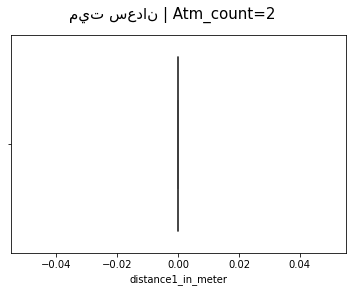

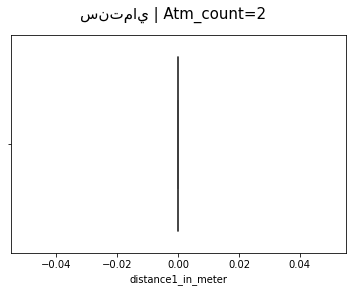

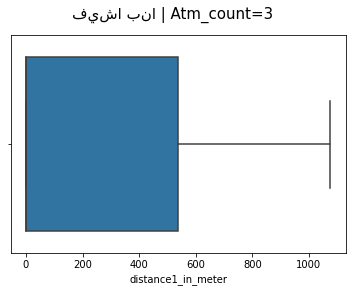

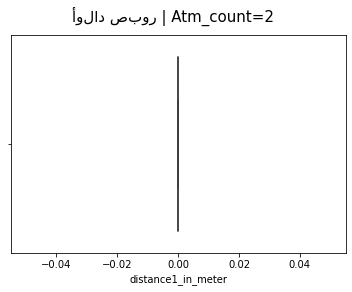

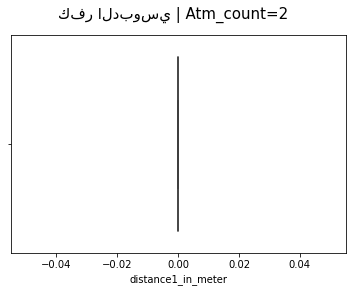

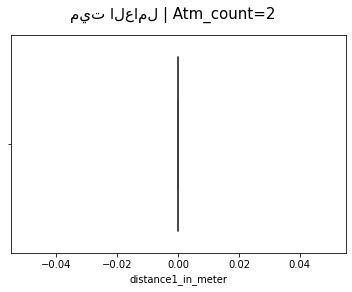

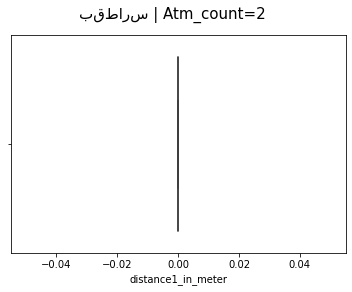

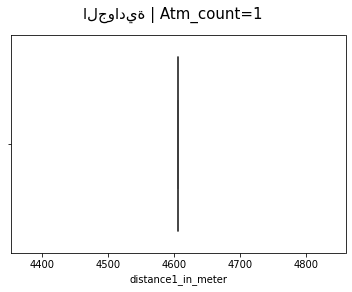

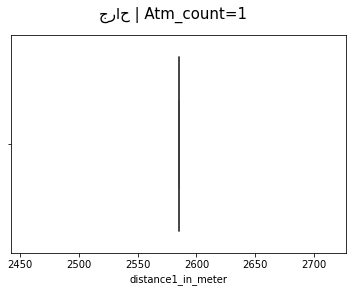

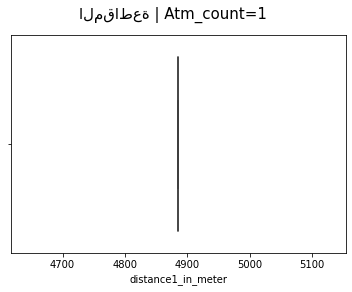

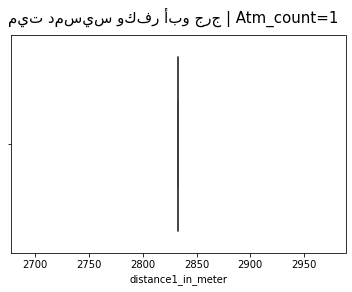

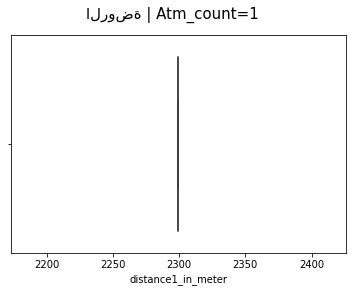

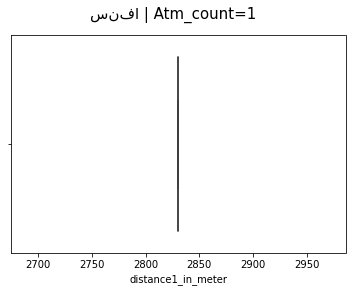

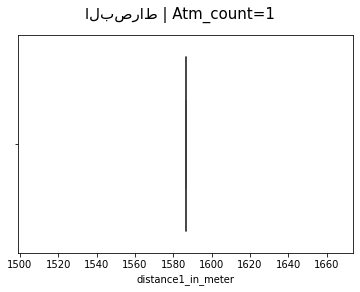

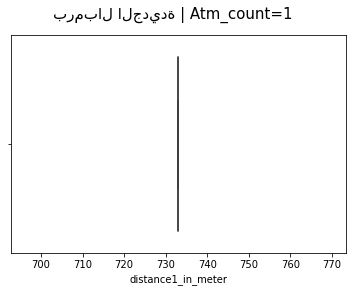

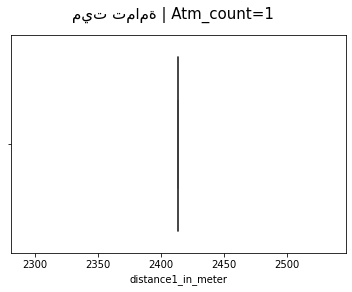

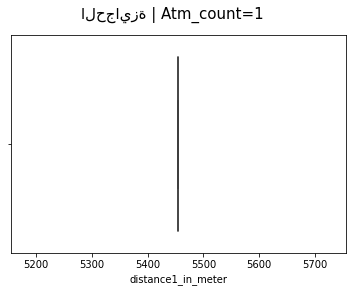

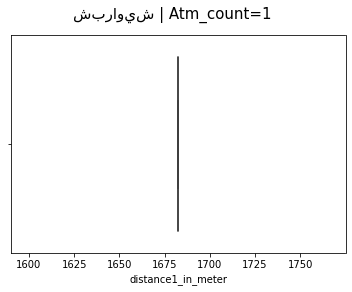

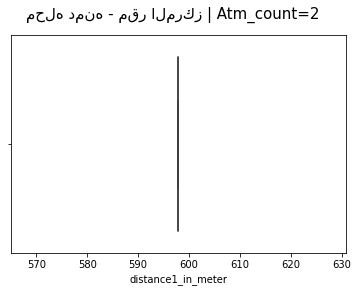

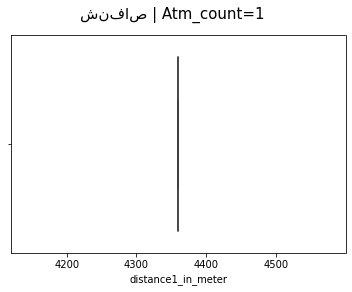

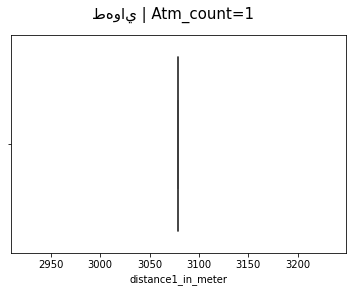

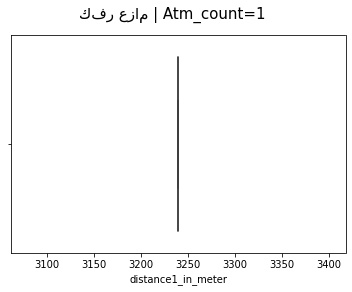

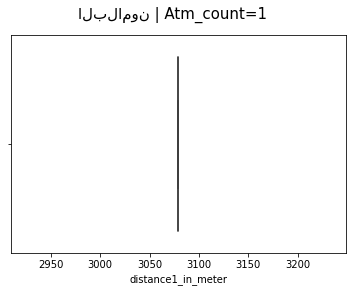

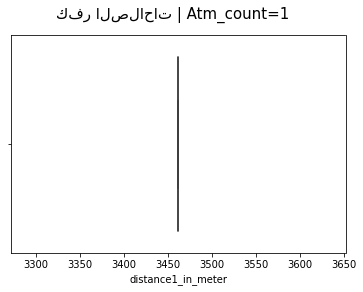

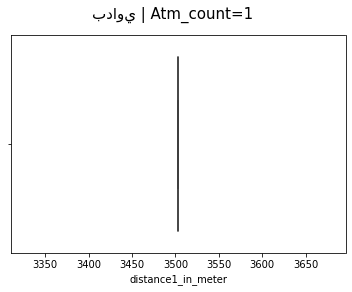

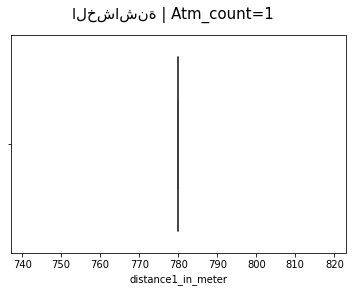

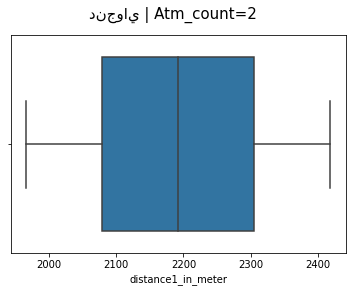

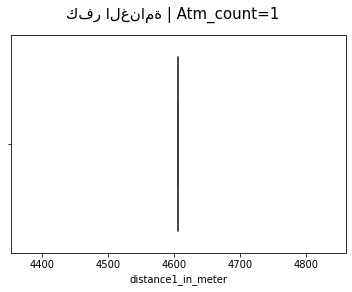

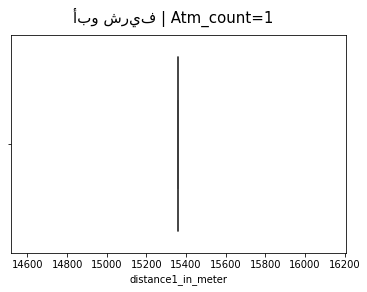

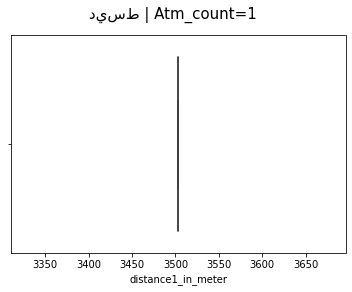

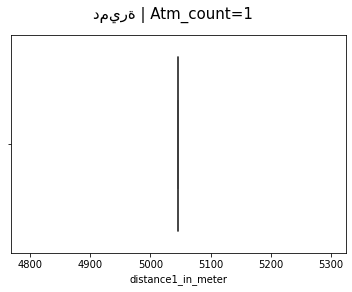

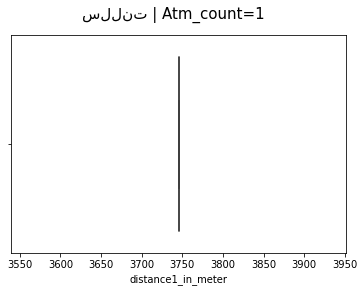

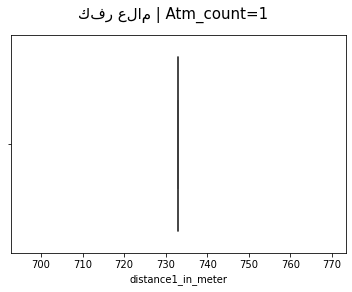

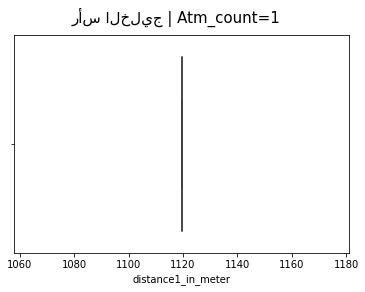

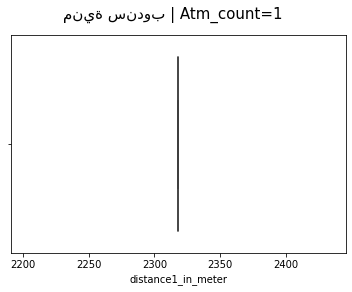

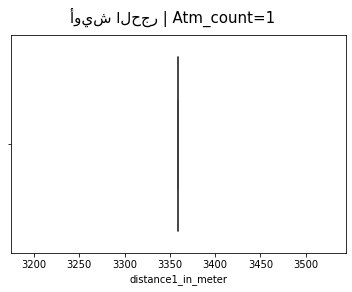

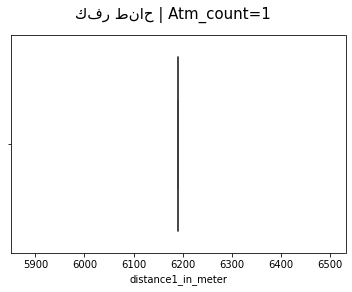

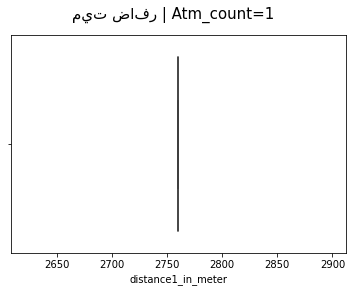

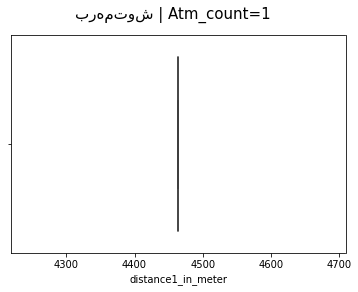

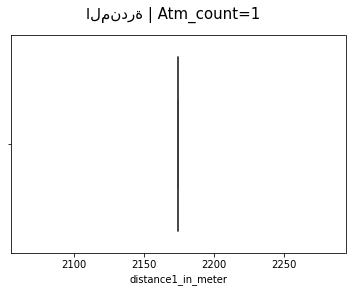

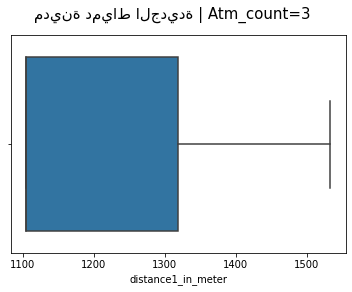

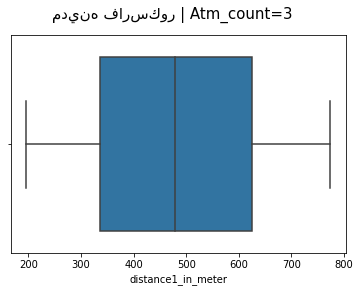

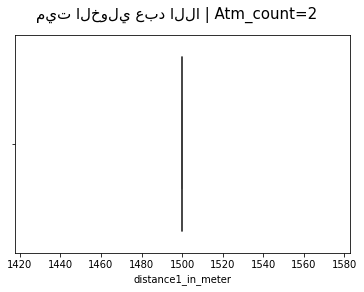

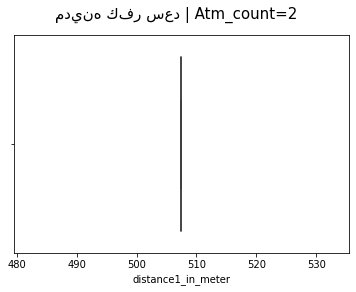

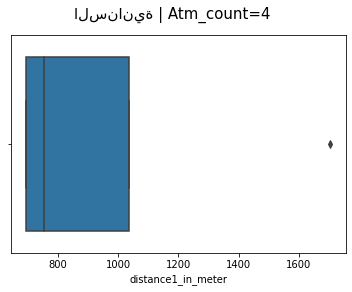

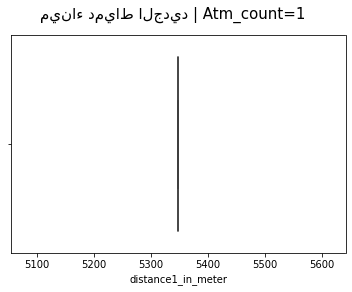

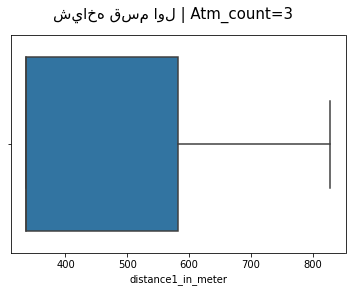

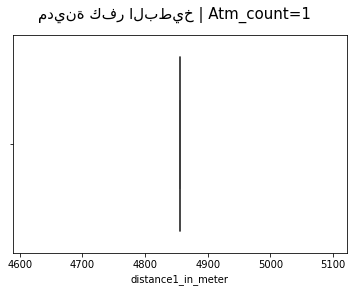

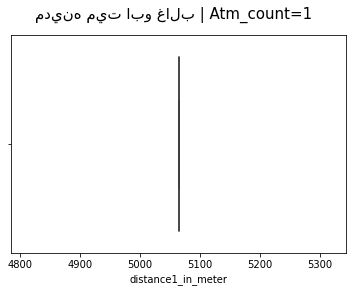

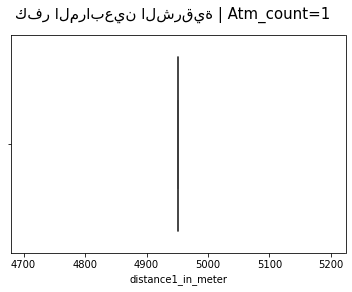

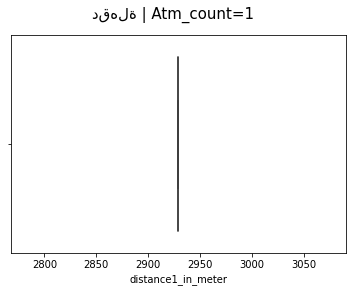

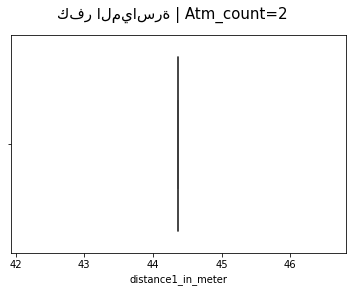

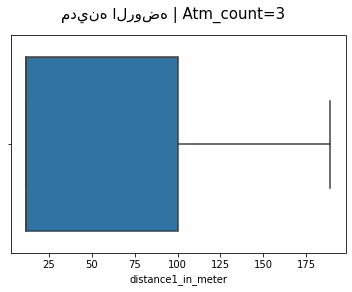

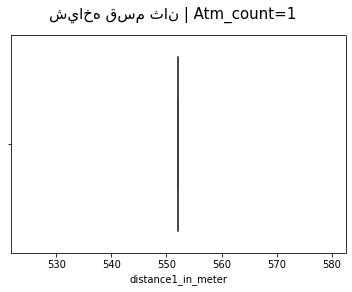

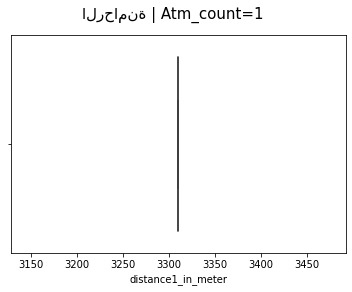

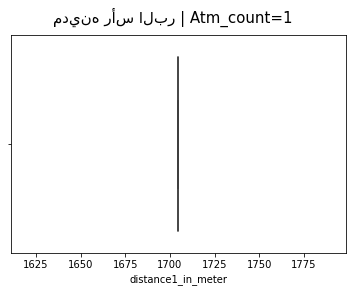

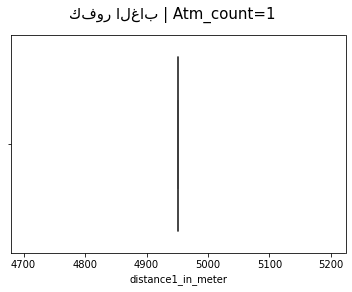

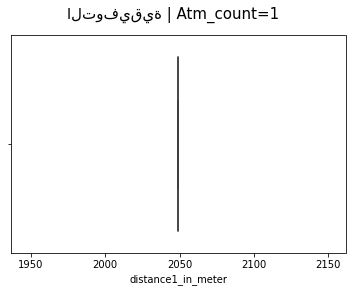

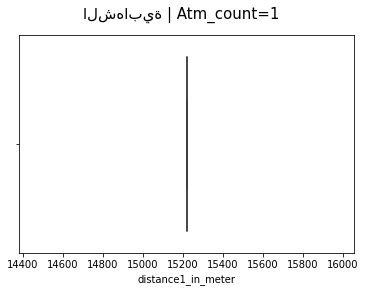

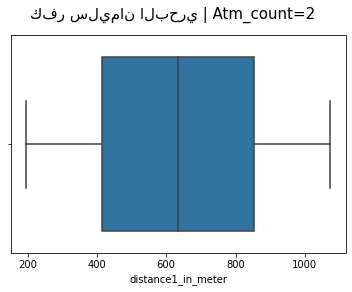

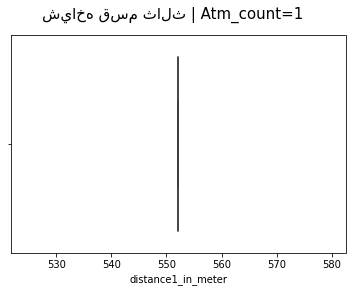

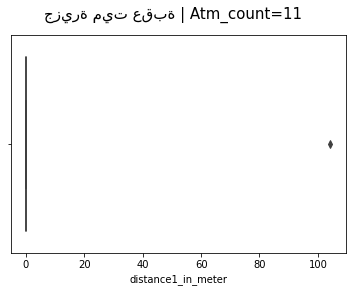

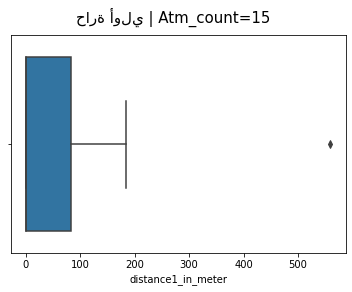

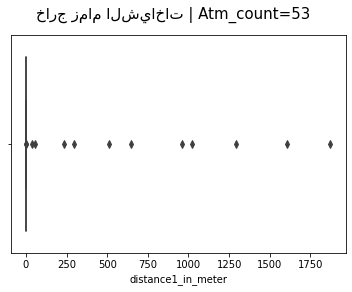

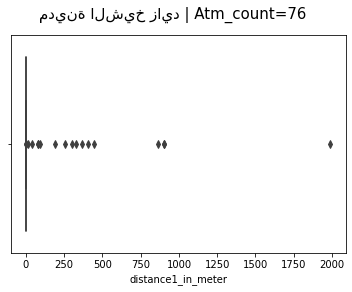

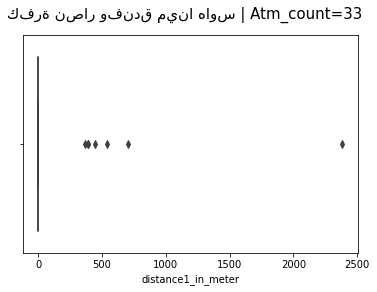

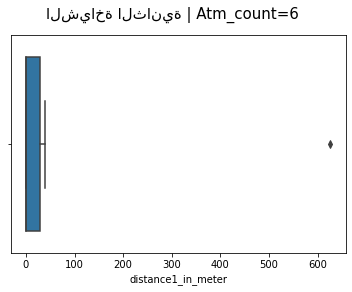

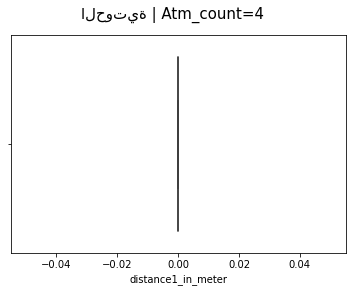

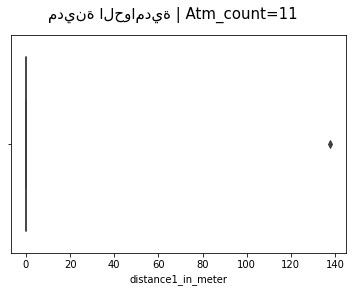

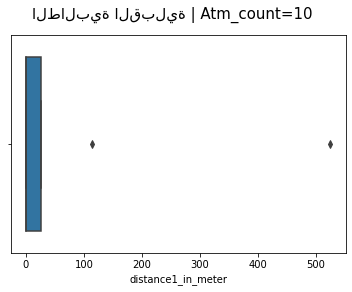

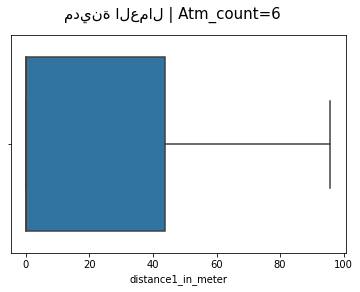

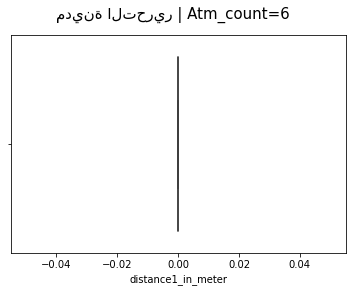

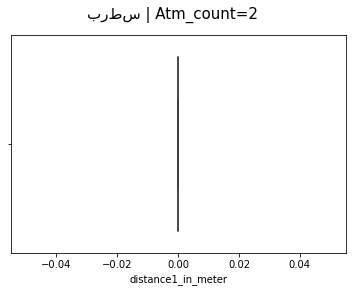

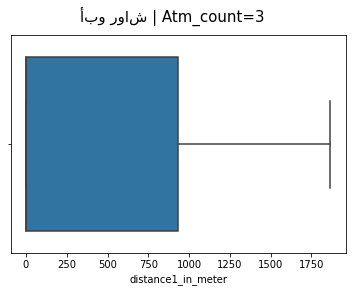

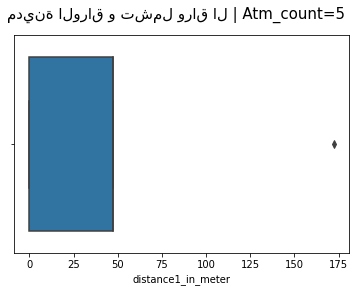

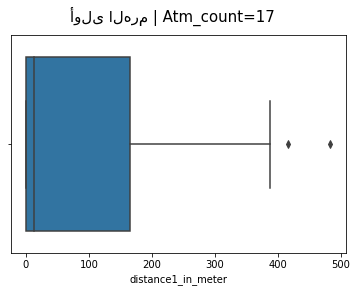

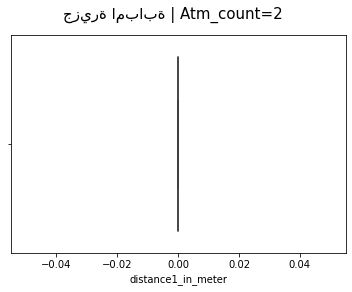

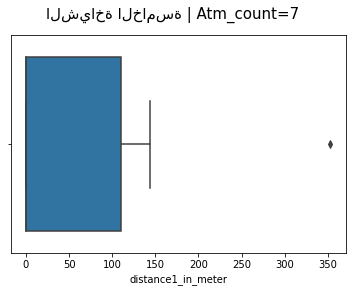

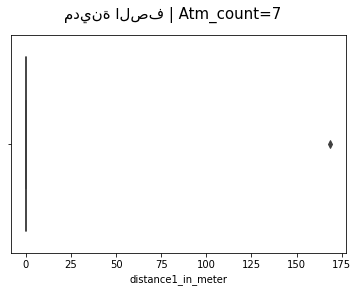

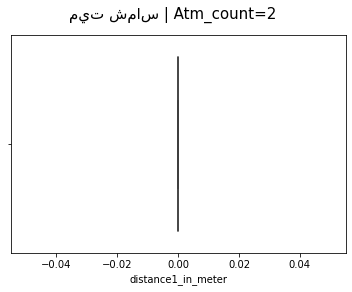

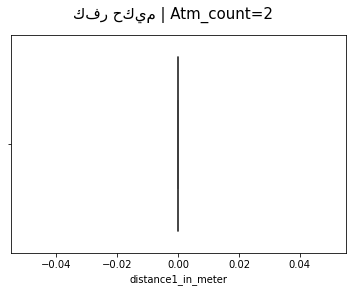

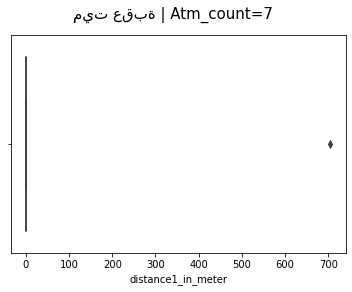

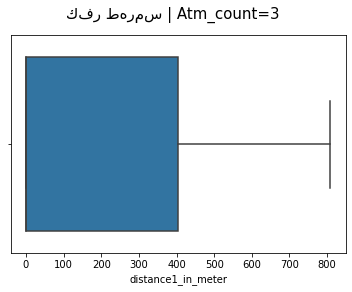

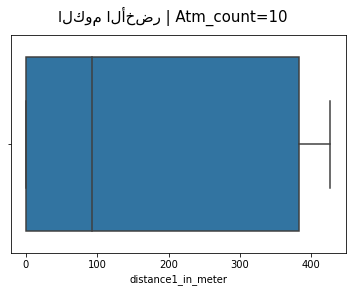

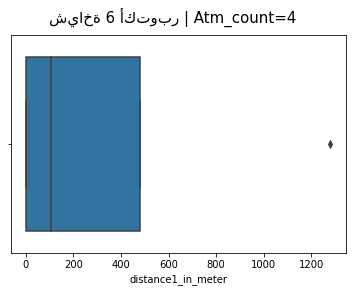

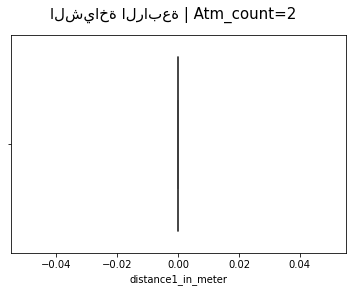

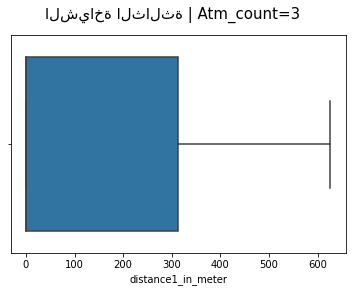

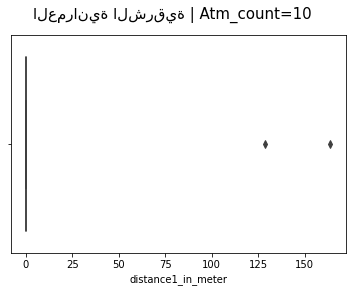

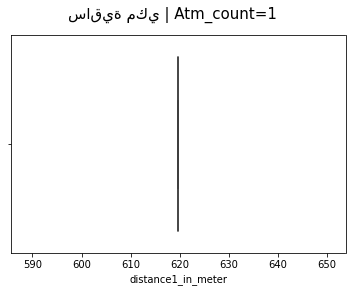

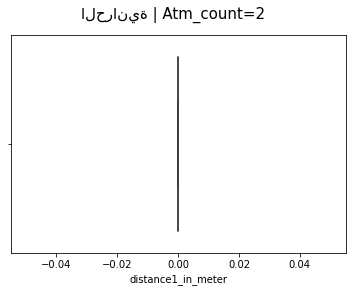

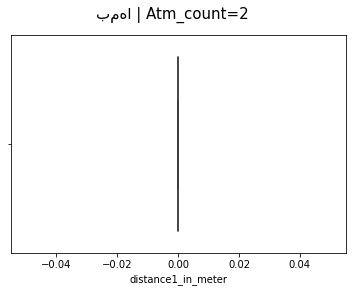

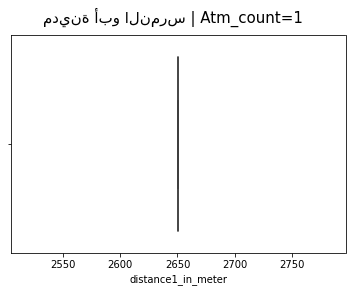

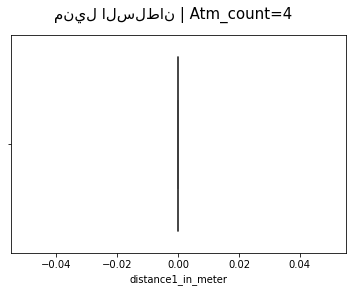

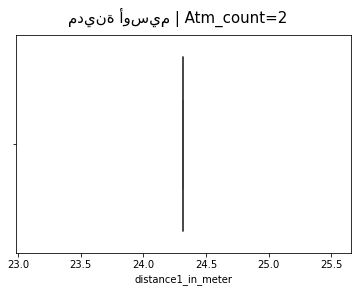

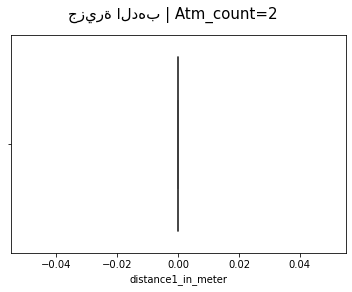

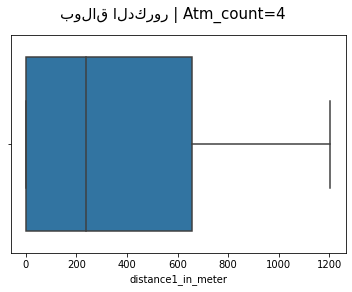

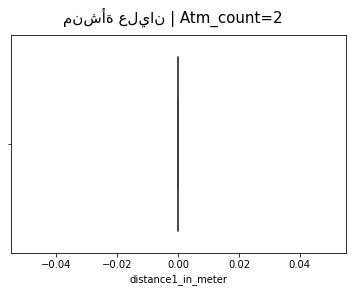

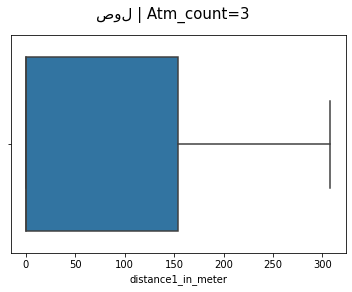

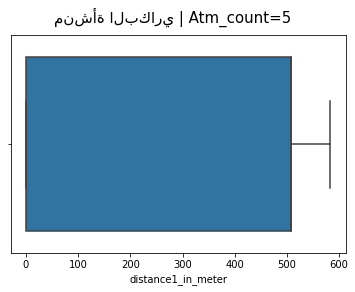

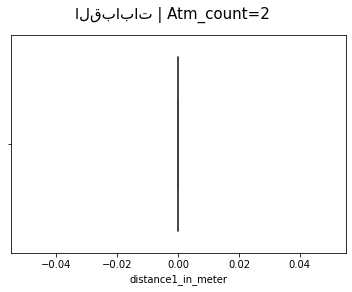

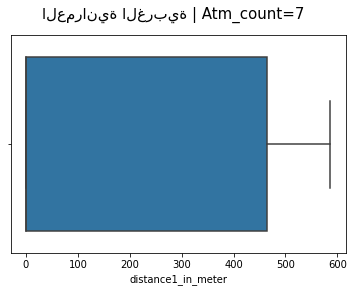

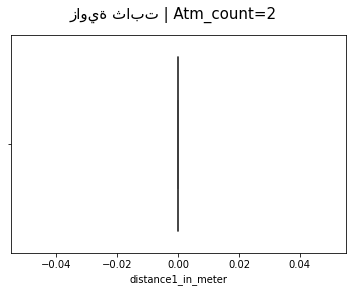

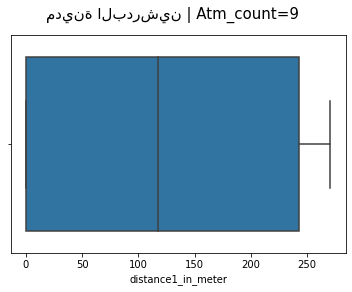

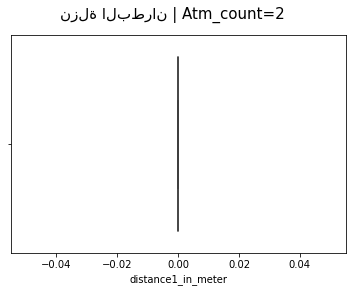

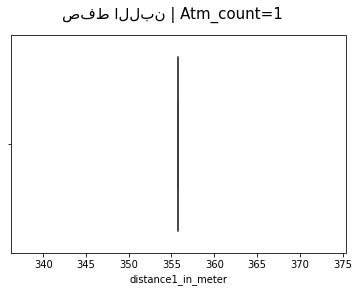

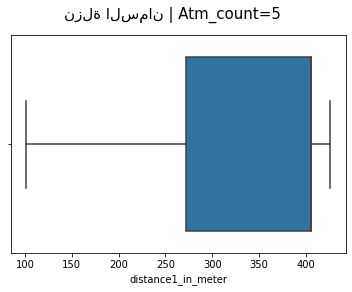

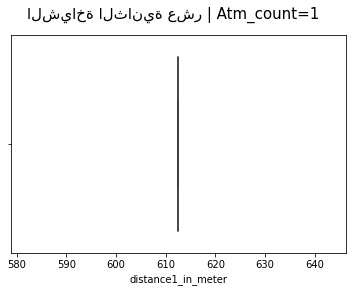

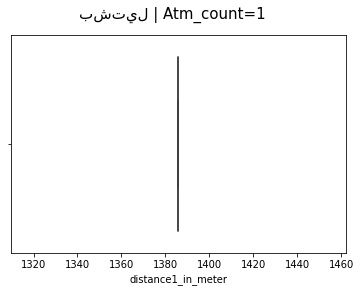

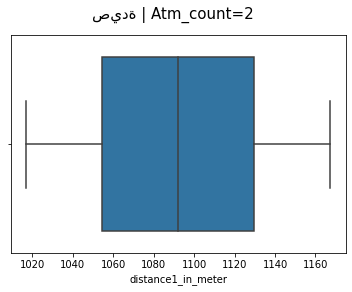

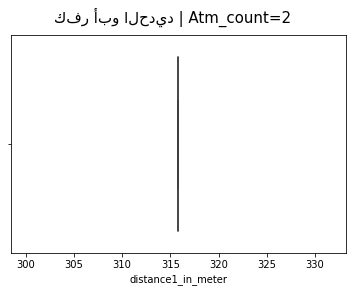

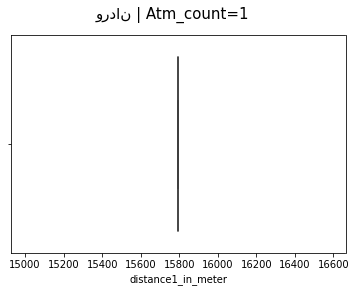

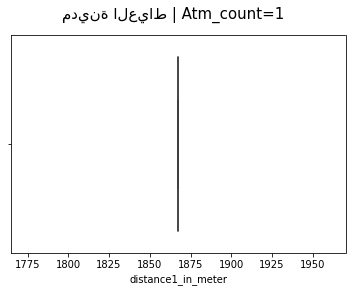

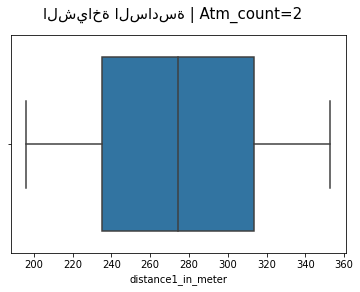

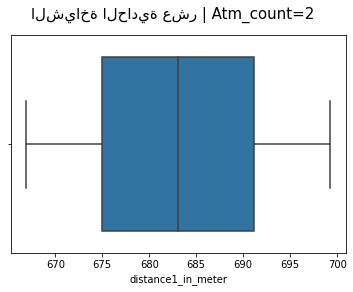

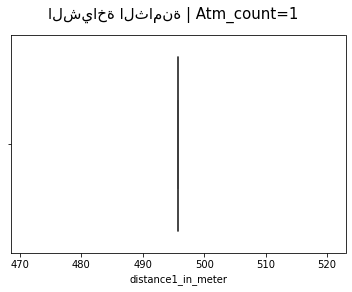

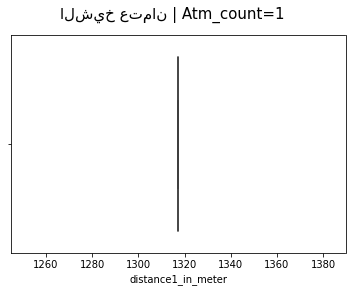

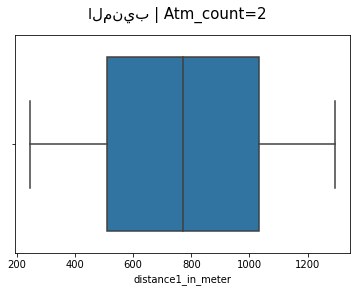

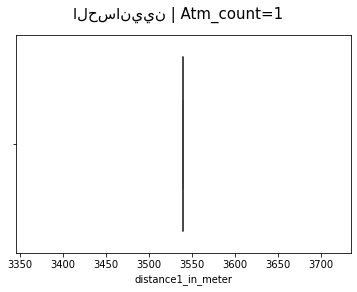

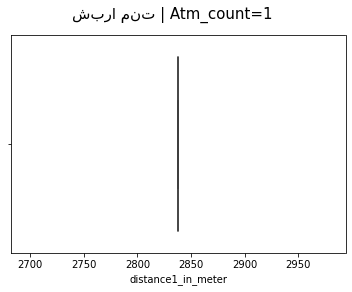

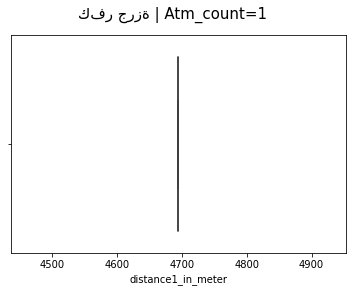

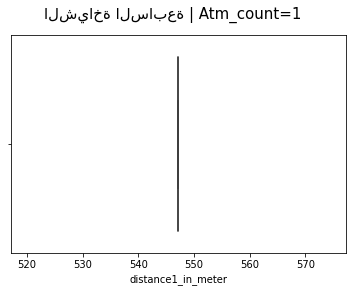

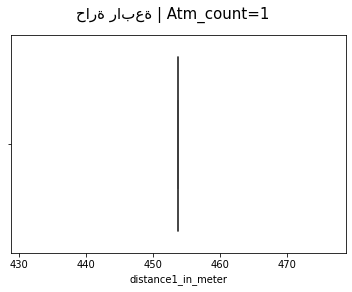

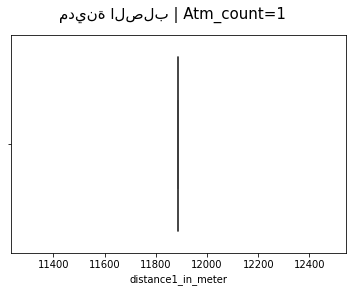

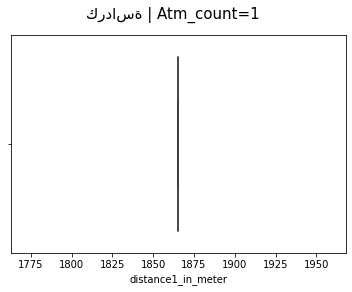

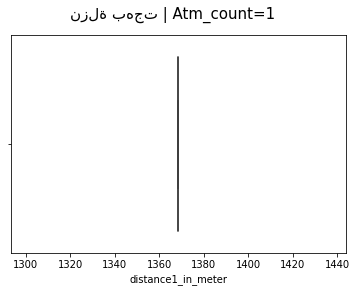

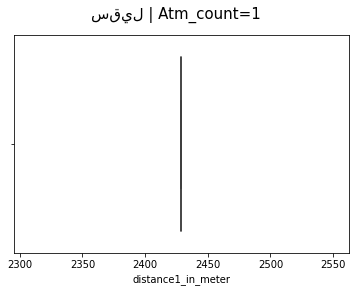

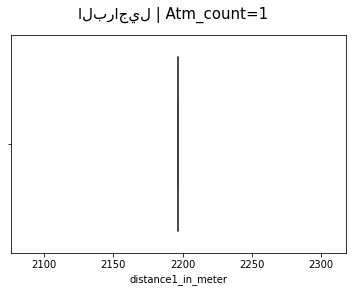

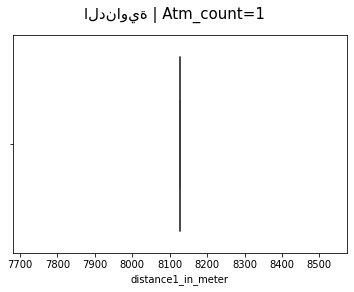

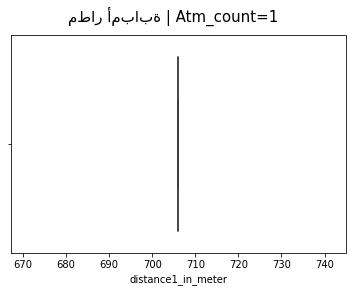

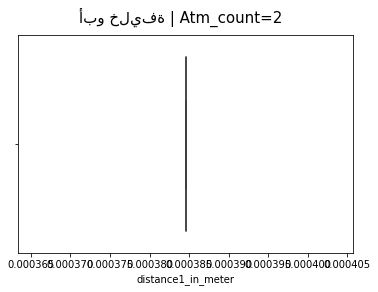

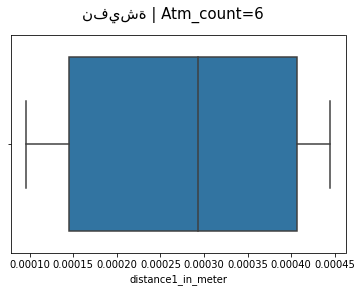

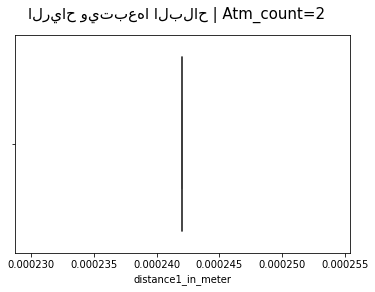

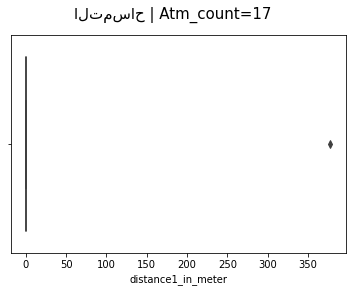

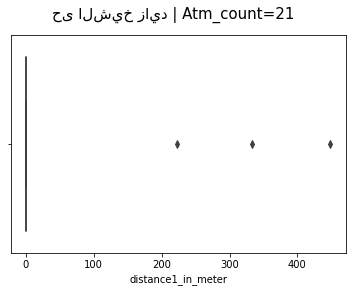

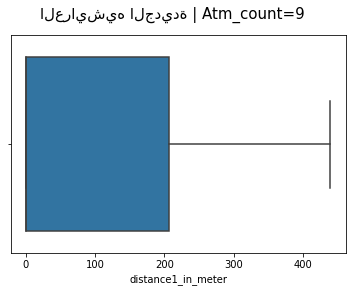

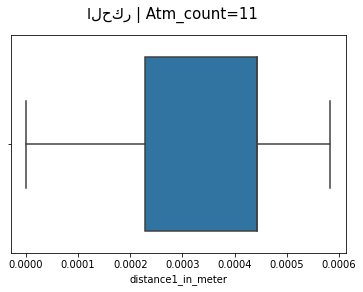

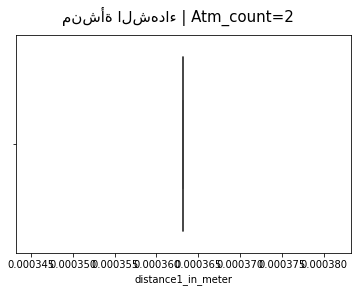

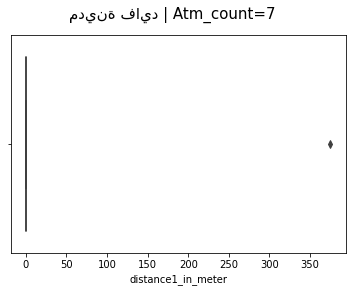

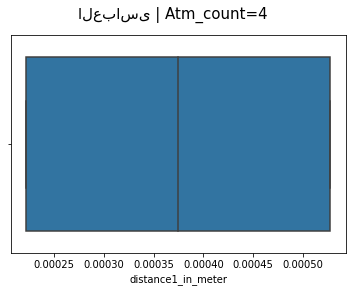

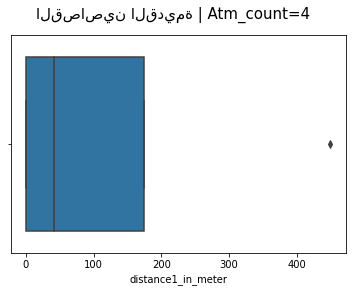

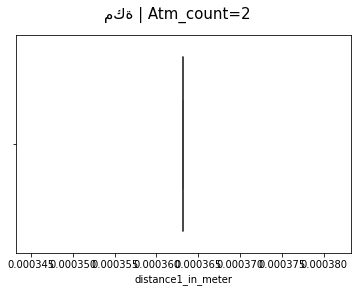

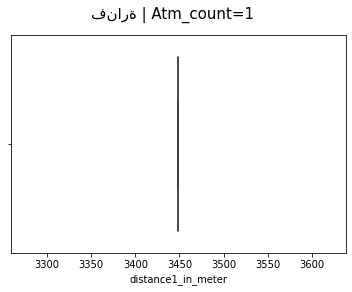

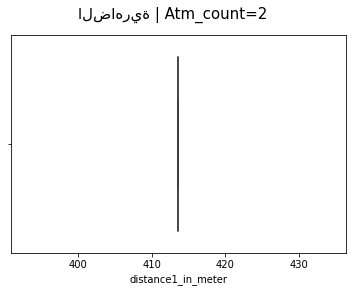

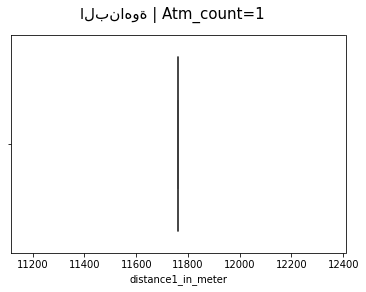

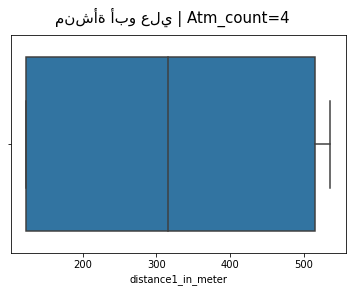

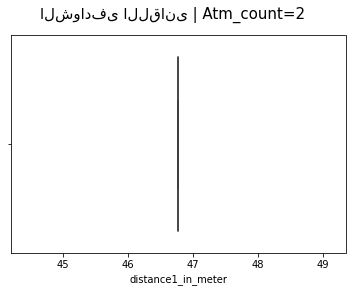

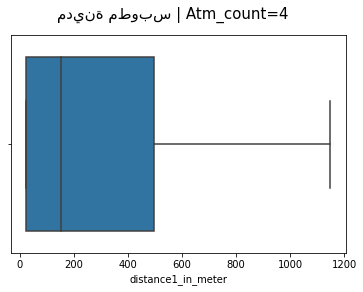

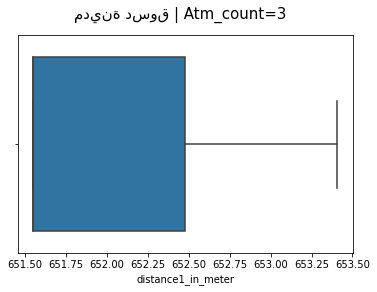

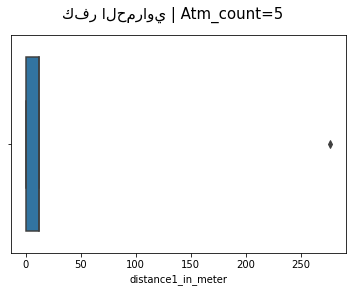

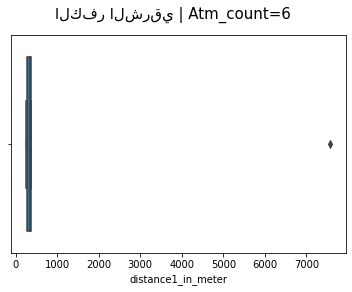

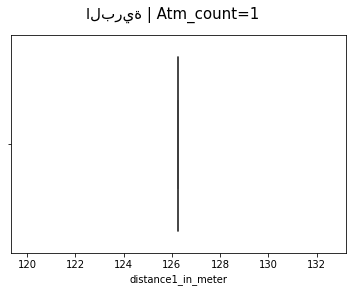

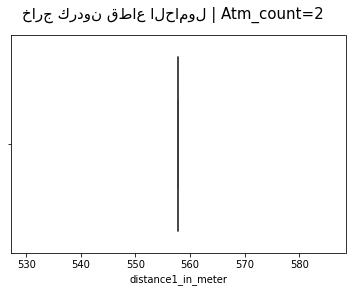

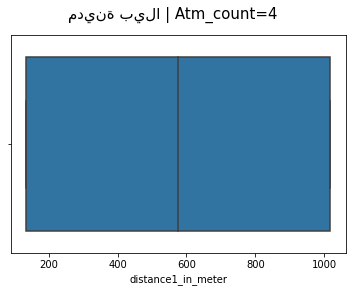

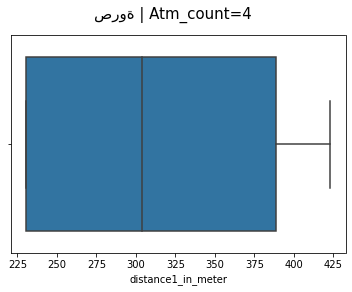

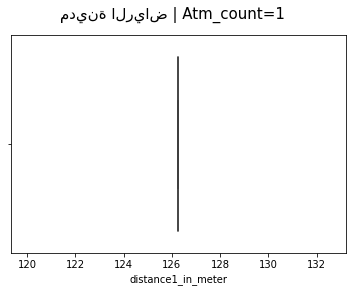

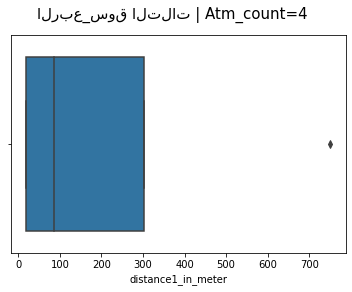

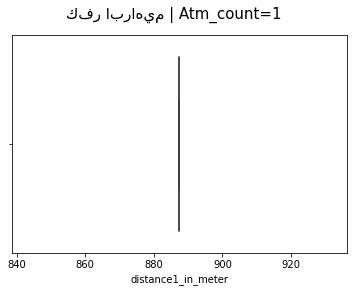

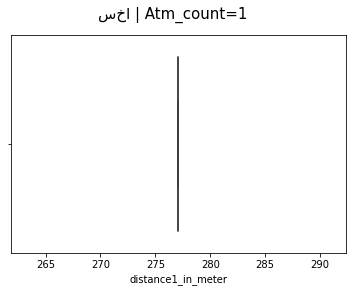

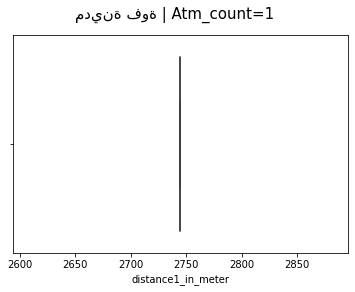

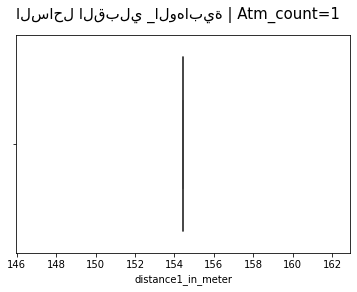

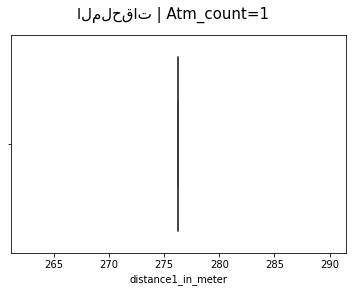

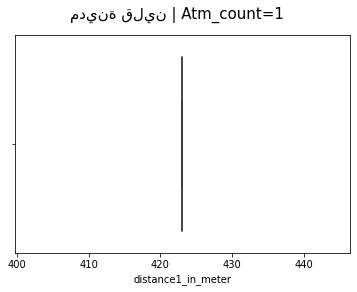

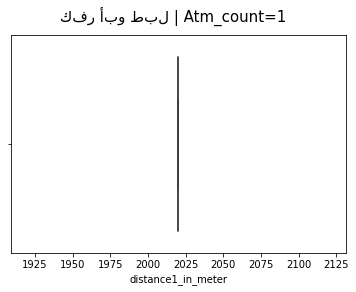

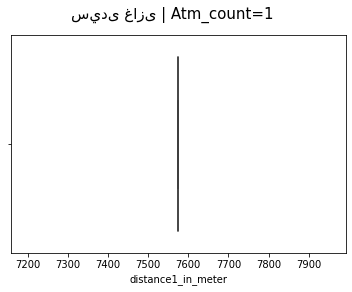

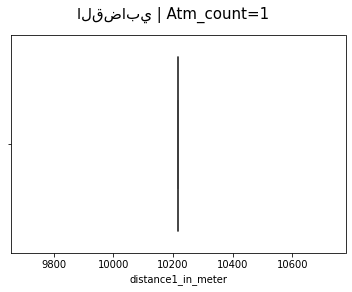

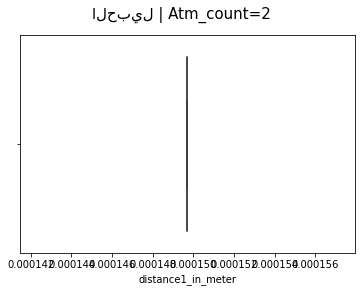

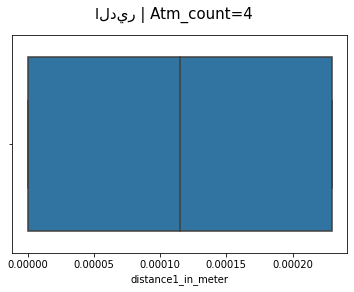

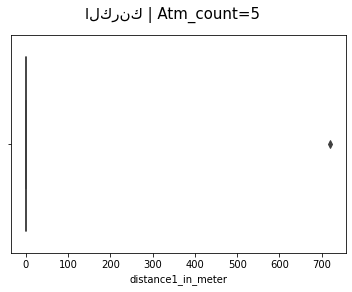

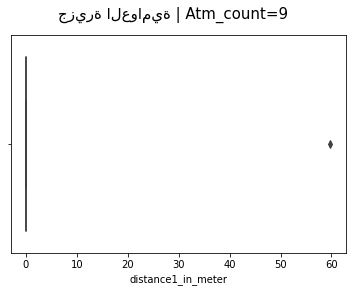

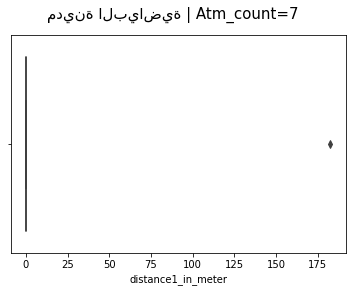

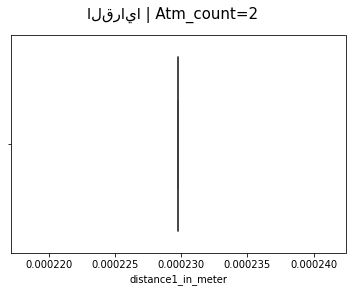

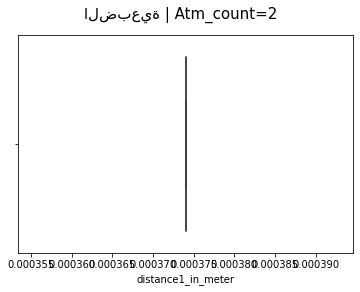

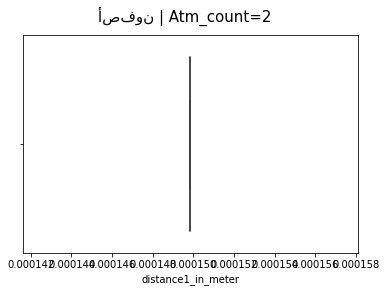

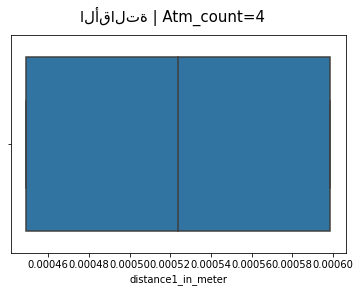

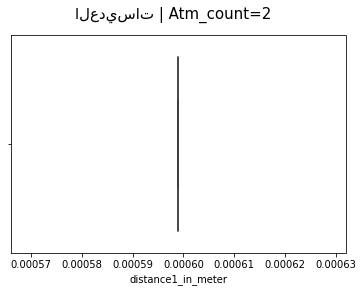

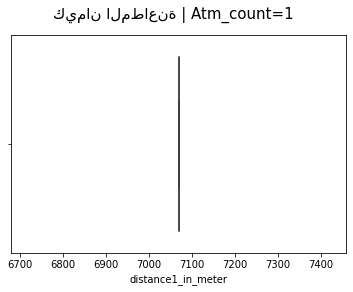

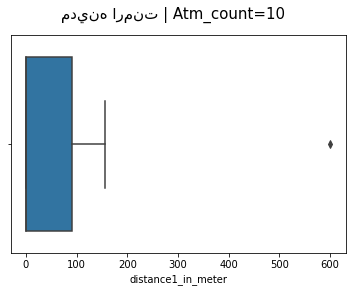

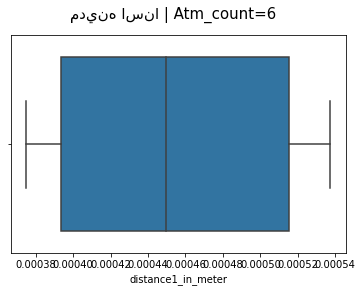

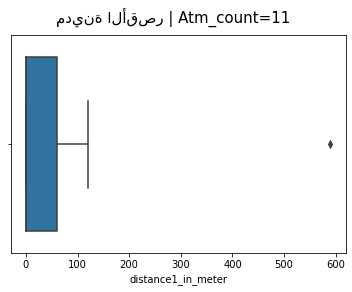

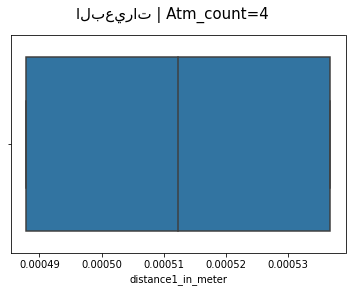

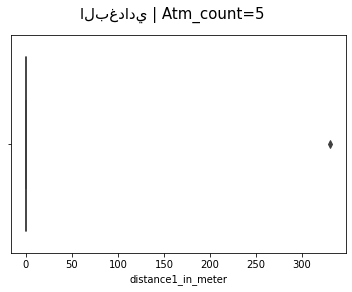

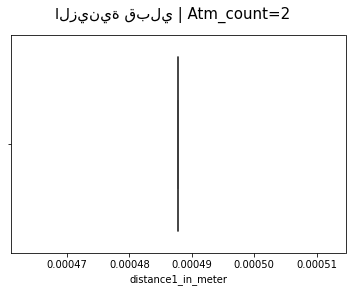

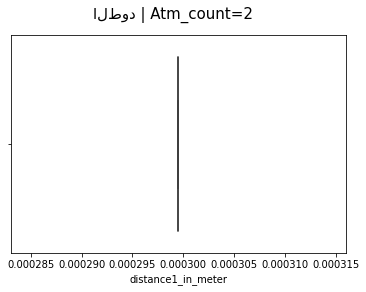

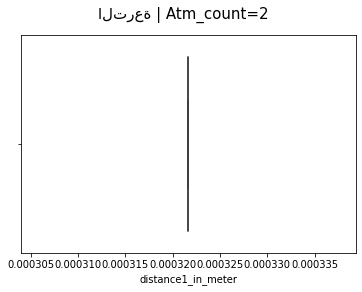

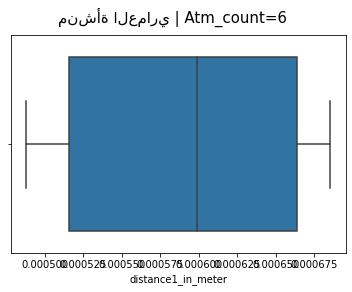

Error in callback <function flush_figures at 0x7f194f421b40> (for post_execute):


KeyboardInterrupt: 

In [11]:
for i in list_of_sub_reg:
    current_select = atm_df[atm_df['منطقة'] == i]
    plt.figure()
    plt.suptitle(i +' | Atm_count=' + str(current_select.count()['ID']),fontsize=15)
    sns.boxplot(current_select['distance1_in_meter'])
    

# Trying to use map to see the outliers

In [3]:
# we may start with governrates
geo_df = gpd.read_file('Reading shape files/egy_admbnda_adm1_capmas_20170421.shp')
all_governrates = geo_df[['ADM1_AR','geometry']]
all_governrates['ADM1_AR'] = all_governrates['ADM1_AR'].apply(lambda x : re.sub('\n','',x))
#all_sub_regions['ADM2_AR'] = all_sub_regions['ADM2_AR'].apply(lambda x : re.sub('\n','',x))
#all_sub_regions['ADM3_AR'] = all_sub_regions['ADM3_AR'].apply(lambda x : re.sub('\n','',x))
all_governrates.rename(columns={
  #  'ADM3_AR':'منطقة',
 #   'ADM2_AR':'قسم / مركز',
    'ADM1_AR':'محافظة',
},inplace=True)
all_governrates.head()

محافظة                                           geometry
0  الاسكندرية  POLYGON ((30.08063 31.33118, 30.08057 31.33114...
1       أسيوط  MULTIPOLYGON (((30.75499 27.61106, 30.75618 27...
2       أسوان  MULTIPOLYGON (((32.87266 24.17076, 32.87238 24...
3     البحيرة  POLYGON ((30.39156 31.44026, 30.39281 31.44023...
4    بنى سويف  MULTIPOLYGON (((30.96379 28.89630, 30.96116 28...

In [4]:
# Ploygon of the regions
geo_df = gpd.read_file('Reading shape files/egy_admbnda_adm2_capmas_20170421.shp')
all_regions = geo_df[['ADM1_AR','ADM2_AR','geometry']]
all_regions['ADM1_AR'] = all_regions['ADM1_AR'].apply(lambda x : re.sub('\n','',x))
all_regions['ADM2_AR'] = all_regions['ADM2_AR'].apply(lambda x : re.sub('\n','',x))
#all_sub_regions['ADM3_AR'] = all_sub_regions['ADM3_AR'].apply(lambda x : re.sub('\n','',x))
all_regions.rename(columns={
 #   'ADM3_AR':'منطقة',
    'ADM2_AR':'قسم / مركز',
    'ADM1_AR':'محافظة',
},inplace=True)
all_regions.head()

محافظة                   قسم / مركز  \
0  الشرقية  قسم اول مدينة العاشر من رمض   
1  الشرقية  قسم ثان مدينه العاشر من رمض   
2  القاهرة                 قسم  15 مايو   
3   الجيزة             قسم أول 6 أكتوبر   
4   الجيزة             قسم ثان 6 أكتوبر   

                                            geometry  
0  POLYGON ((31.70323 30.21166, 31.70354 30.21452...  
1  POLYGON ((31.72752 30.25126, 31.72671 30.25009...  
2  POLYGON ((31.37739 29.78892, 31.36398 29.78987...  
3  POLYGON ((30.98266 30.00870, 30.98959 30.00103...  
4  POLYGON ((30.95400 29.95111, 30.95393 29.95104...

In [5]:
# select the gov to see it's outliers in map
current_gov_select = 'القاهرة'

<AxesSubplot:xlabel='distance1_in_meter'>

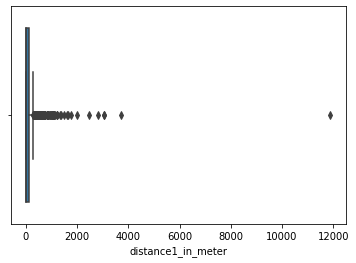

In [14]:
# display the outliers in a boxplot form
sns.boxplot(atm_df[atm_df['محافظة'] == current_gov_select]['distance1_in_meter'])

In [15]:
# display outliers in a numerical form
test = atm_df[atm_df['محافظة'] == current_gov_select].describe()[['distance1_in_meter']]
test

distance1_in_meter
count          834.000000
mean           156.910038
std            537.925211
min              0.000000
25%              0.000000
50%              0.000000
75%            117.559718
max          11887.147431

In [16]:
# filter atms distances less than min and more than max in the boxplot


# select atm that are in the current selected gov and it's distance_in_meter is 
# less than 25% or more than 75 % of the boxplot of the distances1_in_meter in the current selected gov
outlier = atm_df[((atm_df['محافظة'] == current_gov_select) &
                     (atm_df['distance1_in_meter'] > 
        float(atm_df[atm_df['محافظة'] == current_gov_select].describe()[['distance1_in_meter']].loc['75%']))) | 
                 ((atm_df['محافظة'] == current_gov_select) &
                     (atm_df['distance1_in_meter'] <
        float(atm_df[atm_df['محافظة'] == current_gov_select].describe()[['distance1_in_meter']].loc['25%'])))]

len(outlier)

208

In [17]:
# atms inside 25% - 75% in the current selected gov

remianing = atm_df[(((atm_df['محافظة'] == current_gov_select) &
                     (atm_df['distance1_in_meter'] <=
        float(atm_df[atm_df['محافظة'] == current_gov_select].describe()[['distance1_in_meter']].loc['75%']))) &
                 ((atm_df['محافظة'] == current_gov_select) &
                     (atm_df['distance1_in_meter'] >=
        float(atm_df[atm_df['محافظة'] == current_gov_select].describe()[['distance1_in_meter']].loc['25%']))))]

len(remianing)

626

In [36]:
m = folium.Map(location=[30.01904694483688, 31.429658620148153], zoom_start=8)

In [37]:
# # draw the polygon of the selected gov
# sim_geo = gpd.GeoSeries(all_governrates[all_governrates['محافظة'] == current_gov_select]['geometry']).simplify(tolerance=0.0001)
# geo_j = sim_geo.to_json()
# geo_j = folium.GeoJson(data=geo_j,
#                        style_function=lambda x: {'fillColor': 'cyan'})
# folium.Popup(all_governrates)
# geo_j.add_to(m)

In [38]:
# draw the polygon of regions of the selected gov

for i in all_regions[all_regions['محافظة'] == current_gov_select]['قسم / مركز'].unique():
    z = all_regions[(all_regions['قسم / مركز'] == i) & (all_regions['محافظة'] == current_gov_select)]['geometry']

    sim_geo = gpd.GeoSeries(z).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange','color':'#005'})
    folium.Popup(str(i)).add_to(geo_j)
    geo_j.add_to(m)

In [39]:
# define the function to add atm location marks on the map, color for the color of the marks
def add_marker(x,color):
    z = folium.CircleMarker(
        location=[x.Lat,x.Long], # coordinates for the marker (Earth Lab at CU Boulder)
        color=color,
        radius = 1
).add_to(m)
    folium.Popup(str(x.Address) + '\n\nNearest 1st atm:'+str(np.round(x.distance1_in_meter,3)) + 'm'+ 
                 '\n\nNearest 2nd atm:'+str(np.round(x.distance2_in_meter,3)) ).add_to(z)
    


In [40]:
outlier[outlier['ID'] != 1513].apply(add_marker,axis = 1,color = 'red')
remianing[remianing['ID'] != 1513].apply(add_marker,axis = 1,color = 'green')


1122    None
1123    None
1124    None
1125    None
1127    None
        ... 
3030    None
3031    None
3096    None
3097    None
3123    None
Length: 626, dtype: object

In [41]:
m

In [387]:
counter = 'cairo_oulier'
m.save('html_map_output/'+str(counter)+'_map.html')